In [ ]:
!pip install category_encoders -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path to your zip file
train_path = '/content/drive/MyDrive/BFBF_Project/Train_Data.zip'
test_path = '/content/drive/MyDrive/BFBF_Project/Test_Data.zip'

# Destination folder
extract_train = '/content/train/'
extract_test = '/content/test/'

# Create destination directory if it doesn't exist
os.makedirs(extract_train, exist_ok=True)
os.makedirs(extract_test, exist_ok=True)

# Extract
with zipfile.ZipFile(train_path, 'r') as zip_ref:
    zip_ref.extractall(extract_train)

with zipfile.ZipFile(test_path, 'r') as zip_ref:
    zip_ref.extractall(extract_test)

print("Extraction complete.")

Extraction complete.


# Data Engineering(Actual Data)

### State-Wise Total Expenses (Urban vs Rural)


--- Top 10 States by Households & Avg Expense ---


State  Households    AvgExpense
0     09       24296  19106.075843
1     27       18223  21557.172344
2     19       14414  15685.892985
3     10       13800  18130.883831
4     33       11477  20971.897351
5     23       11337  18044.398027
6     08       10525  22507.993054
7     29        9908  21994.369540
8     24        9088  21967.272436
9     28        8316  17829.643121
10    21        7377  14097.874651
11    18        6801  17694.815041
12    32        5793  23170.774629
13    36        5427  21834.443126
14    20        5119  16419.445336
15    03        4638  25863.179821
16    06        4238  29259.929229
17    16        4039  23051.553929
18    22        4008  13982.492119
19    14        3854  21374.451717
20    12        3236  27162.094988
21    15        2889  29710.279486
22    01        2777  23060.544260
23    07        2583  31911.875086
24    17        2559  22396.616623
25    13        2426  24122.995817
26    05        2224  23530.402675
27    02        1944  21597.293724
28    11        1720  32265.949187
29    34         843  25567.083046
30    35         802  29586.448027
31    37         569  24936.353744
32    04         568  34112.928596
33    30         548  30495.705837
34    25         533  16549.440006
35    31         497  25577.533847


--- Avg Expense by HH Size ---


HH Size (For FDQ)     AvgExpense  Count
0                   1   11091.311350  14553
1                   2   14494.092738  25028
2                   3   18955.892489  33984
3                   4   21571.716962  51392
4                   5   22155.788410  37614
5                   6   23477.710884  22363
6                   7   24395.801492  10758
7                   8   26868.049016   5730
8                   9   29952.538142   3189
9                  10   33031.678791   2060
10                 11   34670.267458   1115
11                 12   37553.800228    627
12                 13   38027.766132    363
13                 14   42427.900128    213
14                 15   45408.996692    131
15                 16   46729.761337    109
16                 17   52123.143495     57
17                 18   55368.931171     32
18                 19   56804.121420     22
19                 20   49280.172409     25
20                 21   68057.498844     11
21                 22   93742.595303      5
22                 23   69646.909980      2
23                 24   59940.455479      4
24                 25   58542.339530      2
25                 27   64027.892368      3
26                 28   61077.084149      2
27                 30   72453.686888      1
28                 31  106692.937378      1

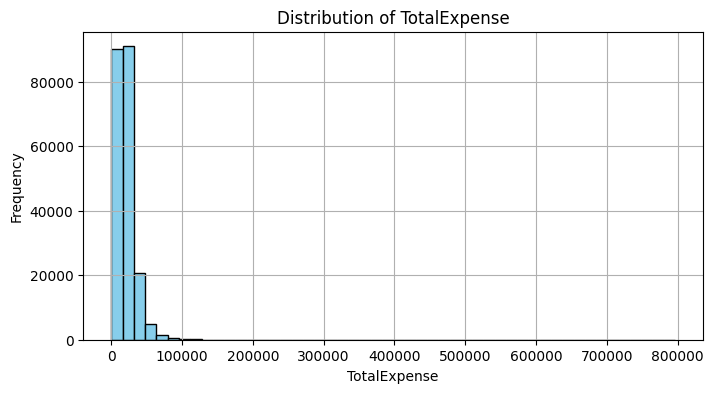

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fallback for display
def display_dataframe_to_user(title, df):
    print(f"\n--- {title} ---")
    display(df.head(37))

# Load data
train = pd.read_parquet("/content/train/HH_Level_train_data.parquet")

# Binary columns
binary_cols = [c for c in train.columns if c.startswith("Is_")]
train[binary_cols] = train[binary_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# HH Size as numeric
train["HH Size (For FDQ)"] = pd.to_numeric(train["HH Size (For FDQ)"], errors='coerce')

# States by household count and expense
state_summary = (train
    .groupby("State")
    .agg(Households=("HH_ID","count"), AvgExpense=("TotalExpense","mean"))
    .sort_values("Households", ascending=False)
    .head(37)
    .reset_index()
)
display_dataframe_to_user("Top 10 States by Households & Avg Expense", state_summary)

# Avg expense by HH Size
size_summary = (train
    .groupby("HH Size (For FDQ)")
    .agg(AvgExpense=("TotalExpense","mean"), Count=("HH_ID","count"))
    .reset_index()
    .sort_values("HH Size (For FDQ)")
)
display_dataframe_to_user("Avg Expense by HH Size", size_summary)

# Distribution of TotalExpense
plt.figure(figsize=(8, 4))
plt.hist(train["TotalExpense"], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of TotalExpense")
plt.xlabel("TotalExpense")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# # Scatter: Avg Expense vs HH Size
# plt.figure(figsize=(6, 4))
# plt.scatter(size_summary["HH Size (For FDQ)"], size_summary["AvgExpense"], color='green')
# plt.title("Avg TotalExpense vs Household Size")
# plt.xlabel("Household Size (For FDQ)")
# plt.ylabel("Average TotalExpense")
# plt.grid(True)
# plt.show()

Sector State  Rural_AvgExpense  Urban_AvgExpense
0         01      21477.113173      24600.116105
1         02      20325.364543      23297.275995
2         03      24226.121787      27660.167540
3         04      28153.763660      39988.748567
4         05      19616.054636      29750.524995
5         06      23422.985156      35687.223620
6         07      29144.131699      32201.908076
7         08      21256.639078      24931.443931
8         09      16438.133355      24061.364061
9         10      16815.580163      23193.370260
10        11      30795.061676      35233.529254
11        12      25120.314016      30811.272867
12        13      21387.861791      29166.801002
13        14      20891.442771      21915.942758
14        15      24087.587002      33482.589076
15        16      21192.077518      26414.904516
16        17      19245.427096      28698.995678
17        18      15917.097057      22010.978111
18        19      12549.534218      20192.387179
19        20      13

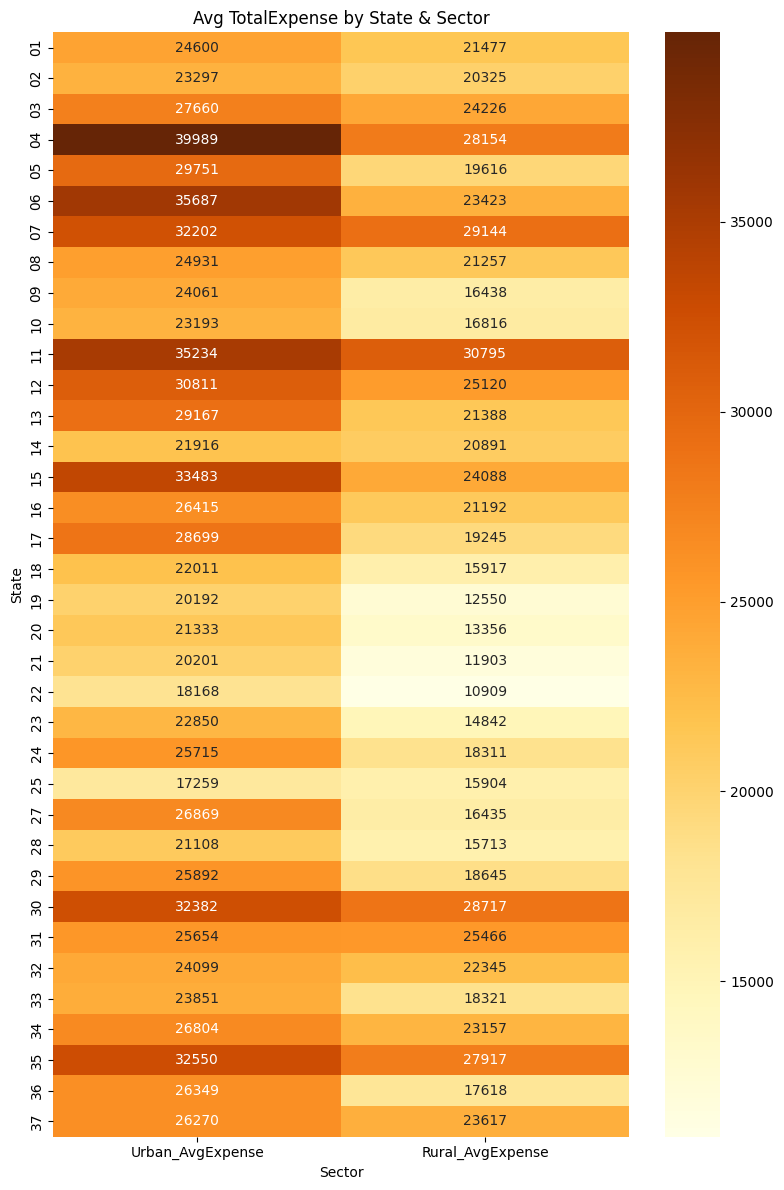

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and preprocess
train = pd.read_parquet("/content/train/HH_Level_train_data.parquet")
# Convert binary flags and HH Size
binary_cols = [c for c in train.columns if c.startswith("Is_")]
train[binary_cols] = train[binary_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
train["HH Size (For FDQ)"] = pd.to_numeric(train["HH Size (For FDQ)"], errors='coerce')
train["Sector"] = pd.to_numeric(train["Sector"], errors="coerce")

# 2. Pivot table: AvgExpense by State and Sector (all states)
state_sector = train.pivot_table(
    index="State",
    columns="Sector",
    values="TotalExpense",
    aggfunc="mean"
).rename(columns={1: "Rural_AvgExpense", 2: "Urban_AvgExpense"}).reset_index()

# Display the full table of all states
print(state_sector)  # in notebook this renders a full, scrollable table

# 3. Pivot table: AvgExpense by District and Sector (all districts)
district_sector = train.pivot_table(
    index="District",
    columns="Sector",
    values="TotalExpense",
    aggfunc="mean"
).rename(columns={1: "Urban_AvgExpense", 2: "Rural_AvgExpense"}).reset_index()

# Display the full table of all districts
print(district_sector)

# 5.Heatmap of State × Sector
import seaborn as sns
plt.figure(figsize=(8, 12))
sns.heatmap(
    state_sector.set_index("State")[["Urban_AvgExpense", "Rural_AvgExpense"]],
    annot=True, fmt=".0f", cmap="YlOrBr"
)
plt.title("Avg TotalExpense by State & Sector")
plt.tight_layout()
plt.show()

## Comparative Plots for Actual Average Total Expense Across State and Districts:-(Below 95%ile)

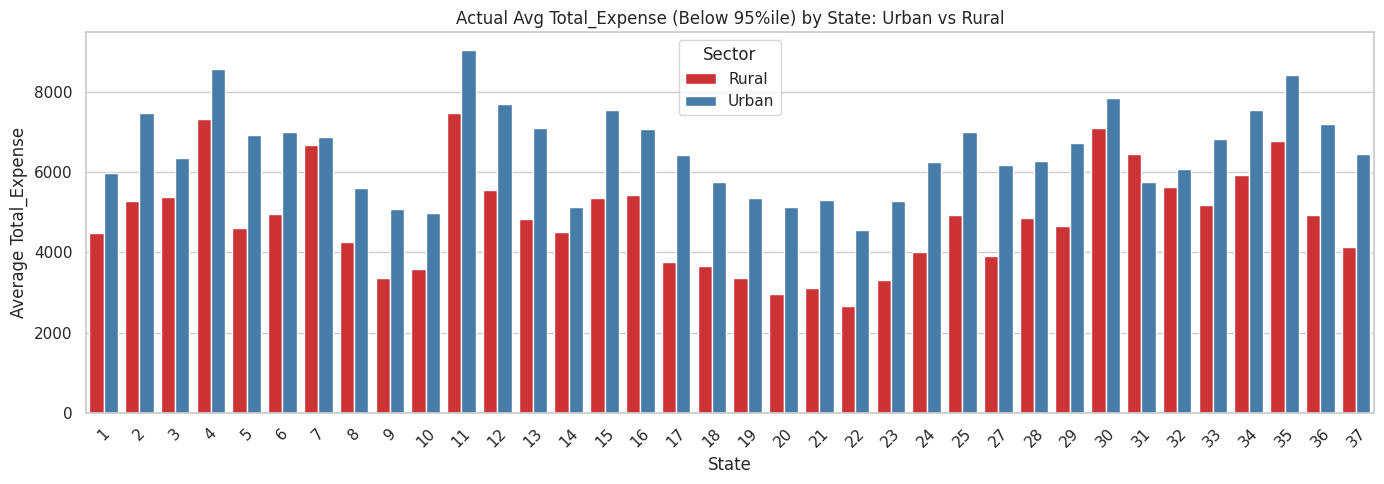

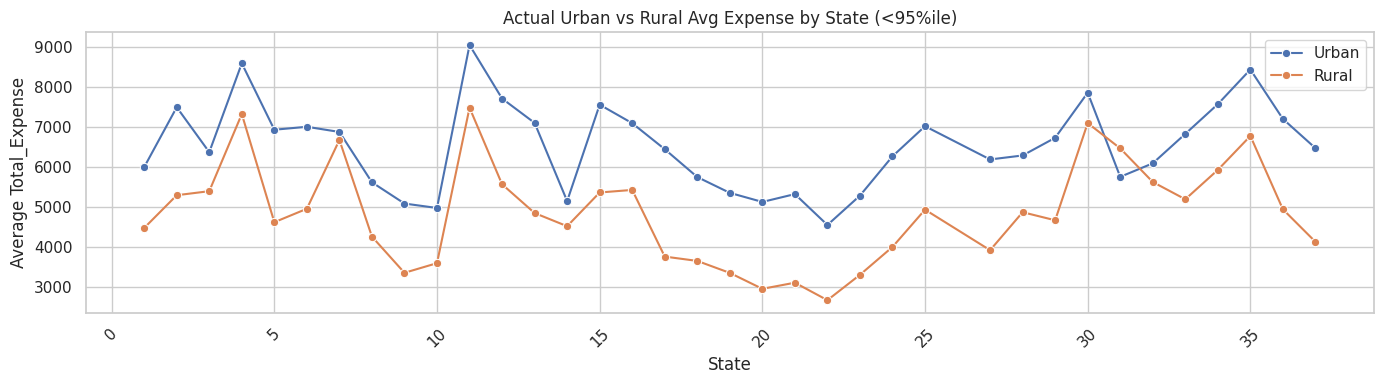

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load and Filter Data ===
train_df = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_train_v3.csv')
train_df["Sector"] = pd.to_numeric(train_df["Sector"], errors="coerce")

# Filter to below 95%ile based on TotalExpense
threshold_95 = train_df["Total_Expense"].quantile(0.95)
filtered_train = train_df[train_df["Total_Expense"] <= threshold_95].copy()

# Group by State and Sector (1=Rural, 2=Urban), compute average Total_Expense
pivot_state = filtered_train.pivot_table(
    index="State", columns="Sector",
    values="Total_Expense", aggfunc="mean"
).rename(columns={1: "Rural", 2: "Urban"}).reset_index()

# Melt for plotting
state_melt = pivot_state.melt(id_vars="State", value_vars=["Rural", "Urban"],
                              var_name="Sector", value_name="AvgExpense")

# === Plot: Actual Average TotalExpense by State (Urban vs Rural)
sns.set(style="whitegrid")
plt.figure(figsize=(14, 5))
ax = sns.barplot(data=state_melt, x="State", y="AvgExpense", hue="Sector", palette="Set1")
ax.set_title("Actual Avg Total_Expense (Below 95%ile) by State: Urban vs Rural")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Average Total_Expense")
plt.legend(title="Sector")
plt.tight_layout()
plt.show()

# === Line Plot: State-wise Urban vs Rural
plt.figure(figsize=(14, 4))
sns.lineplot(data=pivot_state, x="State", y="Urban", marker="o", label="Urban")
sns.lineplot(data=pivot_state, x="State", y="Rural", marker="o", label="Rural")
plt.title("Actual Urban vs Rural Avg Expense by State (<95%ile)")
plt.xlabel("State")
plt.ylabel("Average Total_Expense")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


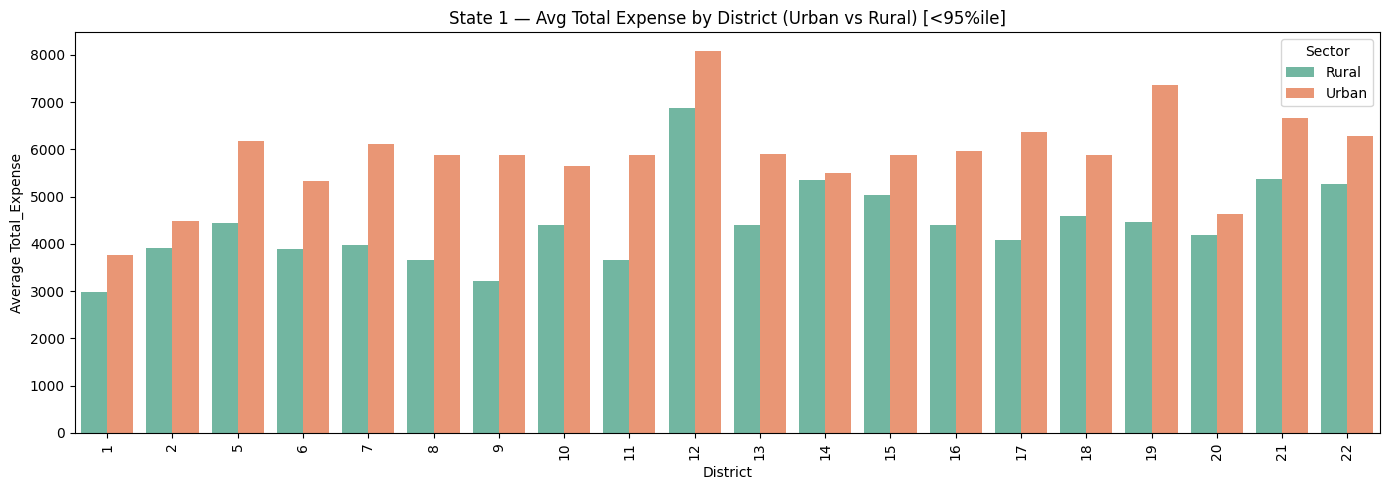

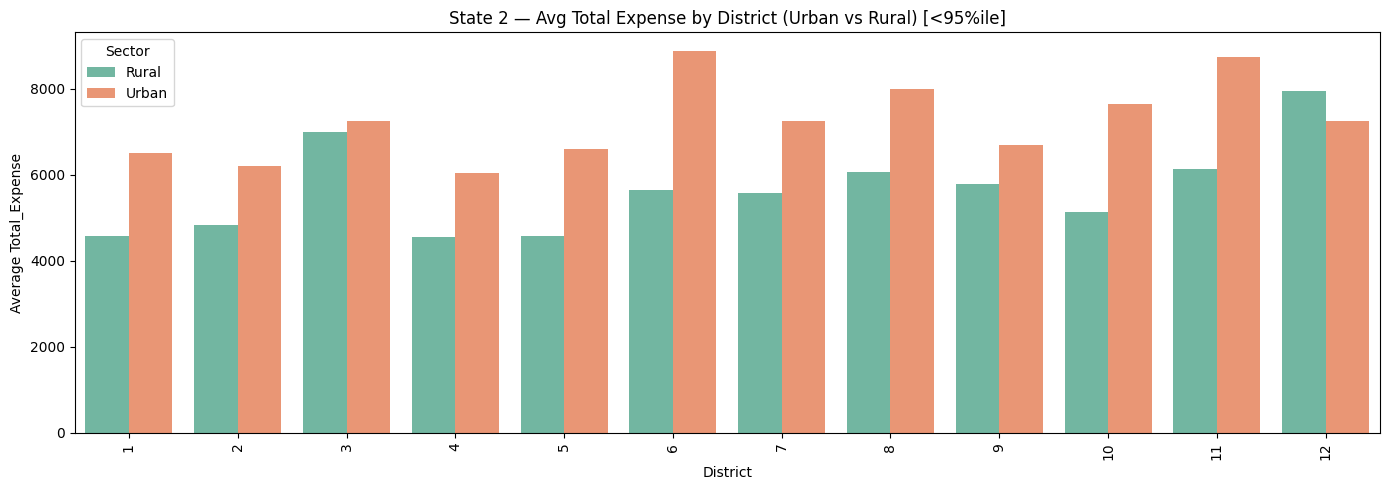

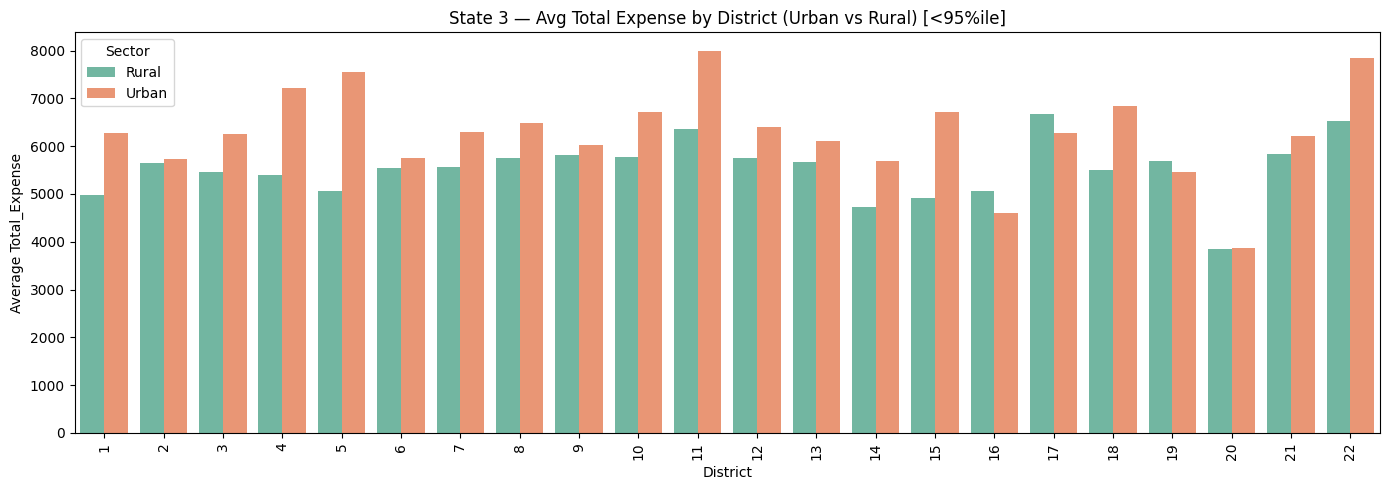

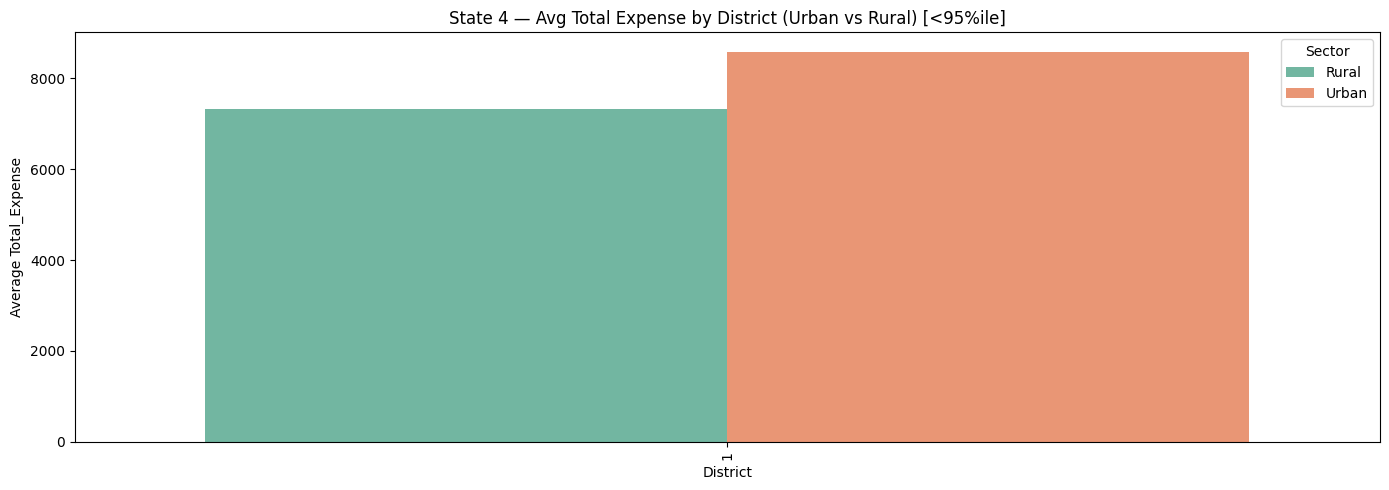

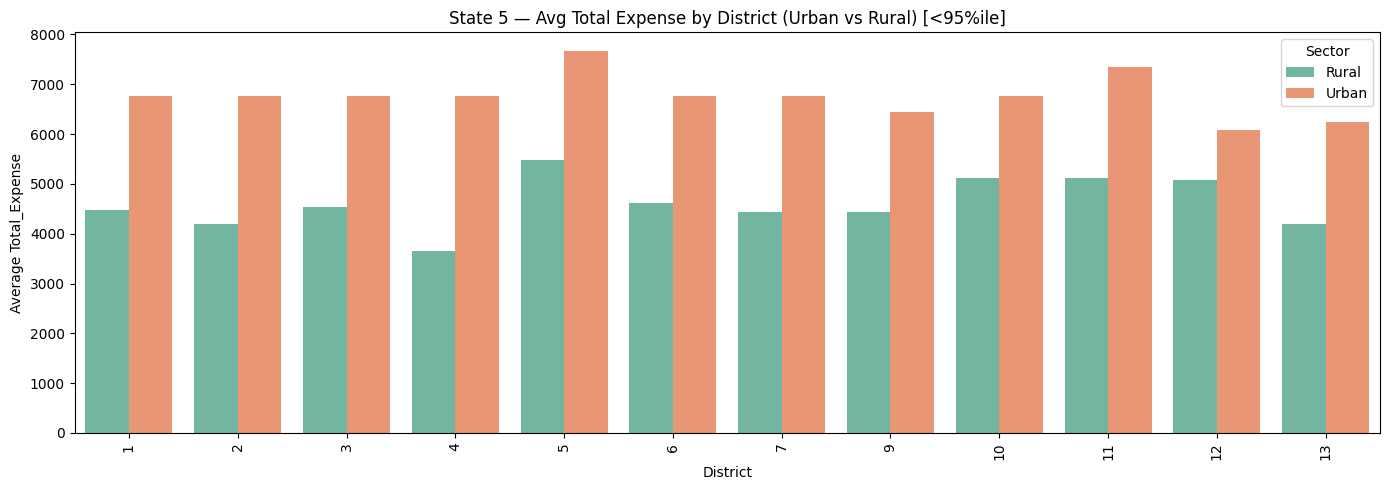

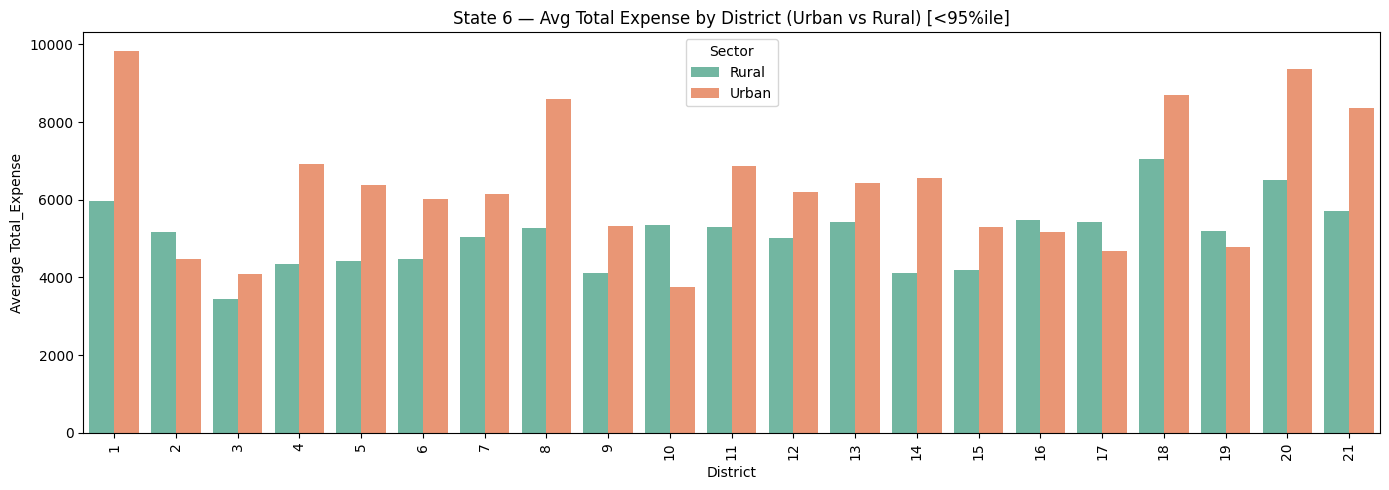

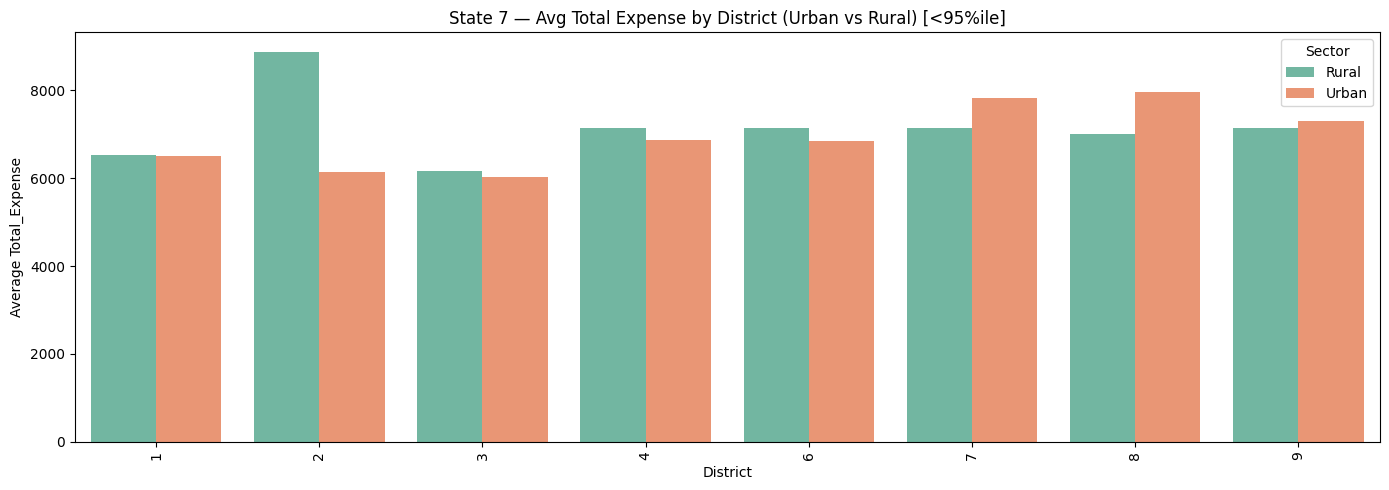

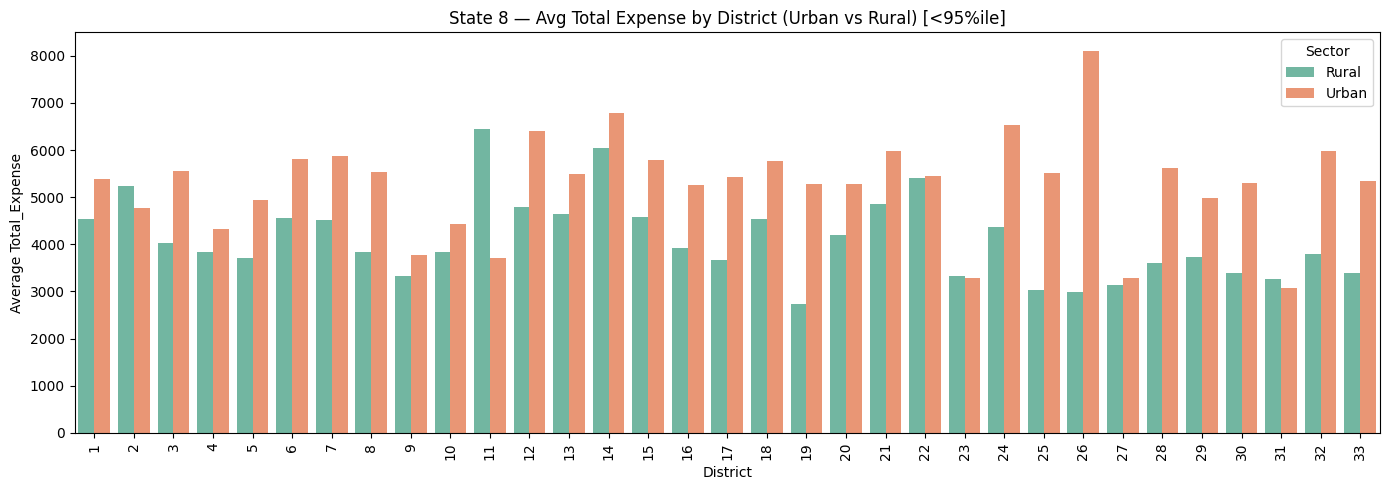

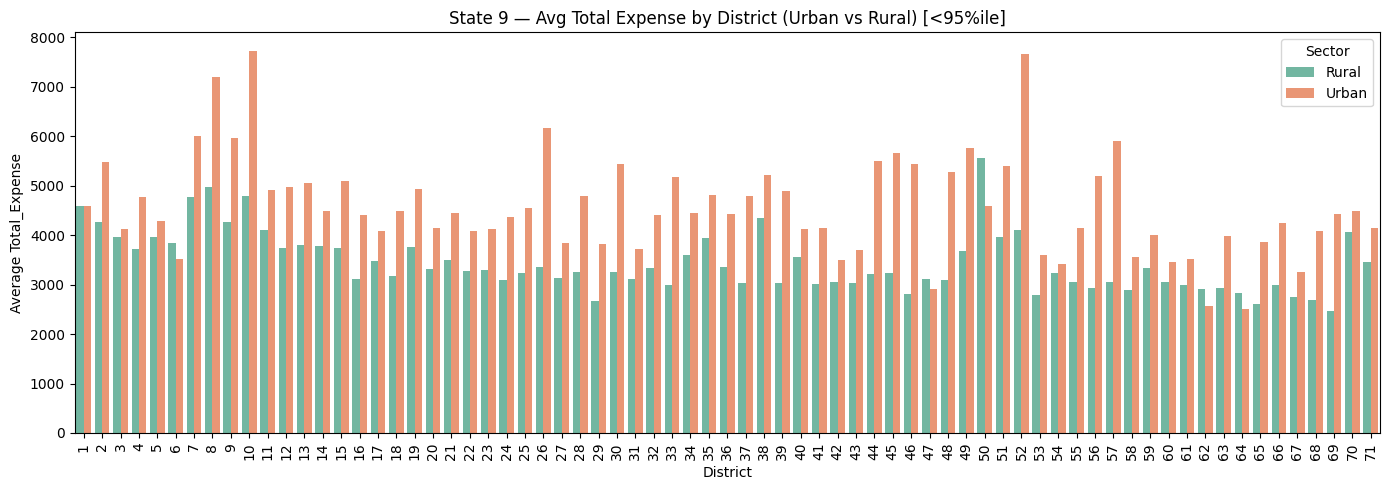

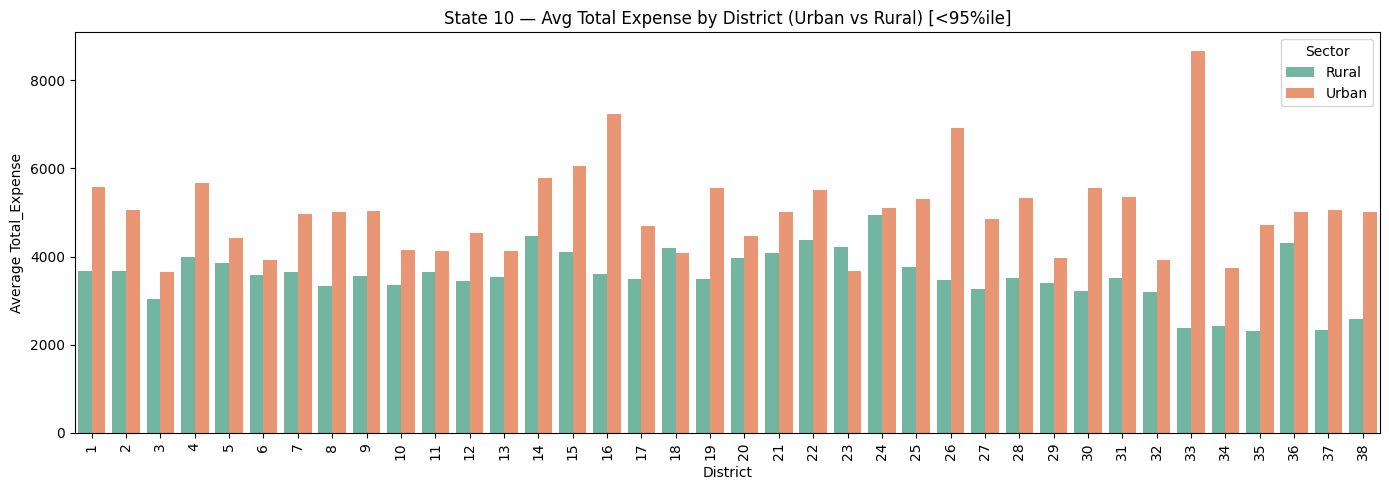

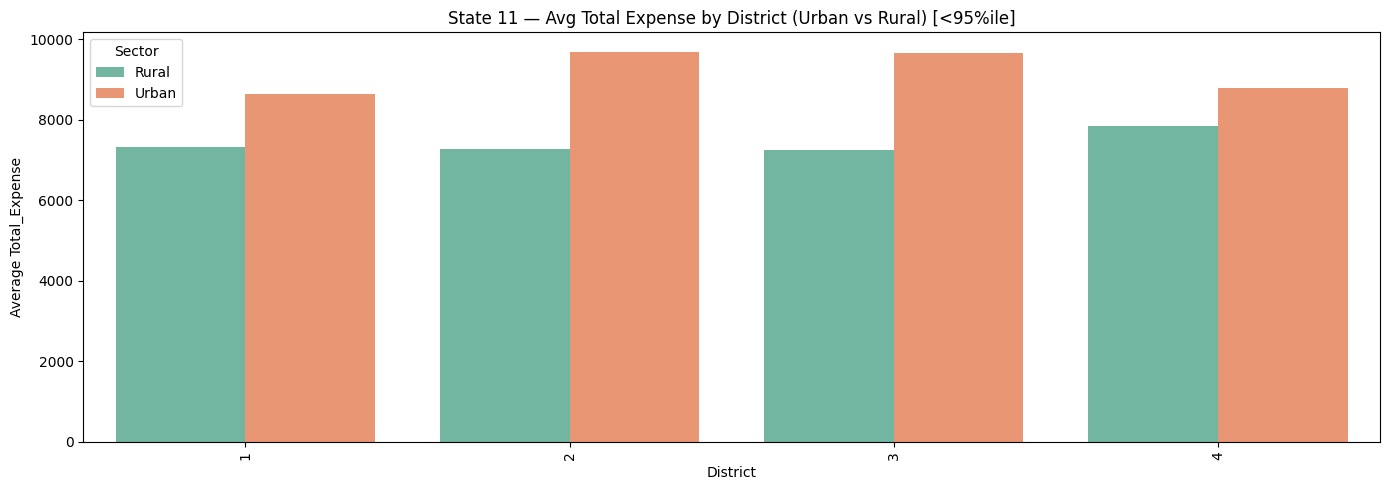

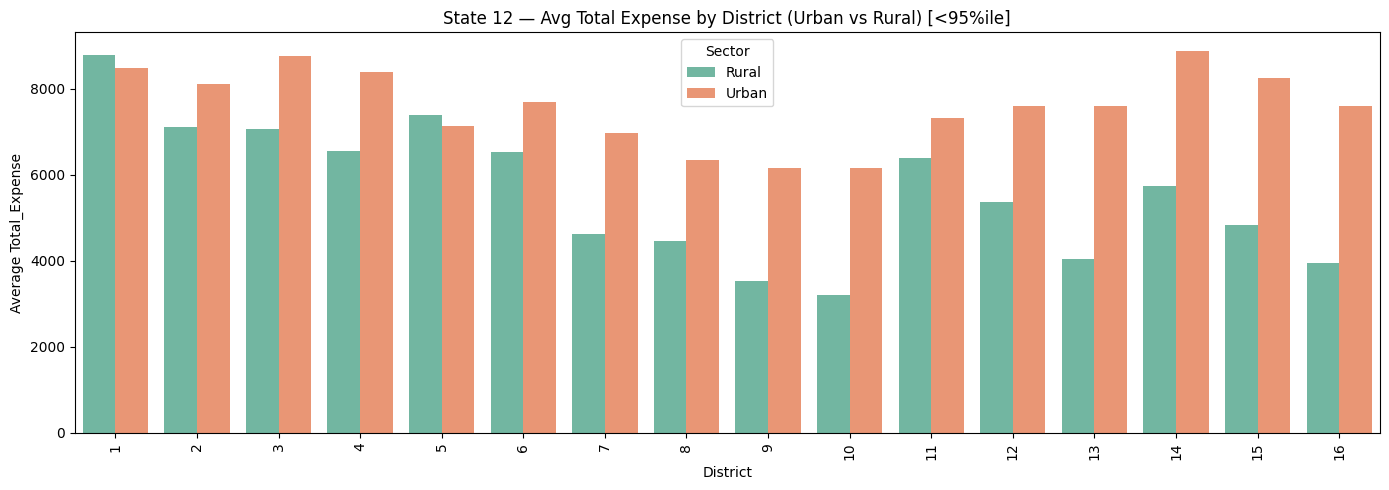

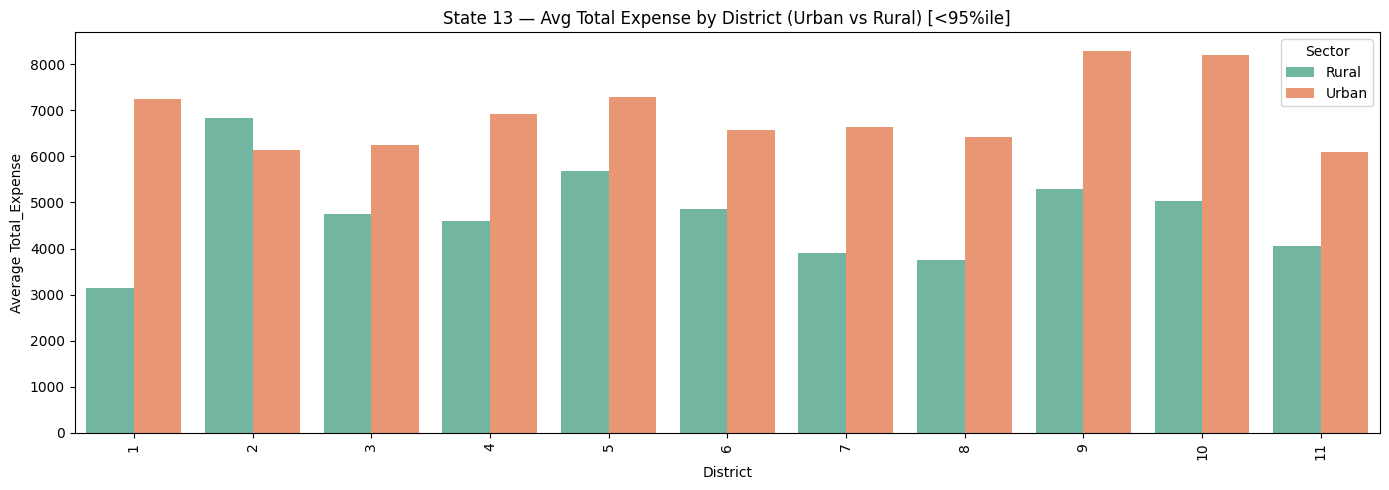

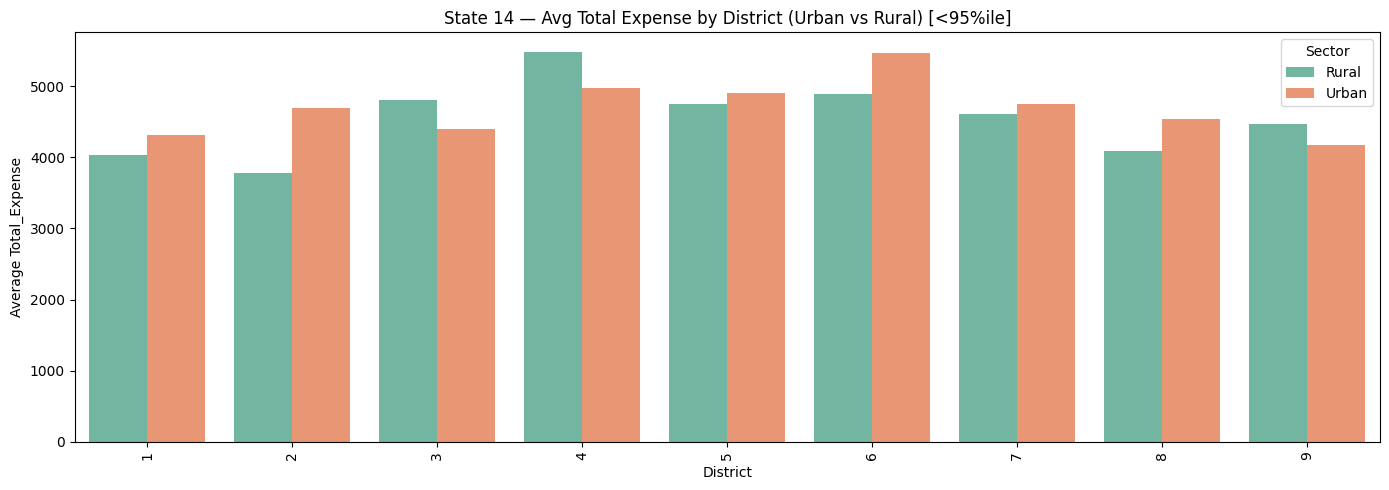

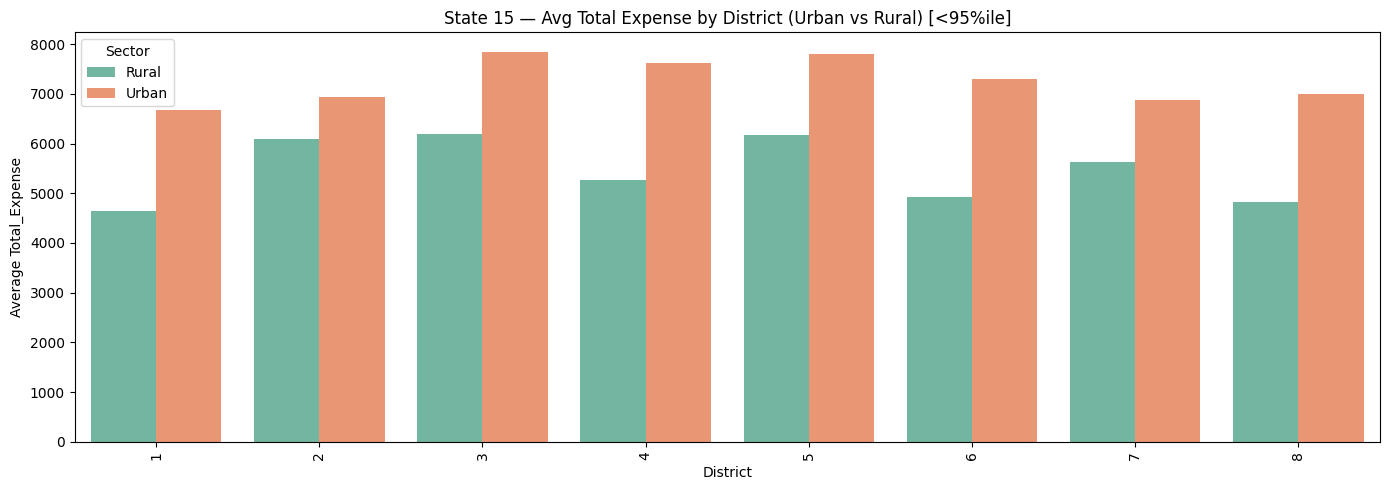

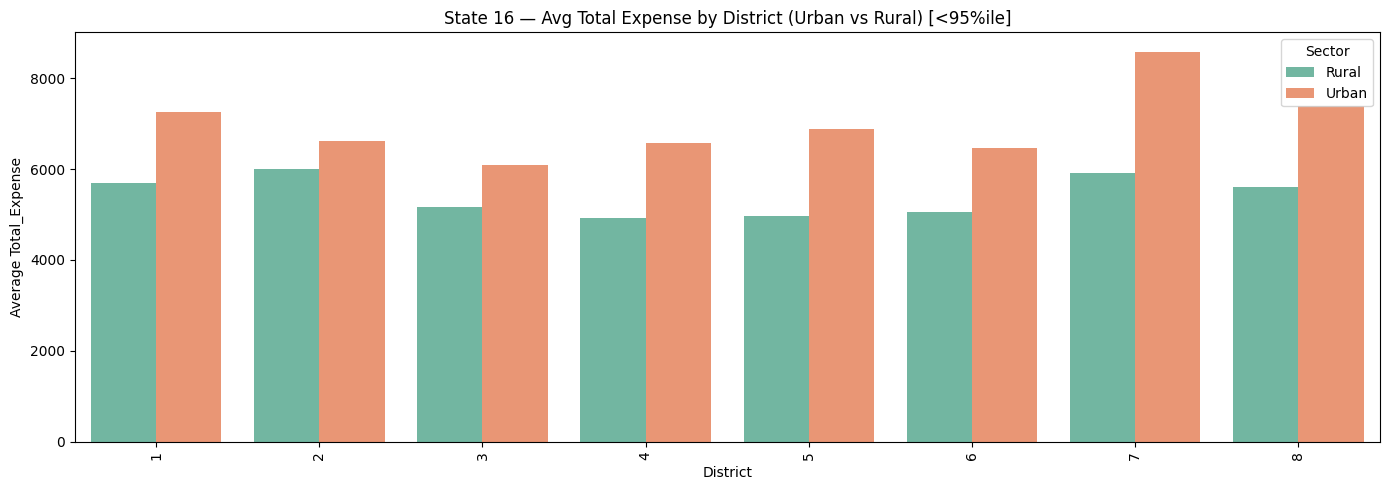

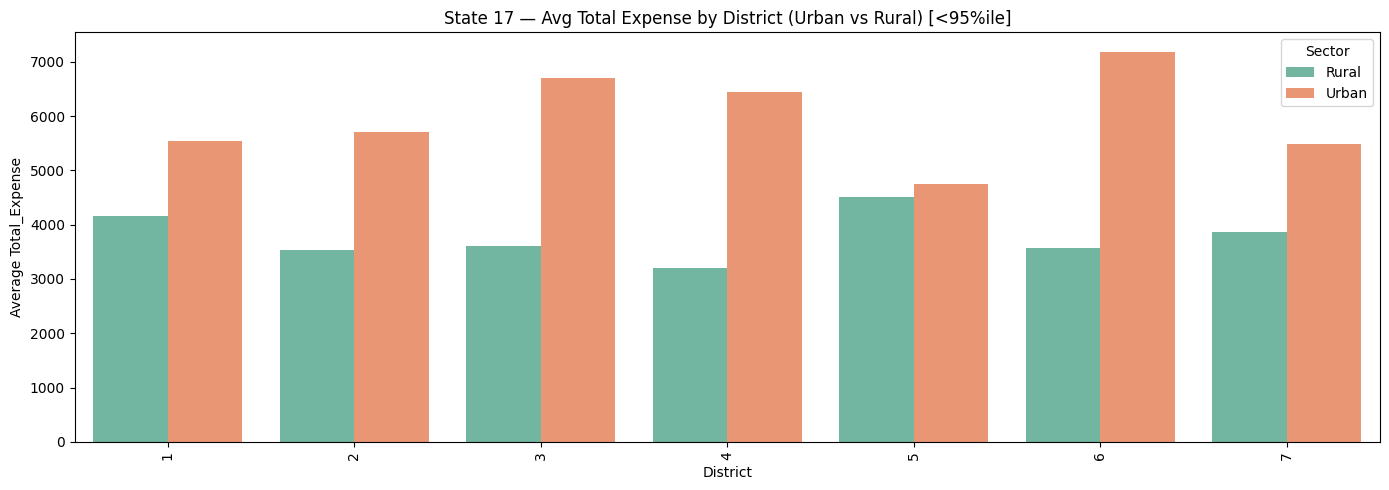

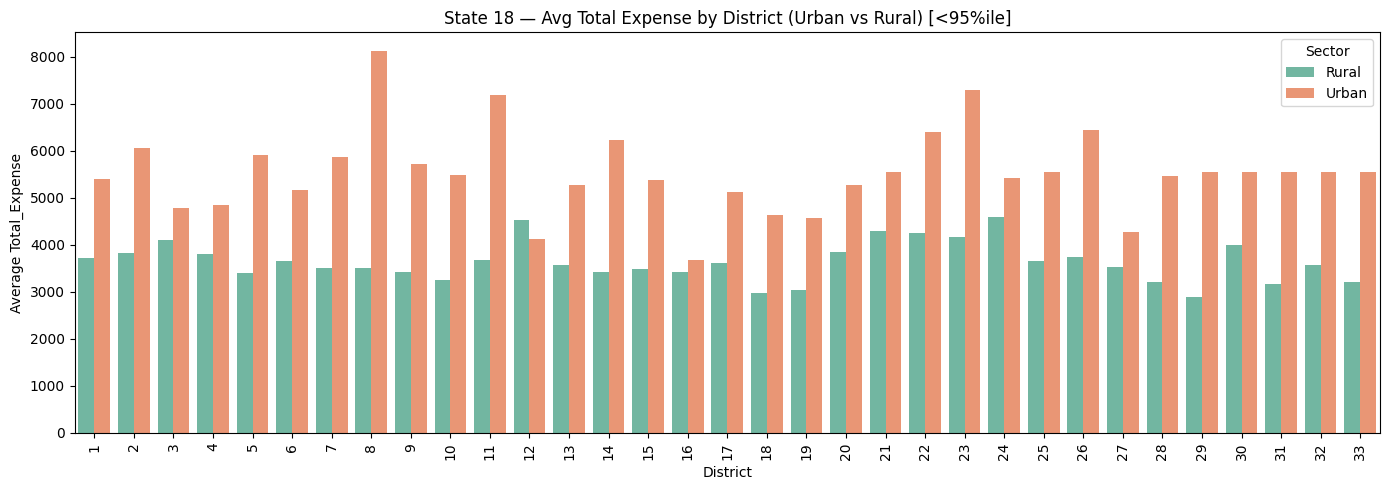

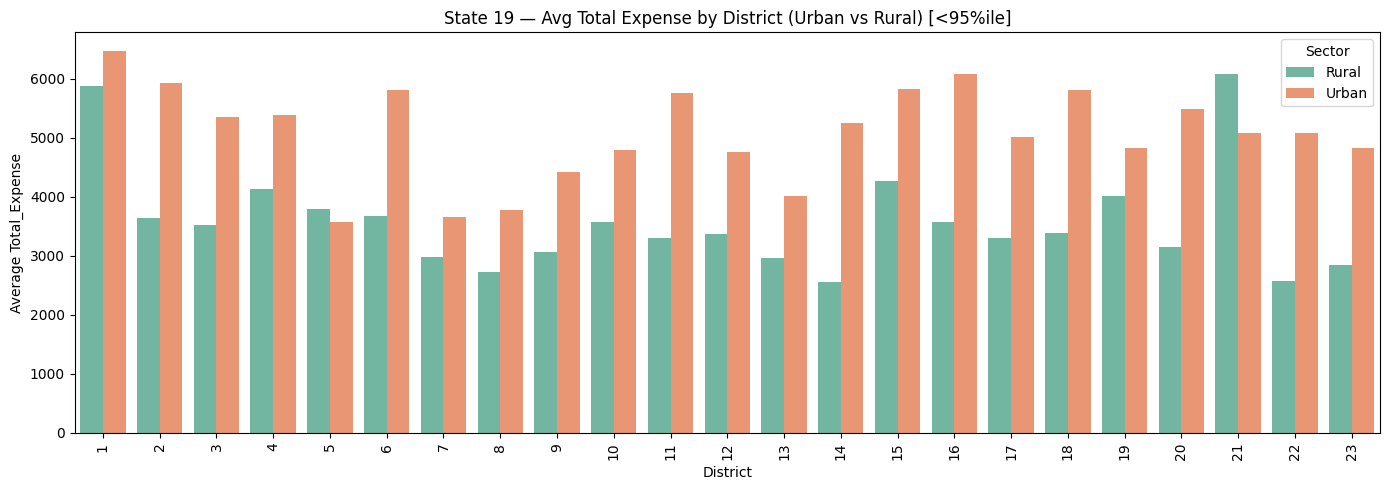

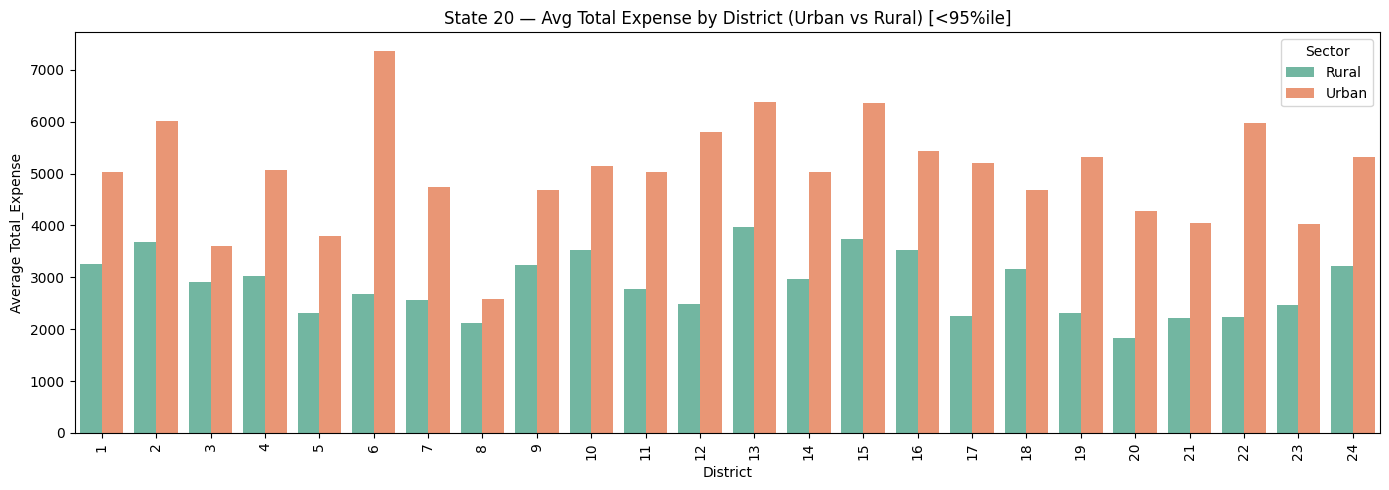

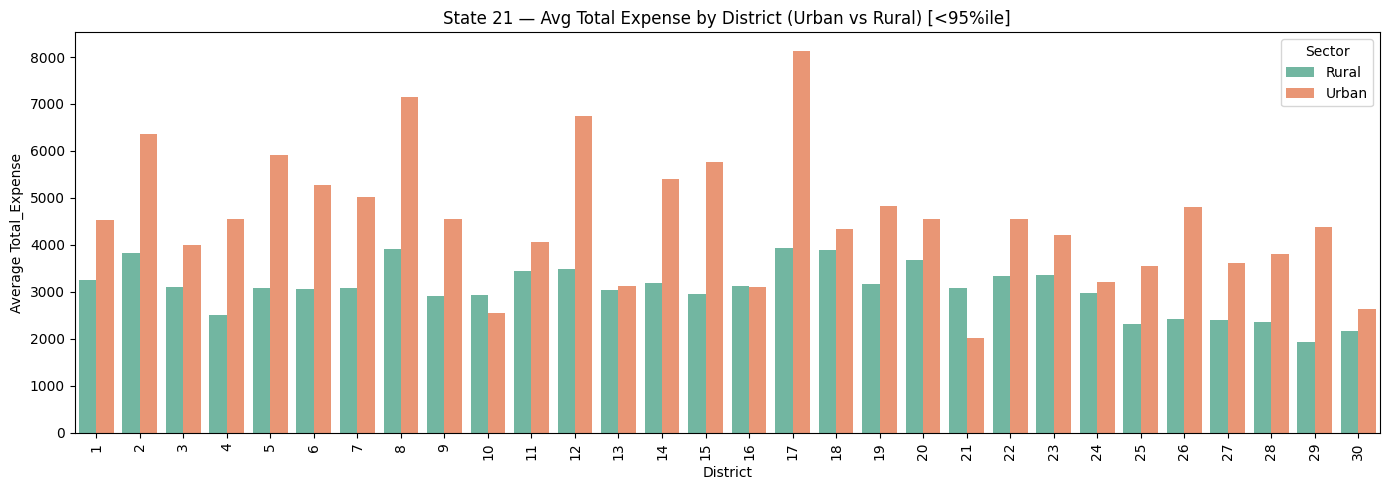

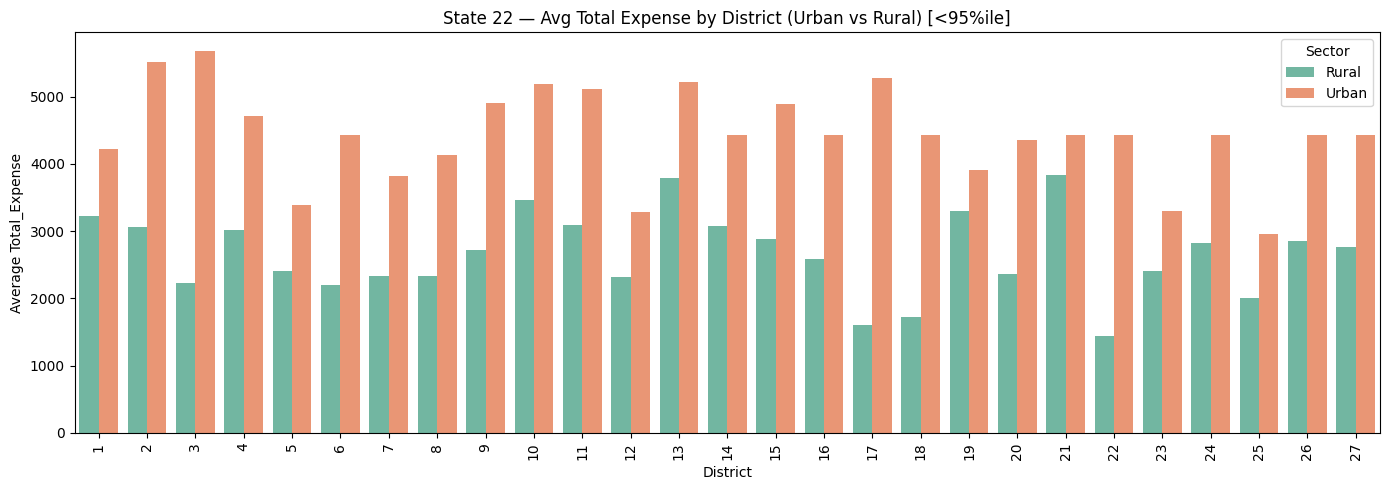

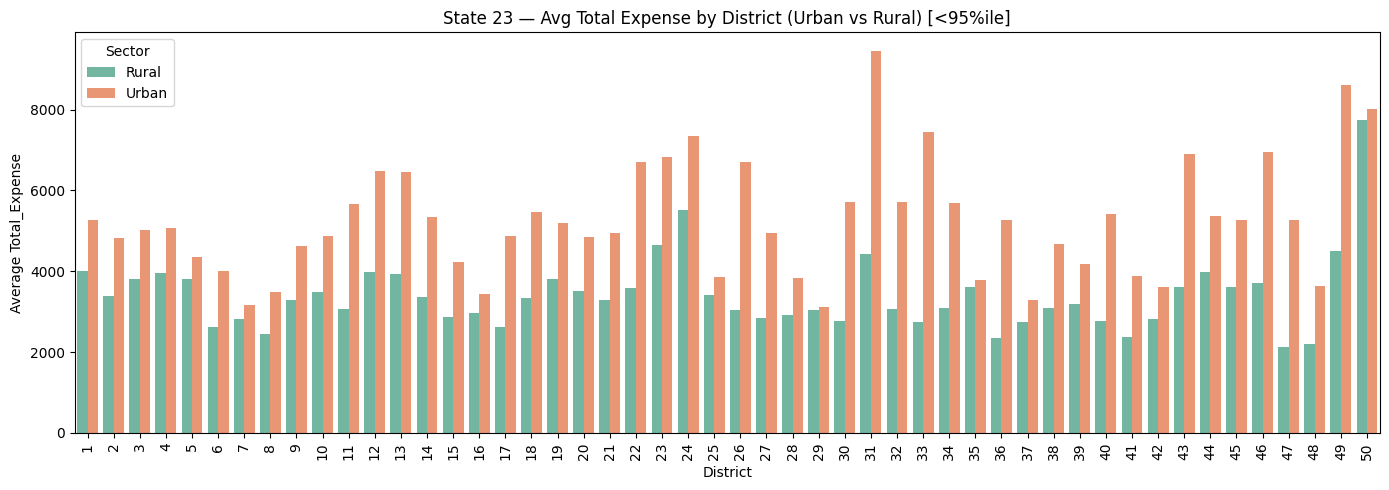

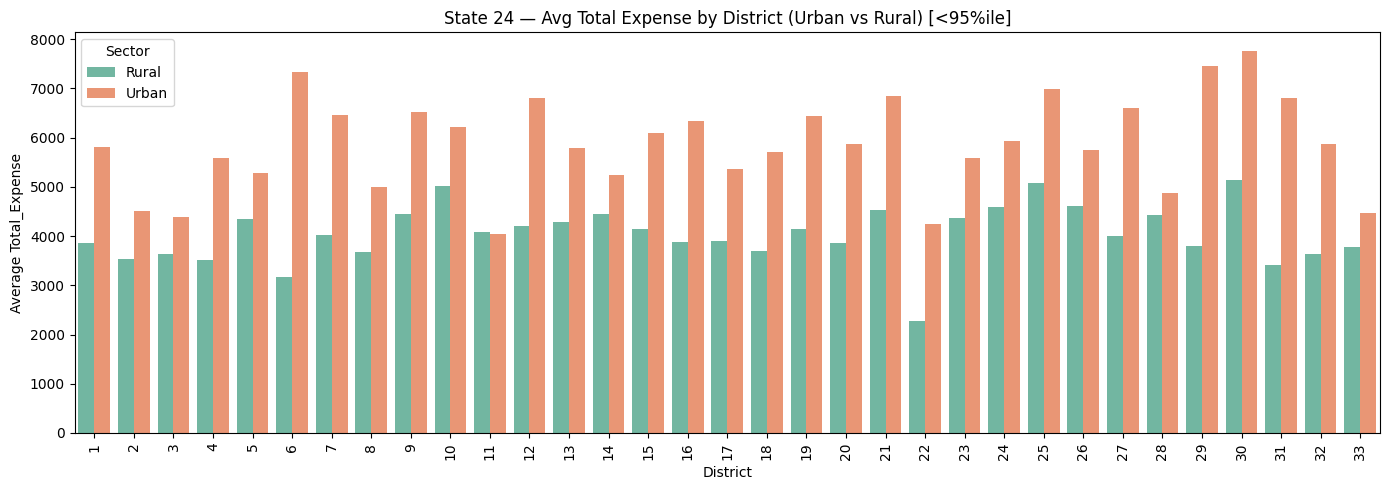

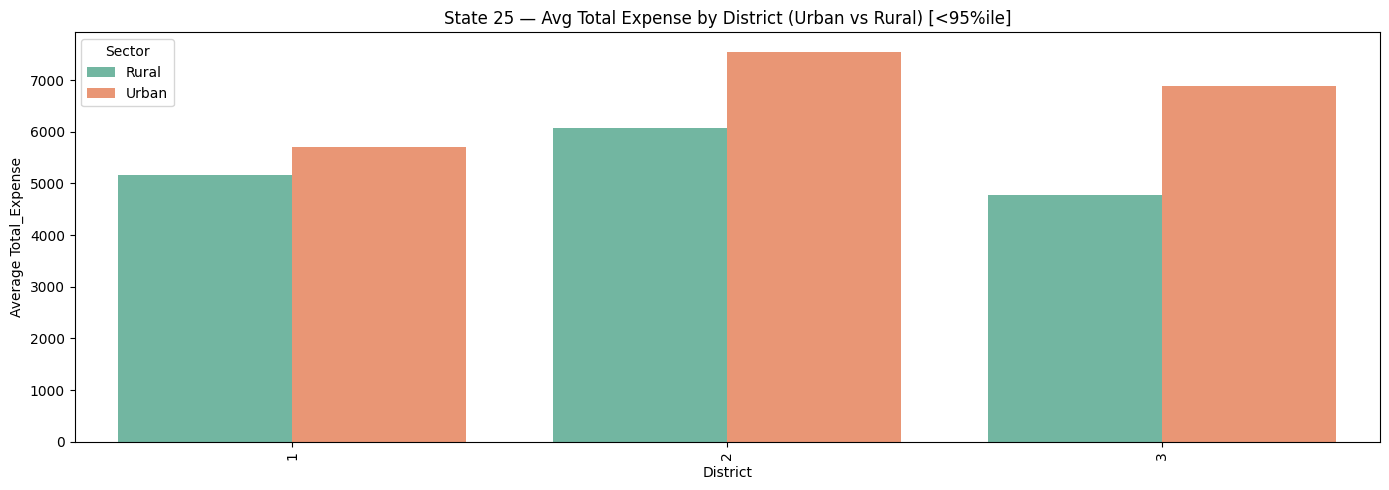

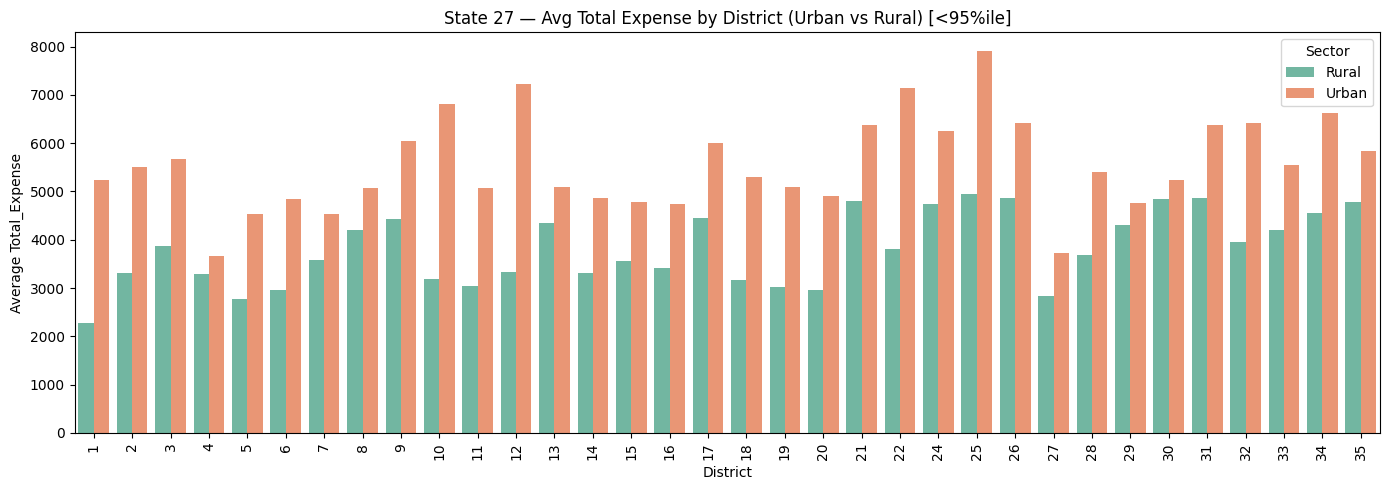

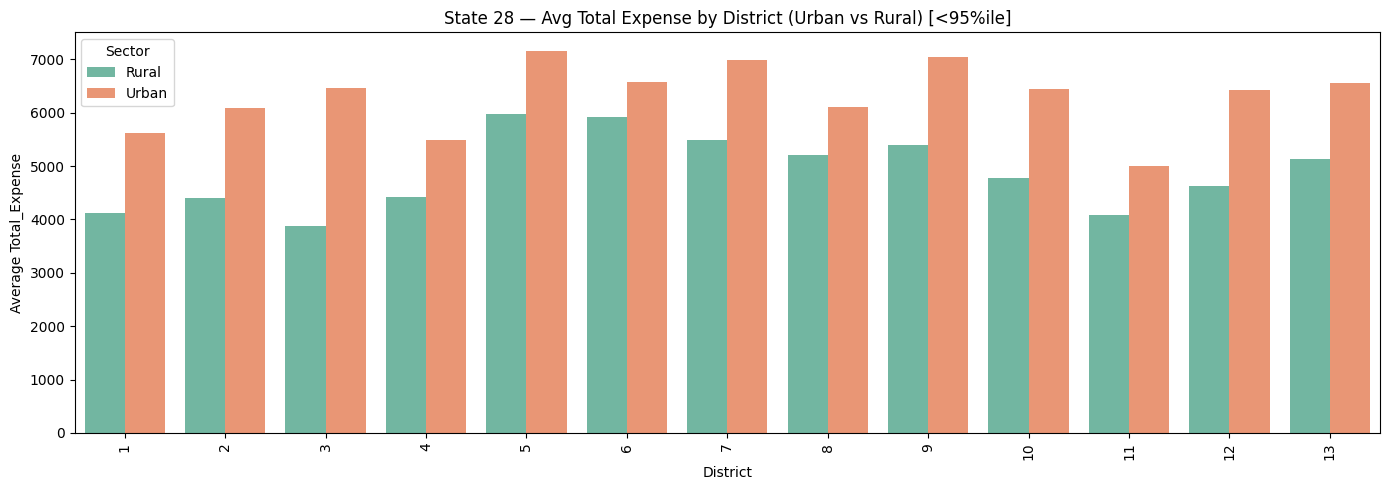

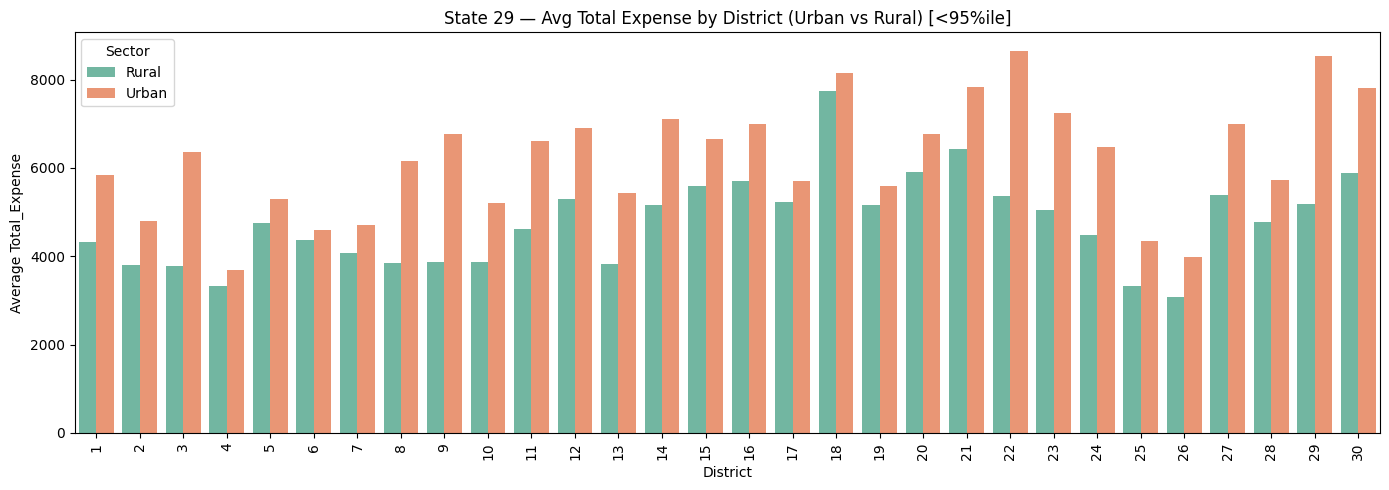

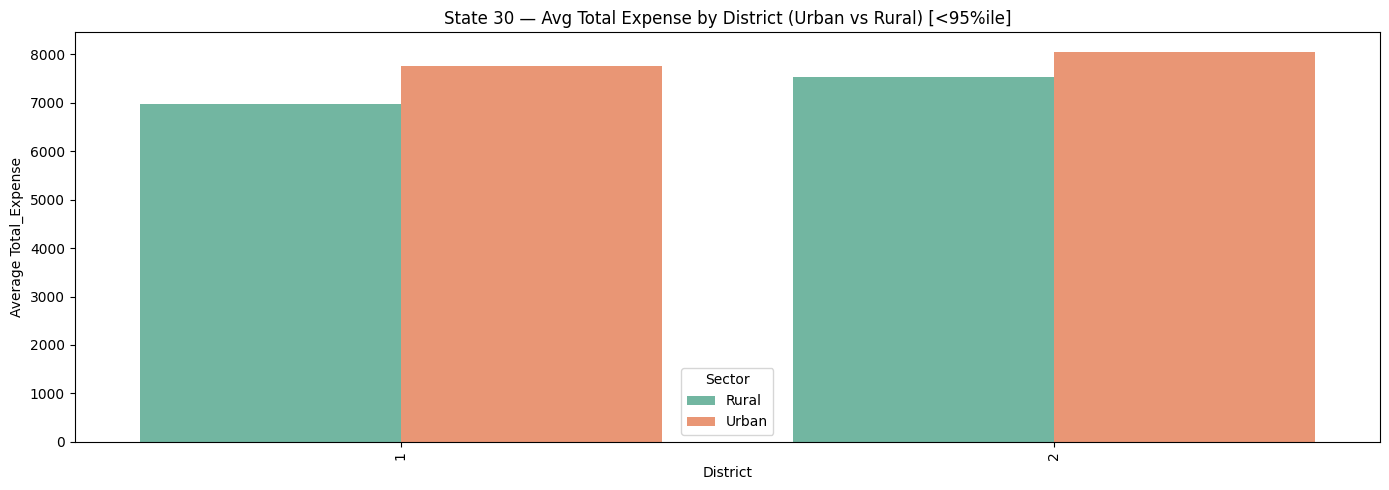

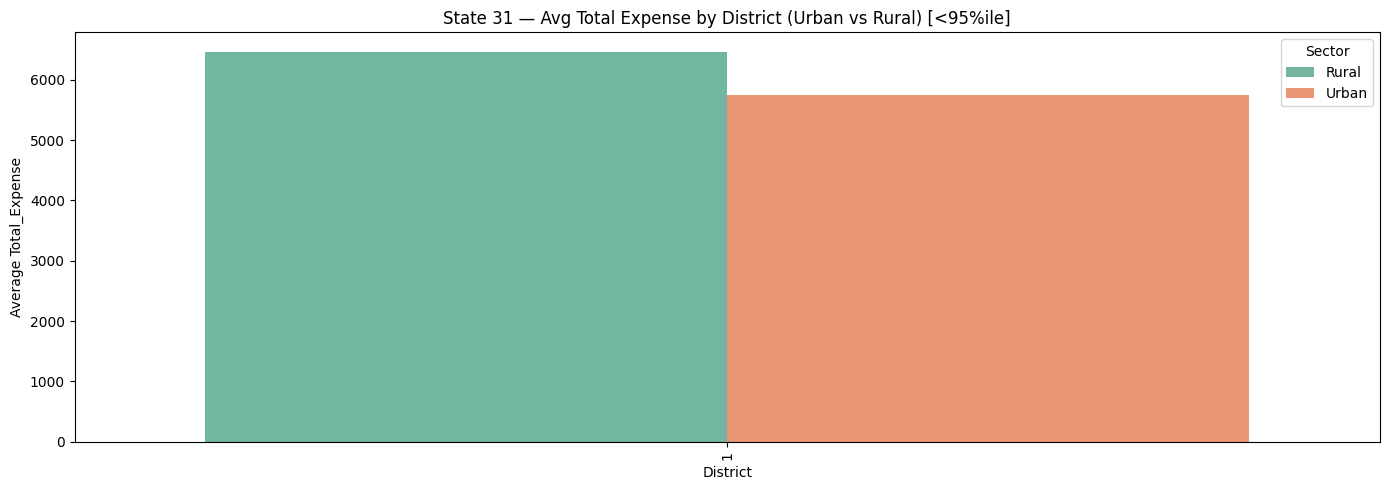

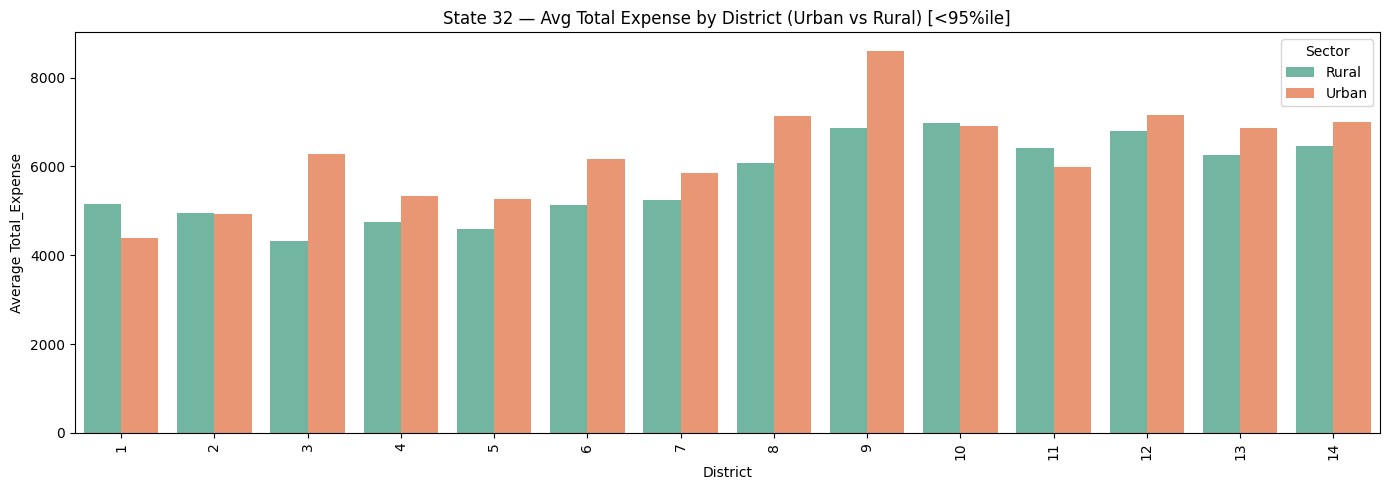

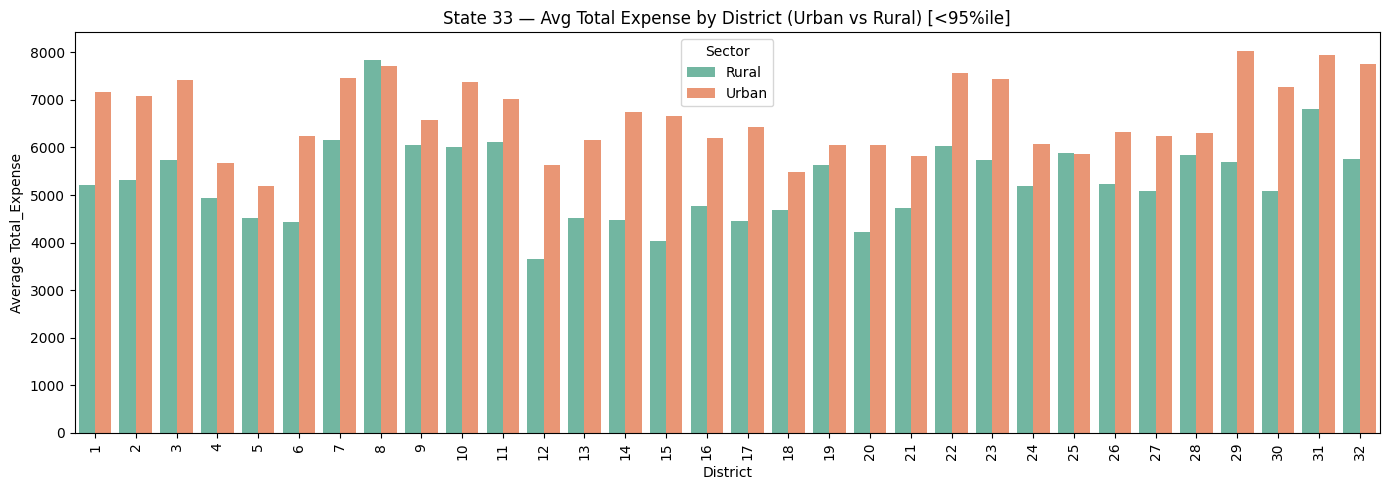

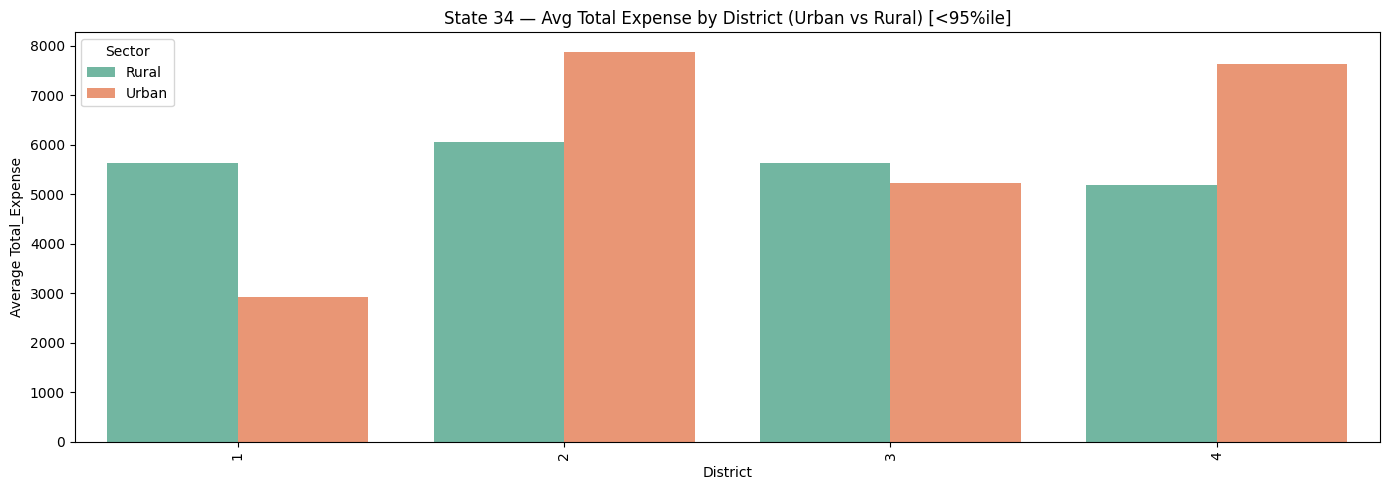

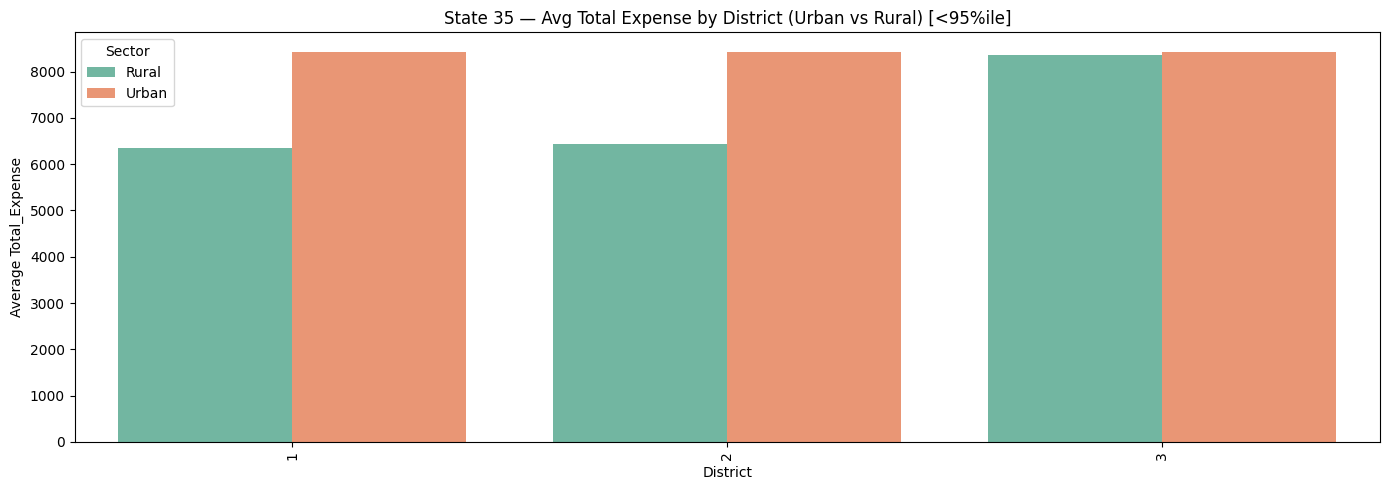

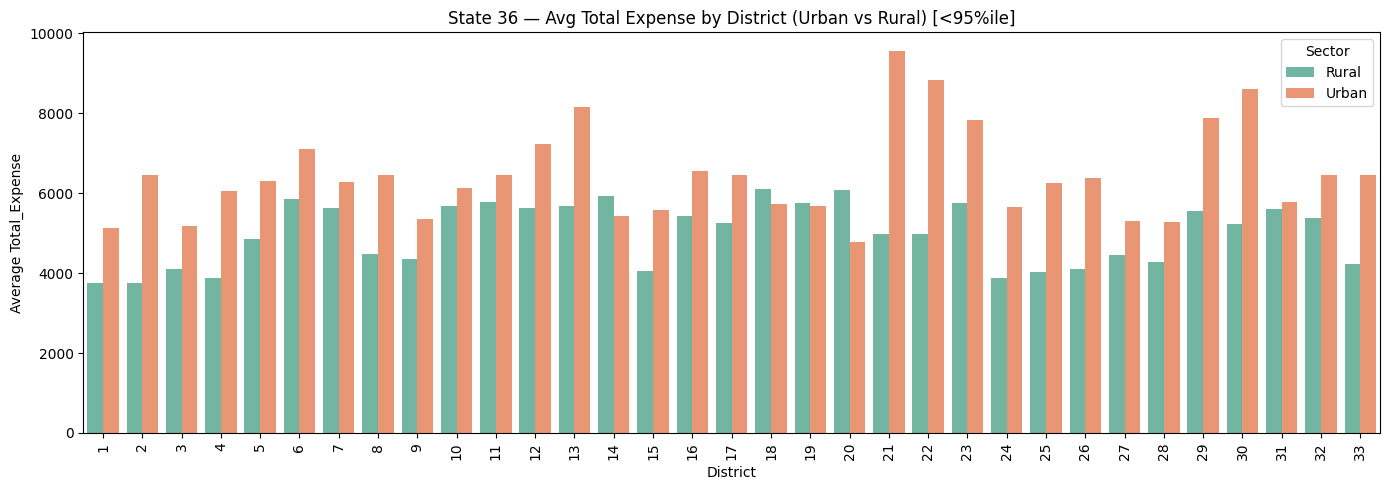

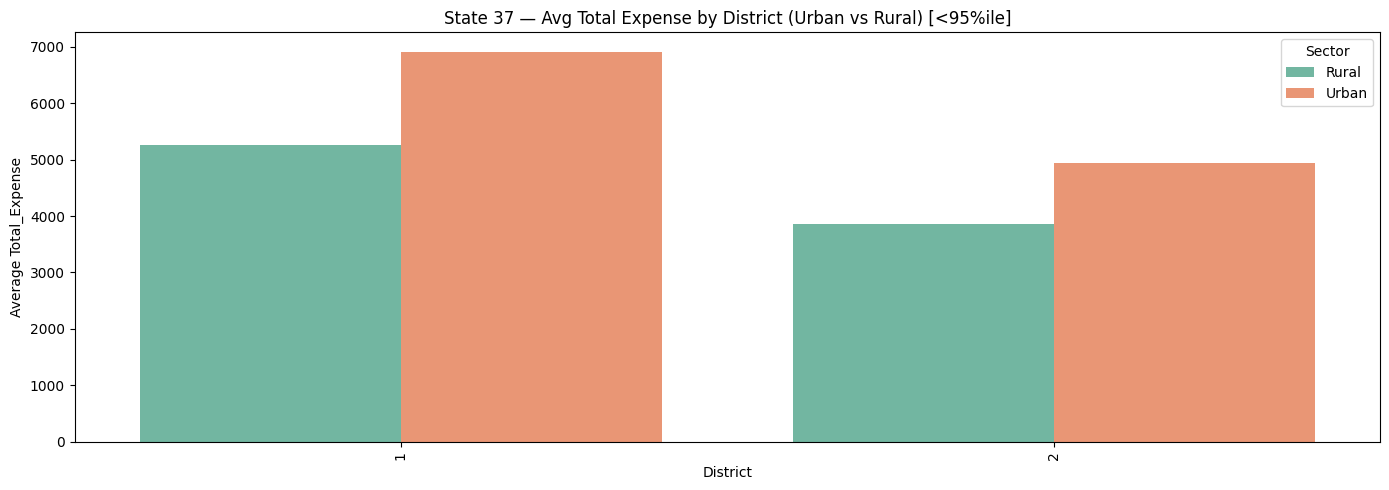

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === Load Data ===
train_df = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_train_v3.csv')
train_df["Sector"] = pd.to_numeric(train_df["Sector"], errors="coerce")

# === Filter to Below 95%ile ===
threshold_95 = train_df["Total_Expense"].quantile(0.95)
filtered_train = train_df[train_df["Total_Expense"] <= threshold_95].copy()

# === Create Output Directory for Saving (Optional) ===
os.makedirs("district_plots_by_state", exist_ok=True)

# === Loop Over Each State ===
states = sorted(filtered_train["State"].unique())

for state in states:
    state_df = filtered_train[filtered_train["State"] == state]

    # Let's say this is your pivot before imputation:
    pivot_district = state_df.pivot_table(
        index="District", columns="Sector",
        values="Total_Expense", aggfunc="mean"
    ).rename(columns={1: "Rural", 2: "Urban"})


    # 1) Compute the state‐level mean for Rural and Urban
    state_means = pivot_district.mean(skipna=True)

    # 2) Compute the global mean (in case a district has EVERY value NaN for one sector)
    global_means = pivot_district.stack().mean()

    # 3) Fill missing by:
    #    a) individual district leave as is
    #    b) if NaN, fill with state mean for that sector
    #    c) if still NaN (state mean was NaN too), fill with global mean
    pivot_district['Rural'] = (
        pivot_district['Rural']
          .fillna(state_means['Rural'])
          .fillna(global_means)
    )
    pivot_district['Urban'] = (
        pivot_district['Urban']
          .fillna(state_means['Urban'])
          .fillna(global_means)
    )

    # 4) Now you can safely reset_index() and plot/merge without any NaNs
    pivot_district = pivot_district.reset_index()

    # Skip if all values are NaN
    if pivot_district[["Rural", "Urban"]].isna().all().all():
        continue

    # Melt for Seaborn
    district_melt = pivot_district.melt(
        id_vars="District", value_vars=["Rural", "Urban"],
        var_name="Sector", value_name="AvgExpense"
    )

    # === Plot ===
    plt.figure(figsize=(14, 5))
    sns.barplot(data=district_melt, x="District", y="AvgExpense", hue="Sector", palette="Set2")
    plt.title(f"State {state} — Avg Total Expense by District (Urban vs Rural) [<95%ile]")
    plt.xlabel("District")
    plt.ylabel("Average Total_Expense")
    plt.xticks(rotation=90)
    plt.legend(title="Sector")
    plt.tight_layout()

    # Show or Save
    # plt.savefig(f"district_plots_by_state/state_{state}_district_expense.png")
    plt.show()


# Max Values of >95%ile of train/test data:

In [ ]:
# === Load Data ===
train_df = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_train_v3.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_test_v3.csv')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_train_v3.csv')
print("Maximum Value of Total Expense in train data:", train_df["Total_Expense"].max())

# Calculate the 95th percentile threshold
threshold_95 = train_df['Total_Expense'].quantile(0.95)
print(f"The calculated 95th percentile threshold is: {threshold_95}")

# Create a boolean mask for rows where 'Total_Expense' is below or equal to the threshold
train_below_95_mask = train_df['Total_Expense'] <= threshold_95

# Filter the 'Total_Expense' column using the mask and then find the maximum value
print("Maximum Value of Total Expense After Filtering Upto 95%ile in Train data:", train_df.loc[train_below_95_mask, 'Total_Expense'].max())

# You can also verify the maximum value in the full DataFrame
print("Maximum Value in original (unfiltered) train data:", train_df['Total_Expense'].max())

Maximum Value of Total Expense in train data: 265358.3561643835
The calculated 95th percentile threshold is: 13049.212940313113
Maximum Value of Total Expense After Filtering Upto 95%ile in Train data: 13049.199119373778
Maximum Value in original (unfiltered) train data: 265358.3561643835


In [ ]:
test_df  = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_test_v3.csv')
print("Maximum Value of Total Expense in test data:", test_df["Total_Expense"].max())

# Calculate the 95th percentile threshold
threshold_95 = test_df['Total_Expense'].quantile(0.95)

# Create a boolean mask for test data where 'Total_Expense' is below or equal to the TRAIN threshold
test_below_95_mask = test_df['Total_Expense'] <= threshold_95

# Filter the 'Total_Expense' column in the test data using the mask and find the maximum
print("Maximum Value of Total Expense After Filtering Upto 95%ile (using Train threshold) in Test data:", test_df.loc[test_below_95_mask, 'Total_Expense'].max())

Maximum Value of Total Expense in test data: 138477.4833659491
Maximum Value of Total Expense After Filtering Upto 95%ile (using Train threshold) in Test data: 13060.536203522506


In [ ]:
print(test_df["Total_Expense"])

0         8422.071755
1        11528.101761
2        31486.594260
3         9245.200587
4         4045.271526
             ...     
52345     2118.975212
52346     2757.214775
52347     2319.032485
52348     4370.033268
52349     2670.846869
Name: Total_Expense, Length: 52350, dtype: float64


In [ ]:
train_df[:100]

HH_ID  Sector  State  NSS_region  District  \
0   HCES2022310002282831212025228111301       2     28         283        12   
1   HCES2022310002282831212025228111302       2     28         283        12   
2   HCES2022310002282831212025228111303       2     28         283        12   
3   HCES2022310002282831212025228111304       2     28         283        12   
4   HCES2022310002282831212025228111305       2     28         283        12   
..                                  ...     ...    ...         ...       ...   
95  HCES2022310062282831212021228112307       2     28         283        12   
96  HCES2022310062282831212021228112308       2     28         283        12   
97  HCES2022310062282831212021228112309       2     28         283        12   
98  HCES2022310062282831212021228112310       2     28         283        12   
99  HCES2022310062282831212021228112311       2     28         283        12   

    household_type  head_religion  head_social  household_size  profession  \
0                2              1            3               1         8.0   
1                2              1            3               5         9.0   
2                2              1            3               5         5.0   
3                1              1            3               2        10.0   
4                9              1            3               1         0.0   
..             ...            ...          ...             ...         ...   
95               3              2            3               4        10.0   
96               9              1            3               1         0.0   
97               1              1            2               3         2.0   
98               9              1            2               2         0.0   
99               2              1            3               4         5.0   

    ...  away_home  day_meal  home_meal  away_meal  internet_use  \
0   ...   0.000000       3.0  30.000000  60.000000             1   
1   ...   0.000000       3.0  81.600000   8.400000             1   
2   ...   0.000000       3.0  90.000000   0.000000             1   
3   ...   0.000000       3.0  90.000000   0.000000             0   
4   ...   0.000000       3.0  30.000000  60.000000             0   
..  ...        ...       ...        ...        ...           ...   
95  ...   0.000000       3.0  90.000000   0.000000             0   
96  ...   3.000000       2.0  54.000000   6.000000             0   
97  ...   1.333333       2.0  57.333333   2.666667             1   
98  ...   0.000000       2.0  60.000000   0.000000             1   
99  ...   0.500000       2.0  60.000000   1.000000             1   

    Total_Expense  demographic_param_lr  having_constant  online_constant  \
0    19675.643836           5642.525417      9694.607287     15930.910274   
1     8059.522114          22650.127030     17885.295683     27132.851338   
2     7628.018004          26302.605704     17885.295683     27132.851338   
3     6522.622309           5556.389219     13459.759837     15930.910274   
4     6765.772994           2653.820588     13459.759837     15930.910274   
..            ...                   ...              ...              ...   
95    2893.732877          20779.918867     21058.102406     15930.910274   
96    6929.890411           9726.046943     13459.759837     15930.910274   
97    9540.219178          18779.599487     17885.295683     22494.653472   
98    7217.088063          17312.561512      9694.607287     27132.851338   
99    6877.495597          22933.487639     27492.262583     33688.034426   

    Personal_level_constant  
0              18402.972829  
1              32909.614514  
2              22169.857786  
3              14034.637967  
4               7805.306912  
..                      ...  
95             21332.234864  
96              9447.508778  
97             28002.543425  
98             13181.331621  
99             26392.735417  

[100 rows x 34 columns]

In [ ]:
test_df

HH_ID  Sector  State  NSS_region  \
0      HCES2022310002282831212025228111311       2     28         283   
1      HCES2022310002282831212025228111313       2     28         283   
2      HCES2022310002282831212025228111316       2     28         283   
3      HCES2022310012282831212023128111302       2     28         283   
4      HCES2022310012282831212023128111309       2     28         283   
...                                    ...     ...    ...         ...   
52345  HCES2022699991212130123093221201304       1     21         213   
52346  HCES2022699991212130123093221201307       1     21         213   
52347  HCES2022699991212130123093221201308       1     21         213   
52348  HCES2022699991212130123093221201310       1     21         213   
52349  HCES2022699991212130123093221201311       1     21         213   

       District  household_type  head_religion  head_social  household_size  \
0            12               2              1            3               3   
1            12               2              1            2               1   
2            12               2              1            2               3   
3            12               1              1            9               2   
4            12               1              1            9               4   
...         ...             ...            ...          ...             ...   
52345         1               5              1            3               3   
52346         1               5              1            1               4   
52347         1               6              1            3               5   
52348         1               1              1            1               1   
52349         1               4              1            1               4   

       profession  ...  away_home  day_meal  home_meal  away_meal  \
0             3.0  ...   0.000000  3.000000  83.333333   6.666667   
1            10.0  ...   0.000000  3.000000  60.000000  30.000000   
2             3.0  ...   0.000000  3.000000  90.000000   0.000000   
3             6.0  ...   3.500000  3.000000  79.500000  10.500000   
4             7.0  ...   0.333333  2.666667  41.000000   9.000000   
...           ...  ...        ...       ...        ...        ...   
52345        10.0  ...   0.000000  3.000000  90.000000   0.000000   
52346         7.0  ...   0.000000  3.000000  90.000000   0.000000   
52347        10.0  ...   0.000000  3.000000  87.000000   3.000000   
52348         7.0  ...   0.000000  3.000000  90.000000   0.000000   
52349         4.0  ...   0.000000  2.750000  75.000000   7.500000   

       internet_use  Total_Expense  demographic_param_lr  having_constant  \
0                 1    8422.071755          20429.016241     24319.455860   
1                 1   11528.101761          12885.466218      9694.607287   
2                 1   31486.594260          22927.909135     30286.981673   
3                 0    9245.200587           4373.140035     20013.051913   
4                 1    4045.271526          27110.435294     20013.051913   
...             ...            ...                   ...              ...   
52345             0    2118.975212           7943.225741      9879.688833   
52346             1    2757.214775          20884.784500     13150.971791   
52347             0    2319.032485          20805.028845     13150.971791   
52348             0    4370.033268           1970.962801      4776.396751   
52349             1    2670.846869          19119.097583     13150.971791   

       online_constant  Personal_level_constant  
0         27132.851338             23642.813749  
1         15930.910274             15440.659777  
2         27132.851338             18341.864061  
3         15930.910274             20725.831174  
4         27132.851338             19889.948571  
...                ...                      ...  
52345     11923.841051             18341.864061  
52346     16806.396780             21332.234864  
52347  

# Count of Samples below 95%ile and above 95%ile(outliers):

In [ ]:
# === Compute 95th Percentile Threshold on Training Labels ===
threshold_95 = train_df['Total_Expense'].quantile(0.95)

# === Count records below and above threshold in Train and Test ===
train_below_95 = (train_df['Total_Expense'] <= threshold_95).sum()
train_above_95 = (train_df['Total_Expense'] > threshold_95).sum()

test_below_95 = (test_df['Total_Expense'] <= threshold_95).sum()
test_above_95 = (test_df['Total_Expense'] > threshold_95).sum()

print(f"📊 Train data count:")
print(f"  - Below 95th percentile (<= ₹{threshold_95:.2f}): {train_below_95}")
print(f"  - Above 95th percentile (>  ₹{threshold_95:.2f}): {train_above_95}")

print(f"\n📊 Test data count:")
print(f"  - Below 95th percentile (<= ₹{threshold_95:.2f}): {test_below_95}")
print(f"  - Above 95th percentile (>  ₹{threshold_95:.2f}): {test_above_95}")

📊 Train data count:
  - Below 95th percentile (<= ₹13049.21): 198926
  - Above 95th percentile (>  ₹13049.21): 10470

📊 Test data count:
  - Below 95th percentile (<= ₹13049.21): 49728
  - Above 95th percentile (>  ₹13049.21): 2622


In [ ]:
print(f"\nTrain Total: {len(train_df)}, Test Total: {len(test_df)}")
print(f"Train: {train_above_95 / len(train_df) * 100:.2f}% are outliers.")
print(f"Test:  {test_above_95 / len(test_df) * 100:.2f}% are outliers.")



Train Total: 209396, Test Total: 52350
Train: 5.00% are outliers.
Test:  5.01% are outliers.


## Final XGB - Regression Model Training Pipeline
- Outlier removal based on the < 95th percentile of the 'Total_Expense' column.
- Training after removal of top 5% Outlier


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from category_encoders import TargetEncoder
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore")

# === Load Data ===
train_df = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_train_v3.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_test_v3.csv')

upper = train_df['Total_Expense'].quantile(0.95)
for df in [train_df, test_df]:
    df.drop(df[(df['Total_Expense'] > upper)].index, inplace=True)

train_df = train_df[train_df.head_gender != 3].drop(columns=['HH_ID'])
test_df  = test_df[test_df.head_gender != 3].drop(columns=['HH_ID'])

train_weights = train_df.household_size
test_weights  = test_df.household_size

# === Column Lists ===
binary_cols = ['Sector','mobile','head_gender','internet_use']
high_card_cols = ['State','NSS_region','District','household_type','head_religion','head_social','profession','industry','head_education']
int_cols = ['household_size','head_age','head_education_years','Is_couple']
float_cols = [c for c in train_df.columns if c not in binary_cols + high_card_cols + int_cols + ['Total_Expense']]

# === Binary Encoding ===
for col in binary_cols:
    uniques = pd.concat([train_df[col], test_df[col]]).dropna().unique()
    mapping = {uniques[0]:0, uniques[1]:1}
    train_df[col] = train_df[col].map(mapping).astype(int)
    test_df[col]  = test_df[col].map(mapping).astype(int)

# === Target Encoding ===
te = TargetEncoder(cols=high_card_cols)
y_train = train_df.pop('Total_Expense')
train_df = te.fit_transform(train_df, y_train)
y_test = test_df.pop('Total_Expense')
test_df = te.transform(test_df)

# === Scaling ===
scaler = StandardScaler()
train_df[int_cols + float_cols] = scaler.fit_transform(train_df[int_cols + float_cols])
test_df[int_cols + float_cols]  = scaler.transform(test_df[int_cols + float_cols])

X_train, X_test = train_df, test_df

# === Train XGB with Best Hyperparameters ===
best_params = {
    'n_estimators': 750,
    'max_depth': 10,
    'learning_rate': 0.05,
    'subsample': 1.0,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'objective': 'reg:squarederror'
}

model = XGBRegressor(**best_params)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# === Evaluation Function ===
def eval_metrics(y_true, y_pred, weights=None):
    if weights is not None:
        y_true, y_pred = y_true * weights, y_pred * weights
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, np.nan, y_true))) * 100
    r2 = r2_score(y_true, y_pred)
    return mae, mape, rmse, mse, r2

metrics_names = ['MAE','MAPE','RMSE','MSE','R2']

print("\n=== Unweighted Metrics ===")
for label, y_t, y_p in [('Train', y_train, y_pred_train), ('Test', y_test, y_pred_test)]:
    vals = eval_metrics(y_t, y_p)
    print(f"{label}: " + ", ".join(f"{n}={v:.4f}" for n, v in zip(metrics_names, vals)))

print("\n=== Weighted Metrics ===")
for label, y_t, y_p, w in [
    ('Train Weighted', y_train, y_pred_train, train_weights),
    ('Test Weighted',  y_test,  y_pred_test,  test_weights)
]:
    vals = eval_metrics(y_t, y_p, w)
    print(f"{label}: " + ", ".join(f"{n}={v:.4f}" for n, v in zip(metrics_names, vals)))



=== Unweighted Metrics ===
Train: MAE=629.1631, MAPE=15.0724, RMSE=874.5580, MSE=764851.6489, R2=0.8729
Test: MAE=1026.5303, MAPE=23.3578, RMSE=1413.2334, MSE=1997228.6665, R2=0.6682

=== Weighted Metrics ===
Train Weighted: MAE=2546.3126, MAPE=15.0724, RMSE=3625.8289, MSE=13146635.1171, R2=0.8893
Test Weighted: MAE=4123.7400, MAPE=23.3578, RMSE=5978.6455, MSE=35744202.2905, R2=0.7002


In [ ]:
import joblib

# Save the trained model to diskimport joblib
joblib.dump(model, '/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/model/xgb_regressor_model_below95.pkl')

['/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/model/xgb_regressor_model_below95.pkl']

In [ ]:
import joblib
import pandas as pd

# === Load model ===
model = joblib.load('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/model/xgb_regressor_model_below95.pkl')

# === Load original test data to retrieve HH_IDs
original_test_df = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_test_v3.csv')
original_test_df = original_test_df[original_test_df.head_gender != 3].copy()
original_test_df = original_test_df[original_test_df['Total_Expense'] <= original_test_df['Total_Expense'].quantile(0.95)]
hh_ids = original_test_df['HH_ID'].reset_index(drop=True)

# === Predict using preprocessed X_test
y_pred_test = model.predict(X_test)

# === Truncate to the shorter of the two
min_len = min(len(hh_ids), len(y_pred_test))
hh_ids = hh_ids[:min_len]
y_pred_test = y_pred_test[:min_len]

# === Save with HH_ID
output_df = pd.DataFrame({
    'HH_ID': hh_ids,
    'Predicted_TotalExpense_Test': y_pred_test
})
output_df.to_csv('below95_test_predictions.csv', index=False)

print("Saved: 'below95_test_predictions.csv' with HH_ID (aligned to length)")


✅ Saved: 'below95_test_predictions.csv' with HH_ID (aligned to length)


# Difference between weighted and unweighted metrics lies in how the evaluation is performed.

1. Unweighted Metrics:

- The eval_metrics function is called with only y_true and y_pred.
The evaluation metrics (MAE, MAPE, RMSE, MSE, R2) are calculated directly using the original target values and predictions.
- Each data point contributes equally to the overall metric value.

2. Weighted Metrics:

- The eval_metrics function is called with y_true, y_pred, and weights.
Inside the function, y_true and y_pred are multiplied by the corresponding weights. This effectively scales the true values and predictions before calculating the metrics.
- Data points with higher weights have a greater influence on the metric values compared to data points with lower weights. In this specific code, the household_size is used as the weight, meaning larger households have a larger impact on the calculated metrics.
- In essence, the weighted metrics provide an evaluation that considers the importance or size of each data point (in this case, the household size), while the unweighted metrics treat all data points with equal importance.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from IPython.display import display


# load original test data (to ensure indices match)
original_test_df_full = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_test_v3.csv')
original_test_df_full = original_test_df_full[original_test_df_full.head_gender != 3] # Apply head_gender filter

# Get the index of the y_test Series from the 'below95' training block
y_test_below95_index = y_test.index # Assuming y_test in global vars is from 'below95' block

# Use this index to select the corresponding HH_IDs and Actuals from the original test data
hh_ids = original_test_df_full.loc[y_test_below95_index, 'HH_ID']
y_test_actual = original_test_df_full.loc[y_test_below95_index, 'Total_Expense'].values


results_df = pd.DataFrame({
    "HH_ID": hh_ids.values, # Use .values to get the underlying array, ensuring compatibility
    "Actual_TotalExpense": y_test_actual,
    "Predicted_TotalExpense": y_pred_test, # This should be from the 'below95' model's output
    "Absolute_Error": np.abs(y_test_actual - y_pred_test),
    # Add 1e-9 to the denominator to avoid division by zero for Percentage_Error
    "Percentage_Error": np.abs(y_test_actual - y_pred_test) / (y_test_actual + 1e-9) * 100
})


# Evaluation metrics - Use y_test_actual and y_pred_test
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_test))
r2 = r2_score(y_test_actual, y_pred_test)
# Use a small epsilon to avoid division by zero in MAPE if any y_test_actual is 0
mape = np.mean(np.abs((y_test_actual - y_pred_test) / (y_test_actual + 1e-9))) * 100


print(f"\n📊 Evaluation on Test Set:")
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


# Show predictions
print("\n🔍 Sample Predictions:")
display(results_df.head(5))


📊 Evaluation on Test Set:
RMSE: 1,413.23
R² Score: 0.6682
MAPE: 23.36%

🔍 Sample Predictions:


HH_ID  Actual_TotalExpense  \
0  HCES2022310002282831212025228111311          8422.071755   
1  HCES2022310002282831212025228111313         11528.101761   
2  HCES2022310012282831212023128111302          9245.200587   
3  HCES2022310012282831212023128111309          4045.271526   
4  HCES2022310012282831212023128111314          7347.876386   

   Predicted_TotalExpense  Absolute_Error  Percentage_Error  
0             7985.717773      436.353981          5.181077  
1             9353.335938     2174.765824         18.864908  
2             7767.596680     1477.603907         15.982389  
3             6055.773926     2010.502399         49.700061  
4             6258.105957     1089.770429         14.831094

### Comment: RMSE, MAPE is low because we're filtering the test data for below 95%ile. It accounts for

In [ ]:
print(train["TotalExpense"].describe())

count    209396.000000
mean      20634.906019
std       13835.417251
min         185.000000
25%       12190.354207
50%       17719.835616
75%       25456.787182
max      796075.068493
Name: TotalExpense, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error # Added mean_absolute_percentage_error for clarity
from IPython.display import display


# Rename the dataframe for clarity in this section
error_analysis_df = results_df.copy()

# Add the SquaredError column for RMSE calculation
error_analysis_df["SquaredError"] = error_analysis_df["Absolute_Error"]**2

# Note: This lambda is for applying the RMSE calculation correctly to grouped data.
rmse_agg = lambda x: np.sqrt(x.mean())

# We need the original test data to join the geographical columns back
original_test_df_full = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_test_v3.csv')

# Keep only relevant columns and apply the same head_gender filter
original_test_df_full = original_test_df_full[original_test_df_full.head_gender != 3][['HH_ID', 'Sector', 'State', 'District']]

# Merge the error_analysis_df with the geographical information
error_analysis_df = error_analysis_df.merge(original_test_df_full, on='HH_ID', how='left')

# --- Perform Error Analysis by Groups ---

# 2. Error analysis by Sector
# Ensure 'Sector' is numeric if it isn't already (it was converted in previous cells)
error_analysis_df['Sector'] = pd.to_numeric(error_analysis_df['Sector'], errors='coerce')

sector_err = error_analysis_df.groupby("Sector").agg(
    Count=("HH_ID","count"),
    MeanError=("Absolute_Error","mean"), # Use Absolute_Error for mean error analysis
    RMSE=("SquaredError", rmse_agg),
    MAPE=("Percentage_Error","mean")
).reset_index()

print("\nError Analysis by Sector")
display(sector_err)

# 3. Error analysis by State
state_err = error_analysis_df.groupby("State").agg(
    Count=("HH_ID","count"),
    MeanError=("Absolute_Error","mean"), # Use Absolute_Error for mean error analysis
    RMSE=("SquaredError", rmse_agg),
    MAPE=("Percentage_Error","mean")
).reset_index()

print("\nError Analysis by State")
display(state_err)

# 4. Error analysis by District
district_err = error_analysis_df.groupby("District").agg(
    Count=("HH_ID","count"),
    MeanError=("Absolute_Error","mean"), # Use Absolute_Error for mean error analysis
    RMSE=("SquaredError", rmse_agg),
    MAPE=("Percentage_Error","mean")
).reset_index()

print("\nError Analysis by District")
display(district_err)


Error Analysis by Sector


Sector  Count    MeanError         RMSE       MAPE
0       1  30601   892.439032  1258.179347  23.306375
1       2  19124  1241.094675  1630.958742  23.439961


Error Analysis by State


State  Count    MeanError         RMSE       MAPE
0       1    735  1023.784861  1405.250095  21.661316
1       2    450  1346.941015  1711.653551  24.822294
2       3   1126  1197.058376  1552.593414  22.530133
3       4    109  1265.088883  1492.246903  16.988595
4       5    507  1160.646911  1539.777370  22.373905
5       6    924  1235.175802  1685.867553  22.614661
6       7    503  1341.270959  1715.107626  22.303644
7       8   2557  1085.917892  1501.926994  25.855907
8       9   5792   856.267059  1226.489585  23.010026
9      10   3360   773.498493  1076.945430  21.551116
10     11    313  1283.586699  1670.753865  18.796745
11     12    686  1177.391473  1500.615595  21.281615
12     13    616  1069.442495  1416.973770  21.049242
13     14    970  1122.118676  1493.147964  25.454603
14     15    637  1085.871865  1397.607159  17.642389
15     16    951  1115.950147  1471.337565  19.610576
16     17    622   918.938230  1293.767241  22.373069
17     18   1718   791.339629  1085.365739  20.265029
18     19   3624   926.195674  1300.977584  25.651568
19     20   1251   854.865063  1212.124365  26.590205
20     21   1766   820.853767  1183.551680  23.549209
21     22    980   768.579260  1123.005520  24.843041
22     23   2774   834.224196  1174.777055  21.935371
23     24   2096  1058.898194  1421.344441  22.788928
24     25    139  1050.753569  1362.912930  20.995895
25     27   4246  1139.839843  1551.539331  25.038956
26     28   1866  1216.535129  1622.365968  25.630968
27     29   2294  1128.498911  1535.496431  21.764494
28     30    116  1469.620581  1886.161161  21.525829
29     31    101  1210.208832  1651.320972  20.822301
30     32   1449  1370.447491  1785.278409  25.532973
31     33   2666  1280.258286  1667.506280  24.923939
32     34    207  1146.942384  1478.045137  19.680645
33     35    173  1339.086284  1752.901734  21.641853
34     36   1254  1184.915408  1576.753755  22.079675
35     37    147  1128.347998  1541.229412  26.001988


Error Analysis by District


District  Count    MeanError         RMSE       MAPE
0          1   2544  1094.199041  1469.402023  23.367686
1          2   2368  1067.251012  1429.096145  22.388025
2          3   2188  1046.325834  1420.679751  22.505218
3          4   2347  1023.622225  1385.497435  23.521817
4          5   1991  1043.507266  1438.235149  22.841437
..       ...    ...          ...          ...        ...
66        67     58   578.476539   779.270416  20.456174
67        68     56   703.608168   954.796750  25.647718
68        69     47   635.387992   840.254209  23.304851
69        70     43   591.666692   880.437233  12.825304
70        71     26   552.746498   823.928067  12.329316

[71 rows x 5 columns]

In [ ]:
# Pivot
state_sector_pred = error_analysis_df.pivot_table(
    index="State",
    columns="Sector",
    values="Predicted_TotalExpense",
    aggfunc="mean"
).reset_index()


state_sector_pred.columns = [
    "State",
    "Rural_Pred_TotalExpense",
    "Urban_Pred_TotalExpense"
]

display(state_sector_pred)


district_sector_pred = error_analysis_df.pivot_table(
    index="District",
    columns="Sector",
    values="Predicted_TotalExpense",
    aggfunc="mean"
).reset_index()

district_sector_pred.columns = [
    "District",
    "Rural_Pred_TotalExpense",
    "Urban_Pred_TotalExpense"

]

display(district_sector_pred)

State  Rural_Pred_TotalExpense  Urban_Pred_TotalExpense
0       1              4336.749512              5977.470703
1       2              5430.346680              7360.864258
2       3              5475.852539              6346.972656
3       4              7290.941895              8750.650391
4       5              4655.995117              7036.214355
5       6              5053.793945              6887.032227
6       7              6354.127930              6928.271973
7       8              4227.507324              5742.257324
8       9              3370.796387              5067.481445
9      10              3612.467529              4842.846191
10     11              7520.819824              8760.458008
11     12              5481.724121              7807.260254
12     13              4971.770996              6495.541016
13     14              4495.092773              5197.313965
14     15              5535.031738              7619.682129
15     16              5425.261719              7083.268066
16     17              3901.398926              6341.797363
17     18              3658.113770              5639.604980
18     19              3324.537354              5363.448730
19     20              2917.975342              4864.866211
20     21              3158.709961              5277.747070
21     22              2667.430908              4711.880371
22     23              3358.659668              5272.614746
23     24              4078.113281              6264.258301
24     25              4654.963379              7000.042480
25     27              3864.955322              6166.555664
26     28              4899.120117              6271.314453
27     29              4690.526855              6681.300781
28     30              6963.917969              7753.169434
29     31              5854.235352              5973.402832
30     32              5744.136719              6252.724609
31     33              5231.272949              6782.268066
32     34              6010.757324              7330.679199
33     35              6366.006348              8592.459961
34     36              5058.319336              7147.856445
35     37              4236.568848              6297.956543

District  Rural_Pred_TotalExpense  Urban_Pred_TotalExpense
0          1              4753.846191              6449.607422
1          2              4709.621582              6278.701172
2          3              4451.975586              6415.031738
3          4              4417.037109              5974.417480
4          5              4431.778809              5619.393555
..       ...                      ...                      ...
66        67              3075.829102              3490.417969
67        68              2981.599121              4700.464355
68        69              2456.131592              6058.484375
69        70              3440.086670              4700.734863
70        71              3516.097412              4218.578613

[71 rows x 3 columns]

In [ ]:
import pandas as pd
from IPython.display import display


# Pivot for State, including both Actual and Predicted
state_sector_comparison = error_analysis_df.pivot_table(
    index="State",
    columns="Sector",
    values=["Actual_TotalExpense", "Predicted_TotalExpense"], # Include both actual and predicted
    aggfunc="mean"
).reset_index()

# Flatten the multi-level columns
state_sector_comparison.columns = [
    'State',
    'Actual_TotalExpense_Rural', # Sector 1 is Rural
    'Actual_TotalExpense_Urban',  # Sector 2 is Urban
    'Predicted_TotalExpense_Rural', # Sector 1 is Rural
    'Predicted_TotalExpense_Urban' # Sector 2 is Urban
]

# Reorder columns for better side-by-side comparison (optional)
state_sector_comparison = state_sector_comparison[[
    'State',
    'Actual_TotalExpense_Rural',
    'Predicted_TotalExpense_Rural',
    'Actual_TotalExpense_Urban',
    'Predicted_TotalExpense_Urban'

]]

print("State-level Actual vs Predicted Comparison:")
display(state_sector_comparison)


# Pivot for District, including both Actual and Predicted
district_sector_comparison = error_analysis_df.pivot_table(
    index="District",
    columns="Sector",
    values=["Actual_TotalExpense", "Predicted_TotalExpense"], # Include both actual and predicted
    aggfunc="mean"
).reset_index()

# Flatten the multi-level columns
district_sector_comparison.columns = [
    'District',
    'Actual_TotalExpense_Rural',  # Sector 1 is Urban
    'Actual_TotalExpense_Urban',  # Sector 2 is Rural
    'Predicted_TotalExpense_Rural', # Sector 1 is Urban
    'Predicted_TotalExpense_Urban' # Sector 2 is Rural
]

# Reorder columns for better side-by-side comparison (optional)
district_sector_comparison = district_sector_comparison[[
    'District',
    'Actual_TotalExpense_Rural',
    'Predicted_TotalExpense_Rural',
    'Actual_TotalExpense_Urban',
    'Predicted_TotalExpense_Urban'

]]


print("\nDistrict-level Actual vs Predicted Comparison:")
display(district_sector_comparison)

State-level Actual vs Predicted Comparison:


State  Actual_TotalExpense_Rural  Predicted_TotalExpense_Rural  \
0       1                4324.410699                   4336.749512   
1       2                5312.687614                   5430.346680   
2       3                5517.558673                   5475.852539   
3       4                7355.536253                   7290.941895   
4       5                4667.378282                   4655.995117   
5       6                5115.007029                   5053.793945   
6       7                6180.673530                   6354.127930   
7       8                4211.205816                   4227.507324   
8       9                3377.976021                   3370.796387   
9      10                3589.700974                   3612.467529   
10     11                7445.376081                   7520.819824   
11     12                5503.031925                   5481.724121   
12     13                4960.503585                   4971.770996   
13     14                4616.388670                   4495.092773   
14     15                5596.893727                   5535.031738   
15     16                5372.252853                   5425.261719   
16     17                3893.658309                   3901.398926   
17     18                3637.397127                   3658.113770   
18     19                3356.747706                   3324.537354   
19     20                2865.401127                   2917.975342   
20     21                3125.025479                   3158.709961   
21     22                2635.741532                   2667.430908   
22     23                3327.140179                   3358.659668   
23     24                3986.370491                   4078.113281   
24     25                4556.973518                   4654.963379   
25     27                3904.641839                   3864.955322   
26     28                4917.587948                   4899.120117   
27     29                4680.929197                   4690.526855   
28     30                7199.489685                   6963.917969   
29     31                5737.724155                   5854.235352   
30     32                5788.222976                   5744.136719   
31     33                5143.133550                   5231.272949   
32     34                5796.829822                   6010.757324   
33     35                6448.232666                   6366.006348   
34     36                5046.828992                   5058.319336   
35     37                4041.600308                   4236.568848   

    Actual_TotalExpense_Urban  Predicted_TotalExpense_Urban  
0                 5801.957432                   5977.470703  
1                 7353.482283                   7360.864258  
2                 6238.144212                   6346.972656  
3                 9311.378751                   8750.650391  
4                 7131.512086                   7036.214355  
5                 7083.256265                   6887.032227  
6                 6987.758283                   6928.271973  
7                 5724.432188                   5742.257324  
8                 5034.219958                   5067.481445  
9                 4831.855904                   4842.846191  
10                8828.084361                   8760.458008  
11                7960.539371                   7807.260254  
12                6490.647721                   6495.541016  
13                5008.914964                   5197.313965  
14                7707.993319                   7619.682129  
15                7141.730040                   7083.268066  
16                6360.165726                   6341.797363  
17                5627.822110                   5639.604980  
18                5338.934076                   5363.448730  
19                4863.237677                   4864.866211  
20                5295.232523                   5277.747070  
21                4673.457103                   4


District-level Actual vs Predicted Comparison:


District  Actual_TotalExpense_Rural  Predicted_TotalExpense_Rural  \
0          1                4720.802284                   4753.846191   
1          2                4724.675204                   4709.621582   
2          3                4470.849612                   4451.975586   
3          4                4347.967735                   4417.037109   
4          5                4521.721992                   4431.778809   
..       ...                        ...                           ...   
66        67                2679.866904                   3075.829102   
67        68                2664.697592                   2981.599121   
68        69                2332.922515                   2456.131592   
69        70                3506.889932                   3440.086670   
70        71                3888.986128                   3516.097412   

    Actual_TotalExpense_Urban  Predicted_TotalExpense_Urban  
0                 6436.017457                   6449.607422  
1                 6197.797679                   6278.701172  
2                 6348.558241                   6415.031738  
3                 5931.236405                   5974.417480  
4                 5439.519985                   5619.393555  
..                        ...                           ...  
66                3351.780704                   3490.417969  
67                4753.970500                   4700.464355  
68                5642.459304                   6058.484375  
69                4874.809873                   4700.734863  
70                4586.905872                   4218.578613  

[71 rows x 5 columns]

In [ ]:
import pandas as pd

# === Assume error_analysis_df has these columns ===
# 'State','District','Sector','Actual_TotalExpense','Predicted_TotalExpense'

# 1) Compute state–district–sector means
grp = error_analysis_df.groupby(
    ['State','District','Sector']
).agg({
    'Actual_TotalExpense': 'mean',
    'Predicted_TotalExpense': 'mean'
}).reset_index()

# 2) Pivot to get Rural/Urban side by side for both actual and predicted
pivot = grp.pivot_table(
    index=['State','District'],
    columns='Sector',
    values=['Actual_TotalExpense','Predicted_TotalExpense']
)

# 3) Flatten MultiIndex columns
pivot.columns = [
    f"{stat}_{sect_name}"
    for stat, sect_name in pivot.columns
]
pivot = pivot.reset_index().rename(columns={
    'Actual_TotalExpense_1': 'Actual_Rural',
    'Actual_TotalExpense_2': 'Actual_Urban',
    'Predicted_TotalExpense_1': 'Predicted_Rural',
    'Predicted_TotalExpense_2': 'Predicted_Urban',
})

# 4) Impute missing values per State, then globally
for col in ['Actual_Rural','Actual_Urban','Predicted_Rural','Predicted_Urban']:
    # a) state-level mean
    state_means = pivot.groupby('State')[col].transform('mean')
    # b) global mean
    global_mean = pivot[col].mean()
    # c) fill
    pivot[col] = pivot[col].fillna(state_means).fillna(global_mean)

# 5) Loop over each State and display its district table
for state, df_state in pivot.groupby("State"):
    print(f"\n=== State {state} — District-wise Avg Expense ===")
    display(df_state[['District',
                      'Actual_Rural','Predicted_Rural',
                      'Actual_Urban','Predicted_Urban']])



=== State 1 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
0          1   3015.694787      3311.598633   2275.158382      3591.178467
1          2   3363.328164      3711.155518   5765.818330      6272.974121
2          5   3968.919708      4000.170410   6800.633203      6043.569824
3          6   3771.340513      3980.744385   5233.248833      4937.498535
4          7   4003.279332      4411.646484   4713.393795      5259.588867
5          8   3516.361977      3609.324951   5669.952590      5783.498535
6          9   4201.339400      4715.416016   5669.952590      5783.498535
7         10   4271.375498      4338.495117   5577.074178      5869.867676
8         11   3252.895369      3610.533203   5669.952590      5783.498535
9         12   6921.296162      6121.028809   7636.630458      6724.233887
10        13   4271.375498      4338.495117   4513.509142      5515.544922
11        14   5046.163653      4719.146973   5284.029285      5723.093262
12        15   5000.105773      4325.111328   5669.952590      5783.498535
13        16   4271.375498      4338.495117   5208.269555      4692.642090
14        17   3835.441783      3651.197021   7012.812042      6970.396973
15        18   3900.212135      3477.582764   5669.952590      5783.498535
16        19   3495.078736      3797.435303   8237.503133      7816.748535
17        20   4447.934853      4484.620117   4754.029227      4670.025391
18        21   5718.508562      5714.200684   6402.898843      6545.553223
19        22   5155.482560      6113.504883   5634.280446      6119.557617


=== State 2 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
20         1   4963.809077      4891.465820   6265.632616      7251.167969
21         2   4606.121369      5042.821777   5735.659775      6118.730957
22         3   7930.348756      8733.757812   7169.895818      6910.522949
23         4   4318.148464      4402.367676   4649.019582      4561.839844
24         5   5356.287984      5048.391113   5696.037837      6639.250000
25         6   6175.062775      5850.785156   8763.291346      6158.750488
26         7   5692.779112      5760.486816   7169.895818      6910.522949
27         8   5789.124476      5941.430664  10002.923353      8683.302734
28         9   6146.425169      5671.359375   6840.442465      6994.287598
29        10   4722.993534      4910.976074   7794.803653      7344.287598
30        11   5821.641437      6469.047363   8781.251734      8443.090820
31        12   8785.278498      7602.054688   7169.895818      6910.522949


=== State 3 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
32         1   5199.127939      5237.356445   6739.706383      6752.930176
33         2   5579.206913      5291.704590   5668.467761      6250.665527
34         3   5348.059711      5579.927246   5343.192480      5741.895996
35         4   5450.060548      5659.433594   7411.196190      7265.982910
36         5   5810.663483      5684.981445   4792.856654      4272.552734
37         6   4839.674406      5726.649414   6372.282649      4355.324219
38         7   5693.741135      5482.522461   6093.140824      6351.262207
39         8   6308.824281      6344.207031   7943.796111      7473.631836
40         9   5688.963951      5541.766113   6549.930902      7225.033203
41        10   5651.340779      5454.663086   6311.769434      6464.944336
42        11   6234.011444      6487.839355   8125.348092      8362.720703
43        12   5375.398604      5681.617188   6489.633756      6555.005859
44        13   6142.682465      6205.800781   7270.244727      6659.692871
45        14   4763.689995      4914.708008   5097.725707      5277.655273
46        15   4561.968666      4791.797363   6806.208436      6306.996582
47        16   5749.746157      5086.466309   3848.447452      5151.940430
48        17   6882.064110      6207.542480   6238.510629      6285.268555
49        18   6498.160765      6341.129395   6900.620980      6994.492188
50        19   5630.474027      5461.720703   5734.414206      5715.276367
51        20   4267.957148      4101.400391   3667.374959      4916.544434
52        21   6132.862351      5804.067383   6082.207955      6372.768555
53        22   6350.701104      6134.172363   7760.157558      7523.320801


=== State 4 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
54         1   7355.536253      7290.941895   9311.378751      8750.650391


=== State 5 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
55         1   4180.072431      4303.557617   6705.069035      6936.397461
56         2   4422.702982      4144.585938   6705.069035      6936.397461
57         3   4676.946301      4343.953125   6705.069035      6936.397461
58         4   4087.398103      4534.613281   6705.069035      6936.397461
59         5   4739.318929      4899.457031   7673.296195      7625.417969
60         6   4257.795194      4813.676758   6705.069035      6936.397461
61         7   4533.356157      4397.232422   6705.069035      6936.397461
62         9   4338.229923      4151.762207   4669.370124      6390.326172
63        10   4500.334708      4291.664062   6705.069035      6936.397461
64        11   5440.228048      5221.098633   7630.033201      7863.790527
65        12   5590.380038      5250.917969   7208.566241      6606.851074
66        13   4274.373755      4585.661621   6344.079413      6195.602051


=== State 6 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
67         1   6281.576221      6475.548828   9338.043873      8748.858398
68         2   5120.340155      4759.113281   4982.660775      5667.593750
69         3   4187.013298      4240.902344   3778.880020      4865.399414
70         4   4317.380137      4942.439941   7357.169803      7835.510254
71         5   5805.141178      5402.563965   6581.328729      6574.476562
72         6   4734.262805      4628.653320   7767.522423      7064.399902
73         7   4883.265826      5205.957520   7015.799380      6339.094727
74         8   5585.702708      5511.529297   7136.844110      7242.567871
75         9   4078.791529      4045.044434   5923.620748      5262.461426
76        10   5358.572676      4439.076172   3205.384234      3612.368408
77        11   4872.173081      5544.091309   6572.728327      6826.519043
78        12   5444.038933      5467.399414   6640.824283      6850.848633
79        13   5582.691189      5356.811035   6796.563020      7102.727539
80        14   3260.151172      4039.907715   7194.176000      6856.456055
81        15   5173.187564      4555.609863   5107.685632      5156.659180
82        16   5334.159757      5144.129395   5920.692759      7272.014160
83        17   6137.880562      5549.683105   4274.218113      4603.376465
84        18   6977.188214      6739.935547   8519.227918      8275.013672
85        19   5523.416370      5342.717773   4868.458109      5504.243164
86        20   6894.665365      6577.531250  10027.919809      8206.945312
87        21   5725.707695      5299.125000   9198.155255      8196.480469


=== State 7 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
88         1   5773.022496      6331.633301   6628.061001      6791.134277
89         2  10224.655431      6801.320312   7332.396098      6872.719238
90         3   5663.524469      5688.498535   5831.858240      6315.010742
91         4   7189.969409      6383.250977   6952.552051      6783.750488
92         6   7189.969409      6383.250977   7865.317100      7266.199219
93         7   7189.969409      6383.250977   7202.935306      7212.515137
94         8   7098.675239      6711.552734   7503.771703      7460.687500
95         9   7189.969409      6383.250977   7634.027366      7231.774902


=== State 8 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
96          1   4955.894668      5092.013184   5687.475191      5799.720215
97          2   4892.109474      4840.978516   5704.948106      5696.472656
98          3   4236.307659      4541.501953   5565.944739      5697.841309
99          4   4344.578698      4165.784180   4415.299828      4952.764160
100         5   3379.034733      4517.809082   5540.456840      5679.271973
101         6   4883.922145      4581.510742   6264.150611      6136.323242
102         7   4211.069467      4338.695801   5182.415865      5375.836914
103         8   4086.556465      4260.198242   4843.004579      5291.960938
104         9   3416.843147      3775.816162   3849.039366      4269.089355
105        10   4088.442168      4232.234375   4823.290195      5720.746582
106        11   6136.475278      5538.013672   3302.521200      3357.697021
107        12   4870.476383      4696.454590   6890.691442      6470.075195
108        13   4474.784173      4716.503418   5154.805501      5219.690430
109        14   5571.261154      5379.222656   6455.884931      5891.105469
110        15   4445.125610      4338.547363   5795.275974      5935.799316
111        16   3574.610768      3424.853516   8498.939987      4826.873535
112        17   3275.175067      3503.406738   5108.442724      5169.803711
113        18   3524.741362      3983.714111   4971.357503      6404.374512
114        19   3017.471015      3436.400146   5278.175317      5363.454590
115        20   3795.326739      4154.559082   5140.481631      5327.449707
116        21   4768.067582      4647.637207   5670.036344      5936.250977
117        22   5704.889661      5129.675293   5585.411337      5591.294922
118        23   3344.626897      3493.103760   3125.532138      4596.482422
119        24   4241.136692      4215.604980   6221.554697      6327.375000
120        25   3246.431906      3159.293457   5267.137442      5547.211914
121        26   3135.081151      3292.115479   6302.770059      5247.116211
122        27   3071.363426      3137.784180   2572.701053      3782.872314
123        28   3994.964125      3741.362793   7453.496861      6119.951172
124        29   3124.562003      3489.186279   5618.997694      5563.982422
125        30   3540.100010      3530.728760   5926.325139      5397.208008
126        31   3482.747261      3351.184814   2856.537867      4067.119629
127        32   3719.837054      3594.822021   5815.901951      5529.464844
128        33   3234.685403      3444.883057   3290.781354      4701.316895


=== State 9 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
129         1   5068.933867      4328.626465   4731.933583      4885.649414
130         2   4101.869894      3967.326660   5222.502306      5078.080078
131         3   3969.628676      4075.923340   3519.385204      4213.482910
132         4   3975.553944      3852.693115   3937.994157      4206.941406
133         5   3905.218532      3796.440918   4036.134992      4183.463867
..        ...           ...              ...           ...              ...
195        67   2679.866904      3075.829102   3351.780704      3490.417969
196        68   2664.697592      2981.599121   4753.970500      4700.464355
197        69   2332.922515      2456.131592   5642.459304      6058.484375
198        70   3506.889932      3440.086670   4874.809873      4700.734863
199        71   3888.986128      3516.097412   4586.905872      4218.578613

[71 rows x 5 columns]


=== State 10 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
200         1   3317.223270      3618.917236   5306.259927      5209.854004
201         2   3612.394029      3715.959473   4576.390085      4698.114746
202         3   2879.864842      3363.941650   3889.926886      3914.600342
203         4   3844.831034      4081.283691   4385.035193      3800.076172
204         5   3833.699149      3762.987061   3869.306316      4741.233398
205         6   3978.056762      3848.314697   6558.271037      6302.031250
206         7   3933.304114      3813.297607   4603.513986      4749.844727
207         8   3532.164751      3510.393066   4949.111952      4825.617676
208         9   3428.239955      3561.136963   4791.222851      4427.875000
209        10   3334.203769      3550.749756   3443.173591      4176.125488
210        11   3611.285845      3712.626953   3562.318115      3658.061279
211        12   3428.154652      3570.590576   4609.585069      3818.726562
212        13   3232.229045      3554.507812   4219.586869      4274.263672
213        14   4252.280813      3989.543457   6326.983551      6064.922852
214        15   4019.242832      4015.240479   5681.022381      5025.626953
215        16   3428.110292      3705.153564   7338.498741      6638.986816
216        17   3416.734005      3398.968750   4996.242864      5310.637695
217        18   4155.629658      4038.812500   3687.229847      4028.384277
218        19   3341.993509      3516.571045   5864.207630      5144.081055
219        20   3753.624199      3650.002686   4757.396372      4878.627930
220        21   3959.061305      4052.152588   4949.111952      4825.617676
221        22   4452.220499      4328.060059   4889.284028      5109.197754
222        23   4587.549774      4360.315430   3911.650572      4136.181152
223        24   5278.204659      4505.968262   4874.041391      4729.624512
224        25   3757.163403      3380.025146   5060.338108      4264.991211
225        26   4669.800399      3324.098145   6935.752511      4736.346191
226        27   3122.236743      3044.149902   4624.510966      4481.583984
227        28   3484.679333      3689.931641   5151.782042      5091.858398
228        29   3303.710284      3397.890137   3664.419366      3695.919434
229        30   3056.640288      3416.337646   4879.916959      5169.887695
230        31   3859.869939      3787.849609   6489.962405      5993.978516
231        32   3724.851568      3360.562988   3789.295526      4460.051758
232        33   2273.298236      2540.962891   9024.070324      7736.723145
233        34   2465.371617      2437.255615   3948.901992      4200.280273
234        35   2217.958070      2675.645020   4493.113878      5046.653809
235        36   4782.962491      4004.587646   4949.111952      4825.617676
236        37   2430.783507      2858.661133   4066.594981      4355.651367
237        38   2578.856586      2686.347656   4949.111952      4825.617676


=== State 11 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
238         1   7624.969227      7679.570312   8580.541579      8289.883789
239         2   7381.576116      7599.164062  10237.904403      9200.906250
240         3   7656.476714      7492.871582   8106.619412      8812.238281
241         4   7309.122109      7434.876465   8966.064799      8745.430664


=== State 12 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
242         1   8885.112515      8373.909180   6411.727658      6078.414551
243         2   6465.173418      6073.589844   8255.823614      8110.533691
244         3   6746.535813      6597.100098   9328.416780      8217.136719
245         4   6806.663151      6123.624023   8160.869494      7903.769531
246         5   7992.203547      7372.558594   7410.959056      6668.040527
247         6   6464.044458      6186.250977   7526.425332      7740.582031
248         7   3971.522700      4440.017090   8156.905310      8155.321289
249         8   4281.797782      4715.559082   6965.072966      7419.855469
250         9   3168.748558      3512.094238   5087.434703      6114.185059
251        10   3021.677748      3506.170166   8002.647852      7560.705566
252        11   6171.557365      6102.428223   7726.306972      7890.661133
253        12   5415.638334      5386.056152   7812.119052      7640.481934
254        14   5352.674344      5736.547363  10125.315533      9180.345703
255        15   5338.396314      5290.101562   8399.642407      8286.717773
256        16   3903.991049      5164.024414   7812.119052      7640.481934


=== State 13 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
257         1   3039.852643      3275.718750   5873.514013      5937.090332
258         2   6323.596105      6261.085449   6298.297835      6725.649902
259         3   5204.219238      5138.412109   6031.152968      5436.631348
260         4   4671.316413      4634.222656   6358.214748      6135.011719
261         5   5893.731258      5937.315430   6639.245440      6958.572754
262         6   5412.538755      5495.877441   6517.544688      6458.871094
263         7   4124.837174      4073.104248   6033.559300      6183.936523
264         8   4000.655370      3831.446045   7223.821282      5225.768555
265         9   5723.262226      5215.817383   5905.684514      5591.680176
266        10   5187.640497      5623.414062   7492.501822      6933.217285
267        11   4431.091704      4508.894531   5566.825617      5898.699707


=== State 14 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
268         1   3984.725121      3977.438721   3884.150810      3995.116211
269         2   4163.525933      3653.204102   4428.921701      4817.909668
270         3   4968.598657      4752.828125   3374.329631      4634.753906
271         4   5574.879846      4843.400391   4784.089086      5066.187012
272         5   5010.916273      4743.984375   4714.425260      4958.463379
273         6   4930.313502      5067.531738   5342.751727      5384.785645
274         7   4644.515342      4677.432617   4864.227296      5419.827637
275         8   4336.850225      4298.044434   4494.968317      4467.600098
276         9   4391.077225      4435.056641   3972.431482      4616.544434


=== State 15 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
277         1   4387.638789      4723.120117   8055.355621      7758.567871
278         2   5366.733132      5714.080078   6717.804642      7209.454102
279         3   6525.114844      6177.712891   7968.329223      7774.002441
280         4   6238.401410      5974.715332   7716.470350      7819.463379
281         5   6378.284618      6011.103516   8121.984547      8117.730469
282         6   5320.331812      5150.279785   7522.028839      7240.426270
283         7   5955.360710      5820.310059   7098.828123      7348.556152
284         8   4754.628390      4976.224609   7618.962426      7481.626465


=== State 16 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
285         1   5448.701010      5400.290527   7152.594648      7203.741211
286         2   5912.884940      6073.293945   6468.720247      6472.622559
287         3   5020.973453      5153.644043   6480.809960      6751.325684
288         4   4955.478038      4915.658691   7812.504985      6781.175781
289         5   5231.658238      5225.305664   6550.325294      6677.166992
290         6   5086.821220      5364.139160   7287.726943      6949.384277
291         7   5767.754926      5568.457520   7528.653376      6271.238281
292         8   5526.398757      5640.244629   7858.477916      7516.235840


=== State 17 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
293         1   4690.689761      4538.759766   5279.198022      6589.855957
294         2   3836.588442      3769.832031   5393.964812      5648.648926
295         3   3604.445921      3703.417969   6264.883670      5596.447754
296         4   2876.538503      3144.199951   5813.995228      5474.422852
297         5   4769.596324      4021.026367   4435.870956      4513.216797
298         6   3536.749976      3901.491699   7003.195052      6802.717285
299         7   3956.275113      3776.271484   6426.791177      5081.888184


=== State 18 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
300         1   3508.544142      3807.548828   5587.951192      5622.018555
301         2   4115.091925      4004.209961   5371.076751      5564.975586
302         3   4430.991792      4084.545654   4520.183591      4503.789551
303         4   3788.173017      3628.321045   4826.011302      5285.208984
304         5   3428.809789      3301.309082   5804.383235      6110.358398
305         6   3865.549824      3612.690918   4902.956447      5276.060059
306         7   4009.824608      3646.768311   5446.395414      5789.615723
307         8   3434.903885      3603.113525   7516.442641      6897.668945
308         9   3407.679838      3184.979004   5789.659219      5713.575684
309        10   3193.015634      3208.651611   5662.872034      5245.027344
310        11   4104.554741      4103.565918   6515.190951      5915.334961
311        12   4360.512868      4748.423828   4346.543265      4827.357422
312        13   3524.150331      3893.714111   4675.264574      5100.052734
313        14   3213.558971      3561.696777  12362.783431      9538.764648
314        15   3312.826409      3350.305176   5883.577717      5255.052246
315        16   3050.599290      3170.500244   4077.342865      4695.133301
316        17   3762.612691      3495.626953   5719.358273      5402.930176
317        18   3031.097020      3279.756104   4542.253425      4813.109375
318        19   3083.504243      3196.146484   3951.127629      4545.409668
319        20   3630.618179      3692.171631   4753.975435      5280.149902
320        21   4047.236349      3802.826172   5667.812390      5687.444824
321        22   3875.850624      4300.068848   5908.191693      6260.076172
322        23   4828.890829      4392.227051   7280.876863      6985.786133
323        24   4540.637300      4508.696777   6092.771804      6081.317383
324        25   3581.419389      3691.134033   5667.812390      5687.444824
325        26   3813.393276      3744.103027   6732.160959      7467.515625
326        27   3237.909584      3314.769043   4433.646882      4781.300781
327        28   3107.853750      3250.822510   4660.124538      4915.973145
328        29   2725.245731      2717.379395   5667.812390      5687.444824
329        30   3797.704121      3507.118164   5667.812390      5687.444824
330        31   3169.723418      4029.706787   5667.812390      5687.444824
331        32   3354.727999      3431.694336   5667.812390      5687.444824
332        33   1892.907622      2028.463013   5667.812390      5687.444824


=== State 19 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
333         1   5753.100088      5147.302246   6165.280629      6138.017090
334         2   3532.674143      3535.904297   5265.666495      5550.977051
335         3   3219.814279      3288.506348   5047.072257      5597.974609
336         4   3983.041090      3669.801514   4404.187480      4841.594727
337         5   3733.264722      3692.189209   5270.917979      4833.836914
338         6   3636.694533      3289.779541   5288.230626      5044.482422
339         7   3010.497291      2945.226562   3675.608331      3744.815674
340         8   2784.613767      2872.186279   3812.969087      4302.006348
341         9   3110.014674      3155.983887   3893.132957      4583.459473
342        10   3621.621691      3710.456299   5025.187325      5166.491211
343        11   3281.005347      3312.411865   5675.376696      5775.367188
344        12   3469.212139      3572.051514   5197.497703      5045.909180
345        13   3039.242689      3005.849121   3883.417207      4398.704102
346        14   2402.336726      2602.162842   5610.252736      5529.342285
347        15   4629.534392      4026.303955   5854.913631      5592.617188
348        16   3638.572149      3587.426758   5998.917341      6121.766113
349        17   3299.734622      3310.665771   5104.496391      5029.270020
350        18   3542.383950      3497.303711   5536.420778      5166.257324
351        19   3929.401697      3771.960205   4838.456886      4133.689453
352        20   3319.555500      3135.006104   6695.456072      5827.864258
353        21   6794.596086      7038.403809   5102.069665      5112.429688
354        22   2552.446852      3020.396973   5102.069665      5112.429688
355        23   3403.800997      3323.541504   4900.004361      4936.580078


=== State 20 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
356         1   3624.841449      3077.218506   4891.265979      4850.601562
357         2   3460.807989      3230.996338   4566.071292      4689.676758
358         3   3363.201782      3046.373291   3295.639612      3928.299805
359         4   2741.786056      3118.835938   4712.460718      4715.143555
360         5   2252.702001      2781.217529   3049.297906      3384.371338
361         6   2642.388810      2706.757812   6367.848989      6679.265625
362         7   2224.907156      2531.194092   4974.277058      5829.729492
363         8   2093.662983      2194.144043   2886.613565      2715.503906
364         9   3237.003691      2842.357666   4181.171633      4250.316895
365        10   3381.352975      3182.306152   5154.298263      4932.649414
366        11   2913.336854      2927.141846   4891.265979      4850.601562
367        12   2802.776090      2964.362549   5613.496023      5480.348145
368        13   3819.633145      3560.049316   9489.489780      6103.708496
369        14   2769.655575      2832.014404   4891.265979      4850.601562
370        15   3593.556050      3259.400146   5342.364023      5640.374023
371        16   4098.036712      3781.236572   4212.421843      4378.265137
372        17   2275.027279      2412.077637   5128.611872      4535.077637
373        18   3383.891840      3665.324951   5246.380706      4476.565918
374        19   2556.408686      2870.690430   5496.988349      5342.192383
375        20   1797.395523      1926.332275   4819.731670      5536.401855
376        21   1961.446906      2278.405029   3220.862287      3461.170898
377        22   2338.179492      2275.187500   5820.216243      6228.506836
378        23   2369.084620      2501.979980   3847.179437      4080.501465
379        24   2647.039179      3009.566895   5291.164289      5474.566895


=== State 21 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
380         1   3273.482030      3406.972168   5276.589501      4485.143555
381         2   4193.152087      3765.886475   5313.701925      5231.478027
382         3   3003.594873      3118.861572   3856.486296      4085.662354
383         4   2442.025161      2751.091553   4839.382838      4899.059570
384         5   3219.233983      3016.916992   5604.477252      5418.085938
385         6   2994.086421      2933.014893   5521.784279      5747.424316
386         7   3074.443966      2975.950195   5409.565576      5279.383301
387         8   3775.819547      3706.374512   7377.305084      5999.155762
388         9   2993.488562      3265.929932   4839.382838      4899.059570
389        10   3089.844273      3203.701904   1721.343461      3312.675293
390        11   3259.431442      3424.878418   4314.102659      5134.217285
391        12   3353.726449      3510.091797   6689.250894      6883.943359
392        13   3047.588243      3371.999512   3752.461252      2743.389648
393        14   3146.996015      3394.874756   5669.434164      6120.043457
394        15   3038.438409      3072.257568   6046.045051      5399.952148
395        16   3279.167428      2934.332031   1991.269080      3185.140137
396        17   4082.287222      4157.229492   7082.205996      6426.527832
397        18   3921.521574      3672.204834   3704.673348      4281.594727
398        19   2945.383757      3154.992432   5128.924261      5087.432129
399        20   3496.264076      3540.238037   4839.382838      4899.059570
400        21   3736.663927      3212.779297   2462.461687      3134.173584
401        22   4014.208475      3886.035156   4839.382838      4899.059570
402        23   3082.295046      3195.149170   4596.232591      4297.685059
403        24   3262.397285      3219.062744   2900.316441      3413.692871
404        25   2708.880079      2416.156494   5645.596717      5509.628906
405        26   2496.617468      2521.723877   4005.984948      3929.301758
406        27   2189.485968      2352.423828   2747.937005      2264.999756
407        28   2427.210017      2441.653076   5121.332632      4987.638184
408        29   1895.031481      2133.142822   3352.126296      4278.274414
409        30   2052.829555      2066.682861  10532.345401     10738.912109


=== State 22 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
410         1   3325.796047      3455.533691   2832.104463      3071.190430
411         2   2800.445939      2988.756836   5534.135629      5081.144531
412         3   2519.202481      2458.882568   3810.553082      3925.762695
413         4   2774.444207      2817.416992   5019.440621      4553.395996
414         5   2229.786725      2125.632324   3077.387902      3851.950928
415         6   2365.758875      2359.012451   4355.715900      4326.014648
416         7   2562.144354      2508.827881   3775.972327      4350.914062
417         8   2285.446873      2450.830811   6100.228521      4988.424316
418         9   2514.447199      2785.894287   4847.062949      4745.336426
419        10   3102.802872      2876.305176   5071.837783      5237.792480
420        11   3104.536034      2966.151855   5566.036512      5178.221191
421        12   1988.883149      2259.050049   3398.632463      3786.273682
422        13   3785.362303      3714.953125   7349.881425      5544.783203
423        14   3401.085567      3105.080078   4355.715900      4326.014648
424        15   1849.007025      2172.410645   4355.715900      4326.014648
425        16   2849.030520      3306.691406   4355.715900      4326.014648
426        17   1946.010103      2019.522949   6077.843964      5536.041992
427        18   1434.402349      1536.776001   4355.715900      4326.014648
428        19   2673.526379      2779.820068   2069.021771      3185.002197
429        20   2408.803788      2471.084473   3205.592009      3357.065674
430        21   2769.004294      2952.647217   4355.715900      4326.014648
431        22   1316.600593      1393.944336   4355.715900      4326.014648
432        23   2470.706071      2825.364014   3341.325149      3536.173828
433        24   3660.933098      3457.140869   4355.715900      4326.014648
434        25   1852.878057      2093.460205   2970.113731      3612.774170
435        26   2541.988846      2705.552734   4355.715900      4326.014648
436        27   2662.023133      2583.705078   4355.715900      4326.014648


=== State 23 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
437         1   3489.891459      3439.359375   5225.799835      5166.201660
438         2   3894.460016      3605.411377   5119.307874      5066.053711
439         3   4148.603500      3996.325684   3831.685634      4140.218262
440         4   4426.971733      3820.937012   5207.985718      5155.471680
441         5   3722.990196      3726.034180   5526.028364      5268.648926
442         6   2493.689739      2810.193359   4929.108121      6125.731445
443         7   2844.535254      3159.485352   3992.037188      4188.931641
444         8   2213.648643      2608.274902   3086.255767      3362.010498
445         9   3489.353839      3304.854736   4887.595164      5139.893555
446        10   3267.005665      3245.129883   4772.039805      5170.332031
447        11   2953.874214      3041.364014   5766.637674      4745.991211
448        12   4087.150065      3605.500977   5868.270804      5357.677246
449        13   3648.530461      3574.160156   6467.855583      6850.921387
450        14   3503.033673      3612.802246   3424.507548      3763.985596
451        15   2758.961001      3073.616943   3785.789913      4597.576660
452        16   2844.489972      3324.314697   3387.070059      3511.205811
453        17   2854.356792      2940.746094   4585.930342      4680.564453
454        18   3152.921333      3508.552246   5260.883575      5354.037598
455        19   3575.139816      3480.436035   6042.779256      5859.453613
456        20   3260.363586      3466.652832   4607.136994      4884.750488
457        21   3349.126547      3289.143555   4590.164563      4849.912109
458        22   3437.947736      3611.187012   6460.370517      6228.890625
459        23   4759.055692      4747.534668   7949.013780      6940.748535
460        24   4925.669444      4432.720703   8065.166341      7106.696777
461        25   3397.878725      3497.285156   3753.800384      4429.905762
462        26   3009.100819      3148.049805   7532.256645      7373.237793
463        27   2703.436057      2948.963623   5198.296348      4834.031250
464        28   2677.354305      2819.552246   3850.783295      4293.346191
465        29   4003.284064      3552.556152   3169.011562      3417.976562
466        30   2956.684584      3406.734863   4732.577637      5363.030273
467        31   4500.024770      4634.795410   8555.284247      6752.950195
468        32   2685.318741      3157.467285   6054.216101      5856.506836
469        33   2715.288225      3218.827881   4481.367784      6071.321289
470        34   3164.838646      3093.302734   6122.746655      5589.283203
471        35   3569.702590      3299.021973   4096.740695      3682.374268
472        36   2445.612996      2888.802490   5225.799835      5166.201660
473        37   2745.623174      3302.281250   3218.718982      3381.636475
474        38   3030.813528      2921.840332   4795.680300      5178.354492
475        39   3114.907889      3178.880615   5694.462510      4462.675781
476        40   3202.755786      3233.801514   5125.748644      5309.958008
477        41   2577.986321      2560.787109   3697.328123      3662.998291
478        42   2805.029687      2756.965820   3098.034467      3359.601074
479        43   3720.960837      3909.329834   7256.214123      6177.001953
480        44   3671.682322      2964.424805   5764.383927      5468.419922
481        45   3419.677693      3372.092285   5225.799835      5166.201660
482        46   3407.040029      3478.450439   7428.377215      6870.635254
483        47   2292.030550      2103.284180   5225.799835      5166.201660
484        48   1977.820580      2206.043457   2841.674964      3208.138916
485        49   4418.630570      4419.541504   7969.450537      7295.192871
486        50   7725.692808      7915.716309   8336.016672      7256.995117


=== State 24 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
487         1   3643.495028      3671.884766   5385.256426      5591.488281
488         2   3388.786766      3509.068604   4634.606143      5028.349121
489         3   3950.437640      3647.393555   4751.795329      4669.482422
490         4   3458.671293      4066.534424   5640.571906      5846.237793
491         5   4142.895440      4140.560059   4361.447815      5063.677734
492         6   4372.746509      4168.544434   7363.478064      6589.378418
493         7   3907.129500      4064.815186   6326.111042      6120.443848
494         8   3985.906240      4276.342285   5455.418585      5651.522949
495         9   4468.460536      4573.653320   6628.435195      6364.389648
496        10   4866.061642      4419.749023   6007.109353      6166.725586
497        11   3487.384160      4338.319824   4109.419119      4251.204590
498        12   4403.203959      4535.160156   6512.909795      6104.809082
499        13   4387.743244      4421.368652   6050.997721      6448.453125
500        14   4158.138672      4273.885742   5341.262405      5490.175293
501        15   4225.781293      4259.950684   7056.190441      6790.261719
502        16   3559.080040      3864.486816   6017.211854      6269.998047
503        17   3725.415227      3756.747803   5058.343827      5315.387695
504        18   3342.964657      3593.830078   5201.666710      6158.497559
505        19   4187.708967      4493.979980   6390.187768      6613.695312
506        20   4074.906886      3980.596436   5722.222284      5834.798828
507        21   4416.915305      4576.137695   6368.738863      6731.109863
508        22   2679.233697      3207.395020   4258.673679      4214.289062
509        23   4655.370189      4507.878418   6117.947645      6501.274902
510        24   4770.577872      4761.896973   5050.013881      5618.528809
511        25   5014.854300      4206.663086   6952.218118      6992.884277
512        26   4512.233750      4411.281250   4948.557935      5582.329590
513        27   4249.317138      4090.659424   6250.593281      6595.715820
514        28   4506.104751      4730.882324   5075.277664      5152.164551
515        29   3449.485722      3940.805420   7202.560665      7030.943359
516        30   4564.434335      4483.080566   6704.303033      5231.540527
517        31   3532.919878      3815.122070   5755.839476      5574.577148
518        32   4857.787601      4284.861328   5722.222284      5834.798828
519        33   3381.306831      3485.178955   4411.747059      5119.222168


=== State 25 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
520         1   5706.784800      5062.774414   5606.582336      5993.277832
521         2   5680.313973      5422.824707   7827.922887      7219.315430
522         3   4141.940708      4436.715332   7237.910140      7212.239746


=== State 27 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
523         1   2431.952452      2609.951416   4681.786034      4568.663574
524         2   3067.663939      2910.730957   5877.554892      5692.591797
525         3   3844.810878      3687.400391   5620.527719      5157.079102
526         4   3077.879212      3213.837158   3807.801047      4115.983887
527         5   2504.169734      2758.445312   4562.468644      5102.485352
528         6   2962.988272      3124.414062   3996.872492      4379.935059
529         7   3411.638875      3579.105225   3876.754668      4472.210449
530         8   4711.786014      4136.938477   5925.390928      5535.528809
531         9   4320.792855      4150.416504   6543.990792      6338.946289
532        10   2848.668505      3457.155029   5516.660568      4895.774902
533        11   3318.023242      3186.343750   4923.664381      4896.952148
534        12   2948.431530      3145.635498   5050.307869      5608.849121
535        13   4465.710820      4258.498047   5339.795594      5373.572266
536        14   3078.501158      3085.500977   5228.127171      4878.254883
537        15   3763.590256      3556.994141   4919.244744      4677.879883
538        16   3265.731339      3372.179199   5302.919035      4679.768555
539        17   4661.227288      4246.741699   3857.606983      4485.153809
540        18   2726.514946      3256.308350   5323.031464      4641.711914
541        19   3161.614091      3400.011230   4774.912962      5287.631348
542        20   3132.970128      3122.885742   5304.457008      5232.941895
543        21   5180.927393      4844.838379   6257.418214      6394.501953
544        22   3817.335526      3783.050781   7131.748806      6964.837891
545        24   4446.813850      4866.869629   5604.748418      5926.790527
546        25   4753.141309      4872.083008   7718.437679      7665.550293
547        26   5163.476778      4897.884277   6150.768380      6266.301758
548        27   3162.101836      3065.253418   3944.164934      4359.741699
549        28   3865.600982      3759.573975   5372.178219      4911.716309
550        29   4263.642130      3589.150635   4482.551752      4312.651855
551        30   4810.812880      4633.474609   4675.253055      5557.076172
552        31   4326.707187      4412.645020   5860.218139      6119.693359
553        32   4025.025219      4024.480713   7129.442182      7122.048828
554        33   4823.610775      4323.854004   5304.849400      5381.846191
555        34   4356.851249      4552.533203   5111.108267      5835.668457
556        35   5088.695232      4738.547852   5188.117142      6142.427246


=== State 28 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
557         1   4264.168481      4310.705078   5586.366574      5618.325684
558         2   4411.835113      4269.653809   7167.438231      6931.060059
559         3   3619.227912      3905.884521   6374.486088      6255.859375
560         4   4466.569980      4575.497559   5359.471613      5560.059082
561         5   6381.033028      5954.686523   7829.086216      6911.609375
562         6   6023.351947      5672.252441   6616.212375      6700.245605
563         7   5390.081262      5230.923828   6512.931376      6577.763672
564         8   4853.913437      5344.581055   6914.079986      6984.787598
565         9   5168.570194      5266.899414   7194.994440      7045.577637
566        10   4551.559470      4953.262207   6481.279720      6073.985352
567        11   3925.434094      3975.081055   5027.514052      5292.157715
568        12   5212.565600      4825.252441   6928.155117      6396.758789
569        13   5127.256152      5103.683105   6545.231214      6468.479492


=== State 29 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
570         1   4155.875164      4196.375488   6618.365464      6215.065918
571         2   4002.434992      3845.934814   4836.803153      4893.644531
572         3   3951.647781      3804.610840   6422.933040      5688.600098
573         4   3434.569093      3536.504395   4966.701754      4765.082031
574         5   4649.611292      4524.436523   5013.855983      5788.957031
575         6   3869.951890      4180.910156   4237.362709      4644.726074
576         7   4005.384313      3852.271484   4268.229805      4781.640625
577         8   3994.672195      3817.872070   6289.105357      6198.721191
578         9   4023.745816      4164.589844   5633.711437      6356.615723
579        10   3703.488588      4093.247314   5548.971232      4932.549316
580        11   4457.499737      4468.877930   6438.458047      6026.406738
581        12   5335.296724      5032.114258   5671.769502      6110.113281
582        13   3784.204005      3794.922852   5223.473890      5141.148926
583        14   4619.154690      5198.295410   6046.917217      6783.292480
584        15   6120.174719      5708.626953   7775.772798      8406.005859
585        16   5519.919803      4975.890625   6821.913861      7049.645508
586        17   5014.680922      5108.205566   6192.156230      6892.582520
587        18   7498.352261      7194.509277   8333.089759      8081.312500
588        19   5299.711430      5587.552734   5542.980905      6182.524902
589        20   5521.354487      5554.387207   8026.877053      7626.555176
590        21   6820.718825      6383.331543   6826.412813      7106.815918
591        22   6267.968239      6147.456543   8988.615872      8242.424805
592        23   5147.695442      5081.751465   6871.761274      7163.231445
593        24   5489.631756      4854.752441   8202.030659      6407.826660
594        25   3233.085841      3536.911133   4398.103910      4178.463379
595        26   3073.208067      3255.922607   6428.563722      6427.470215
596        27   5447.702940      5214.400879   6474.319082      6525.371582
597        28   4793.134350      5040.623535   5946.289105      6021.432617
598        29   5807.323184      5995.790039   8162.797847      7747.703613
599        30   5416.619466      5566.646484  10648.568167     10438.184570


=== State 30 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
600         1   7222.618605      6942.269531   7571.457179      8224.034180
601         2   7105.321935      7052.058105   7351.780612      7108.829102


=== State 31 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
602         1   5737.724155      5854.235352   6235.017411      5973.402832


=== State 32 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
603         1   5060.201649      4770.980469   4848.716398      4644.721680
604         2   5115.514163      4973.182129   5501.542209      5756.492676
605         3   4472.491859      4875.154297   6465.664991      6395.565430
606         4   4447.434640      4759.518066   4927.429499      5297.177246
607         5   4906.090638      4813.050293   5038.788237      5185.672363
608         6   5543.632951      5402.946289   6101.423564      6217.257812
609         7   6435.514977      6020.485352   6065.649254      6340.506836
610         8   6387.000554      6663.631348   6975.429889      6935.961426
611         9   6585.661580      6547.131348   8846.469300      8180.375488
612        10   6765.335772      6551.012695   7245.638727      6882.703613
613        11   6203.495046      5910.472656   5979.109772      6087.468750
614        12   6695.559602      6861.646973   8485.820020      7317.664062
615        13   6531.185285      6223.289062   6682.683030      6985.087891
616        14   6255.645889      6310.267090   7354.944978      7311.259277


=== State 33 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
617         1   4781.083282      5409.568359   6884.741118      6803.805176
618         2   5226.638376      5328.802246   6922.329210      6869.196289
619         3   5393.904626      5407.097168   6986.836669      7130.537598
620         4   4589.578533      4787.708984   5509.033355      5745.794922
621         5   4786.693812      4547.156738   4971.456687      5606.604980
622         6   4489.578244      4615.962891   5529.454943      5586.902344
623         7   5957.618182      6101.143066   7210.532567      6800.605469
624         8   7890.362886      7375.809082   6817.944020      7340.353027
625         9   6310.472500      6221.868652   6738.940686      6777.436523
626        10   5737.696528      5840.228516   7355.177136      7144.809082
627        11   5846.049692      6219.720703   7619.204918      7459.970215
628        12   3463.449770      4159.792480   5101.350197      5742.659180
629        13   5042.541498      4873.180664   6317.322294      6254.218262
630        14   4899.141909      4531.719238   9331.533986      8233.286133
631        15   3901.915562      4284.587402   6662.647553      6698.707520
632        16   4633.034240      4686.715332   6284.153479      6361.433105
633        17   4884.334019      4917.094238   5462.297042      6215.594238
634        18   4708.184756      4880.888184   7283.925514      6014.541992
635        19   6485.729247      5661.698730   5923.797180      6219.902344
636        20   3913.419551      4174.859375   6111.523530      6340.112793
637        21   4521.104619      5024.468750   6045.113054      6894.564941
638        22   5928.757583      6322.543945   7354.218202      7685.757812
639        23   5302.059075      5331.766113   7566.353086      7412.601074
640        24   4258.026512      4851.922852   5797.475139      6036.070312
641        25   5145.588320      5594.027344   6397.229848      6117.656250
642        26   4604.961668      5235.291504   6948.444206      6969.190918
643        27   4646.107153      4993.560059   5797.093177      6319.612793
644        28   5193.137904      5144.314941   6311.987341      6365.687012
645        29   5759.259434      5692.982422   7204.474342      7190.111816
646        30   5468.048747      5462.443359   6504.829980      6479.210938
647        31   7142.483215      6831.609375   8101.497281      8040.856934
648        32   6341.466573      6011.141113   8151.803954      7500.848633


=== State 34 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
649         1   5598.207570      5879.449219   2159.468995      4193.804688
650         2   5900.458824      6079.265625   7442.455674      7570.887207
651         3   5598.207570      5879.449219   4937.997670      5573.177734
652         4   5295.956317      5679.632324   7788.170814      7491.955078


=== State 35 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
653         1   5885.256882      6060.252441   8681.068183      8592.459961
654         2   6245.011942      6204.609863   8681.068183      8592.459961
655         3   7836.776217      7307.224609   8681.068183      8592.459961


=== State 36 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
656         1   3195.297232      3711.627686   5233.515842      5270.250000
657         2   3482.269855      4672.791992   6551.300750      6587.043945
658         3   4013.907168      4178.138672   5309.386370      6119.262207
659         4   3659.769066      4159.940430   5864.191230      5837.874512
660         5   5683.336787      5499.217285   5439.609934      5818.394531
661         6   6438.075040      5719.792480   6101.115285      5972.201172
662         7   6398.177725      5766.717773   6249.362830      7230.188965
663         8   4674.784488      5226.795898   6551.300750      6587.043945
664         9   4842.337452      4712.268066   6030.313058      6798.494629
665        10   6090.727316      5645.278809   6522.450476      6213.124023
666        11   6120.675412      6195.966797   6551.300750      6587.043945
667        12   5545.688281      5294.049316   7263.405642      7115.463379
668        13   5944.507592      6219.562500   7452.413984      7041.422852
669        14   5695.077003      5536.682617   4430.807045      5266.467773
670        15   4526.880992      4551.080078   5440.650446      5623.201660
671        16   5381.241242      4783.129883   5044.705314      5069.808594
672        17   5233.738479      5243.794922   6551.300750      6587.043945
673        18   5445.225724      5964.211914   7770.155023      8036.116211
674        19   6219.581882      5668.221680   6662.899380      6890.811035
675        20   5371.302265      5291.979980   8063.099696      8105.089844
676        21   5069.518111      5069.165527   9234.363829      8351.304688
677        22   5069.518111      5069.165527  10802.697040      9499.756836
678        23   5874.263029      5149.540039   7697.108520      7801.215332
679        24   3979.289180      4265.123535   4899.513619      5655.954102
680        25   4351.048526      4120.018555   6509.559356      6996.589844
681        26   4446.559198      4248.077148   5205.565558      4265.733887
682        27   4566.103017      4135.345703   4627.401174      5841.508789
683        28   4299.080061      4392.963867   4669.138690      5450.050781
684        29   5199.101070      5784.497559   8435.685611      7213.746094
685        30   4492.848338      5216.151367   9454.593811      7640.584961
686        31   6003.179088      5635.756836   6471.411497      6725.568848
687        32   5861.990705      5986.158203   6551.300750      6587.043945
688        33   4118.998238      4169.239746   6551.300750      6587.043945


=== State 37 — District-wise Avg Expense ===


District  Actual_Rural  Predicted_Rural  Actual_Urban  Predicted_Urban
689         1   4737.860125      4984.918457   6600.270792      6408.041016
690         2   3861.533114      4043.030273   4779.502504      5826.164551

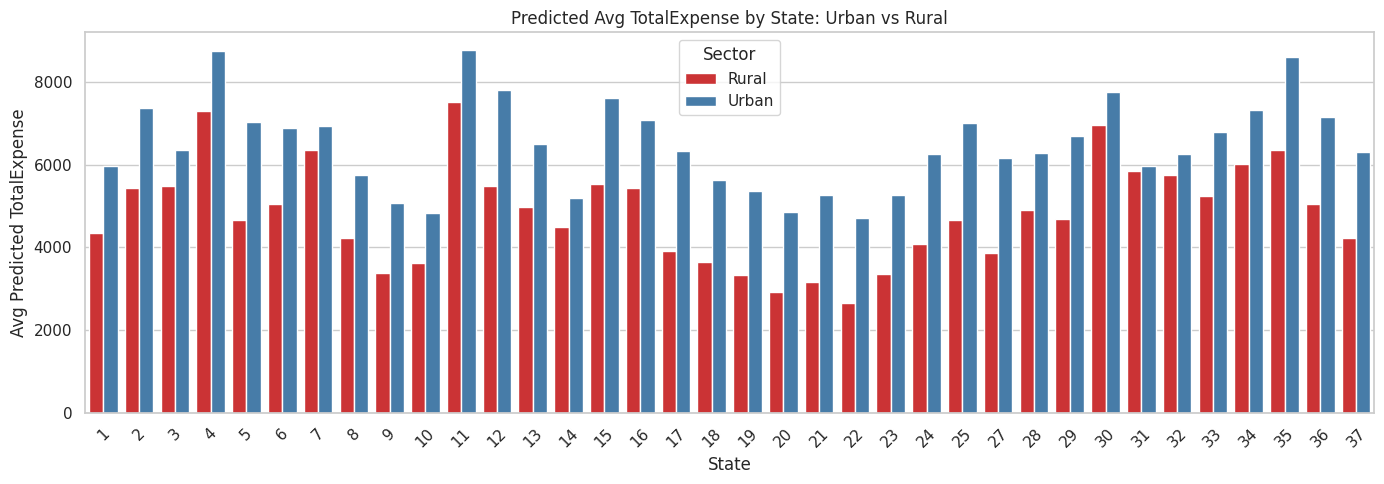

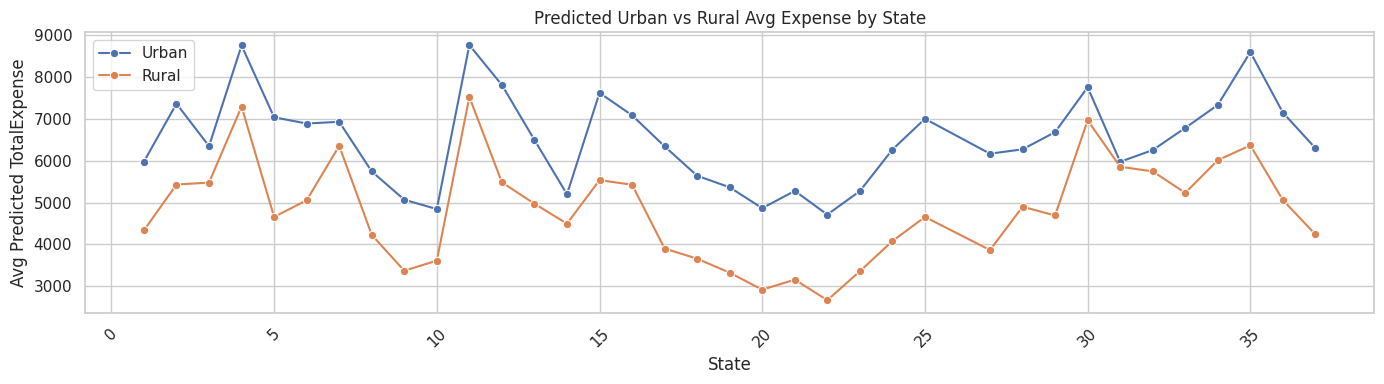

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Pivot on predicted expenses
pivot_state_pred = error_analysis_df.pivot_table(
    index="State",
    columns="Sector",
    values="Predicted_TotalExpense",
    aggfunc="mean"
).reset_index()

# Overwrite ALL column names in order: State, Urban, Rural
pivot_state_pred.columns = ["State", "Rural", "Urban"]

pivot_district_pred = error_analysis_df.pivot_table(
    index="District",
    columns="Sector",
    values="Predicted_TotalExpense",
    aggfunc="mean"
).reset_index()

pivot_district_pred.columns = ["District", "Rural", "Urban"]


# 2) Melt for bar plots
state_melt_pred = pivot_state_pred.melt(
    id_vars="State",
    value_vars=["Rural", "Urban"],
    var_name="Sector",
    value_name="AvgPredExpense"
)

district_melt_pred = pivot_district_pred.melt(
    id_vars="District",
    value_vars=["Rural", "Urban"],
    var_name="Sector",
    value_name="AvgPredExpense"
)


sns.set(style="whitegrid")

# 3) Bar chart: State (predicted)
plt.figure(figsize=(14, 5))
ax = sns.barplot(
    data=state_melt_pred, x="State", y="AvgPredExpense",
    hue="Sector", palette="Set1"
)
ax.set_title("Predicted Avg TotalExpense by State: Urban vs Rural")
ax.set_xlabel("State")
ax.set_ylabel("Avg Predicted TotalExpense")
plt.xticks(rotation=45)
plt.legend(title="Sector")
plt.tight_layout()
plt.show()

# 4) Line plot: State (predicted)
plt.figure(figsize=(14, 4))
sns.lineplot(data=pivot_state_pred, x="State", y="Urban", marker="o", label="Urban")
sns.lineplot(data=pivot_state_pred, x="State", y="Rural", marker="o", label="Rural")
plt.title("Predicted Urban vs Rural Avg Expense by State")
plt.xlabel("State")
plt.ylabel("Avg Predicted TotalExpense")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Impute missing/NaN with state-mean or global-mean if state-mean is also NaN

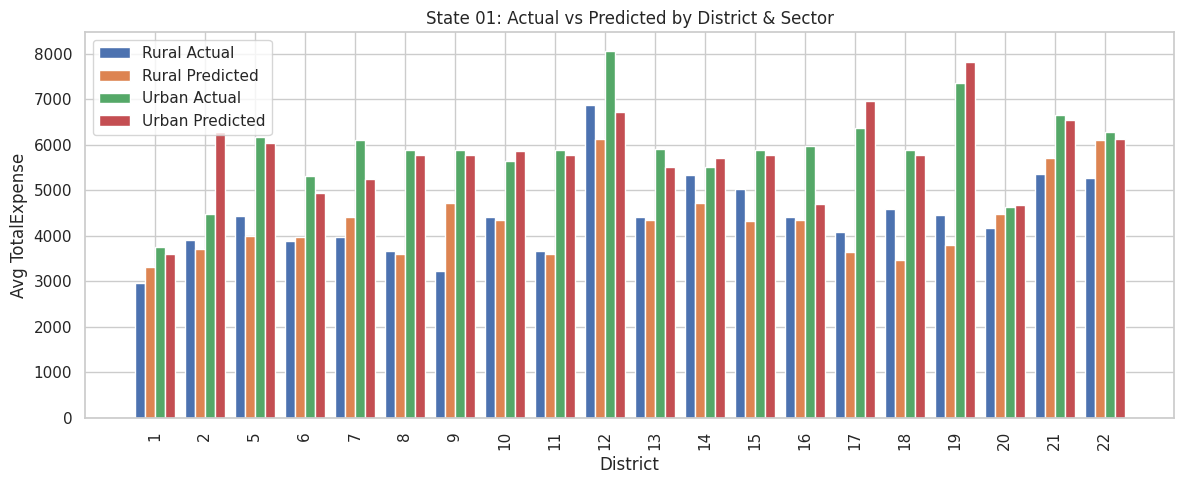

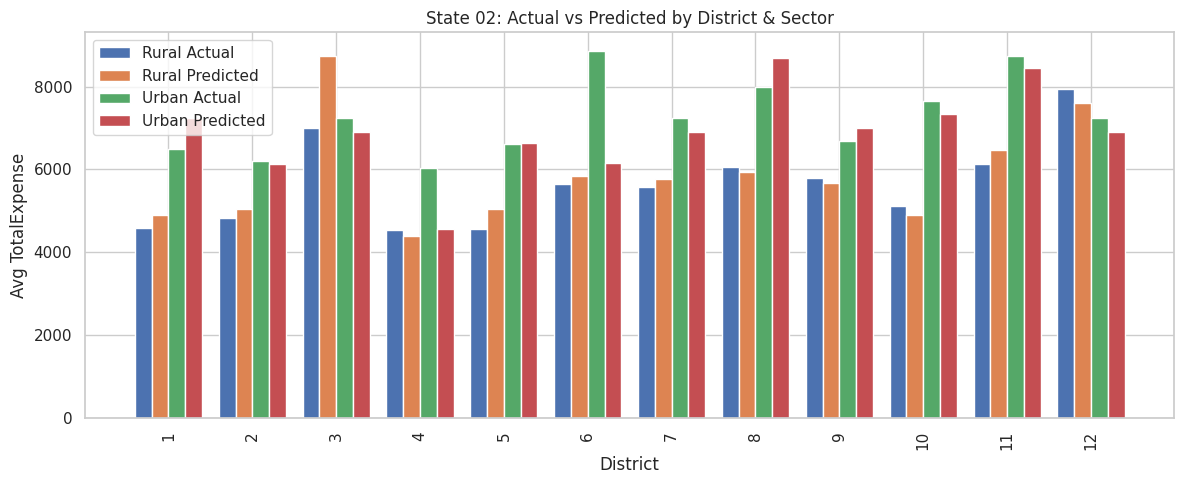

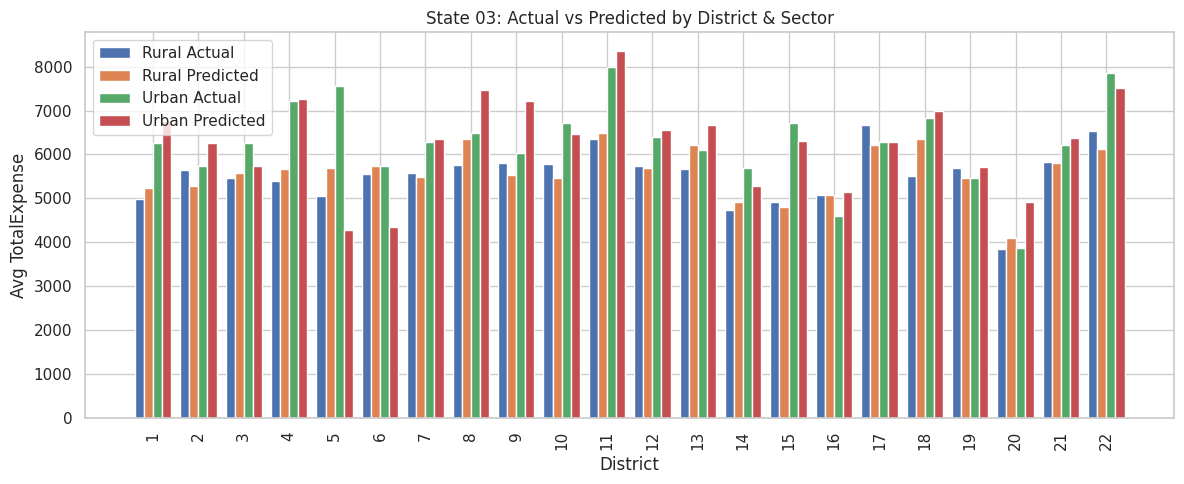

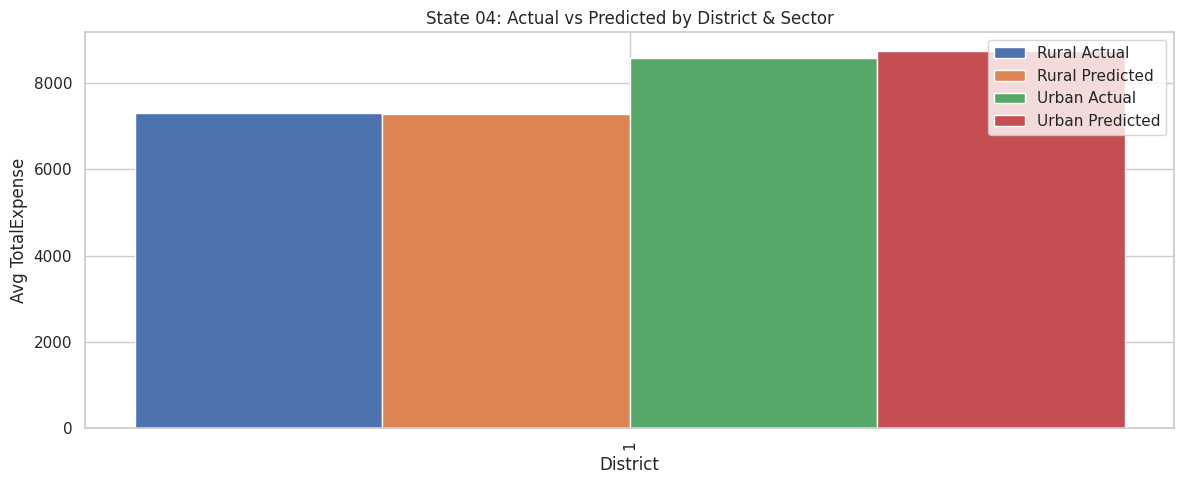

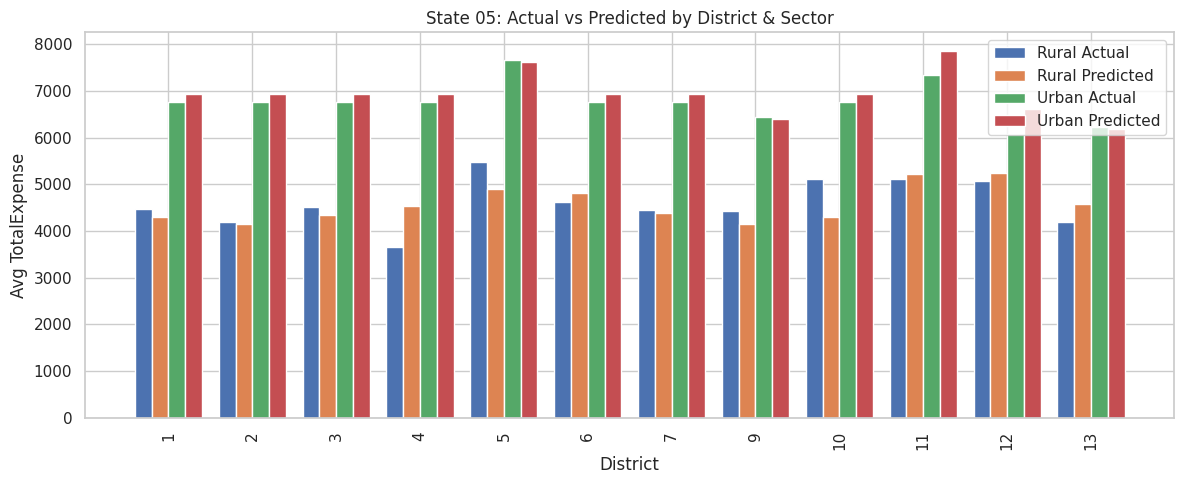

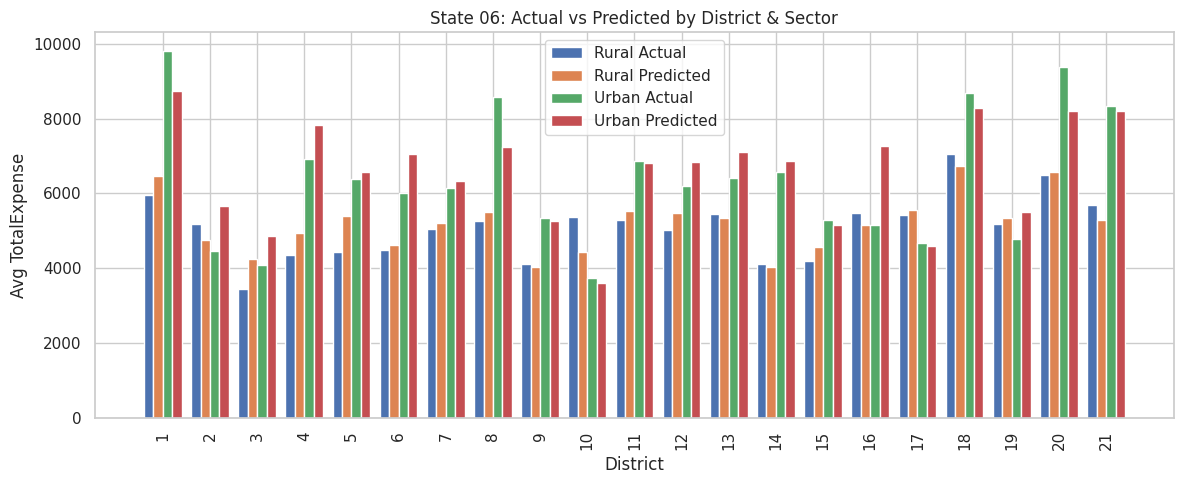

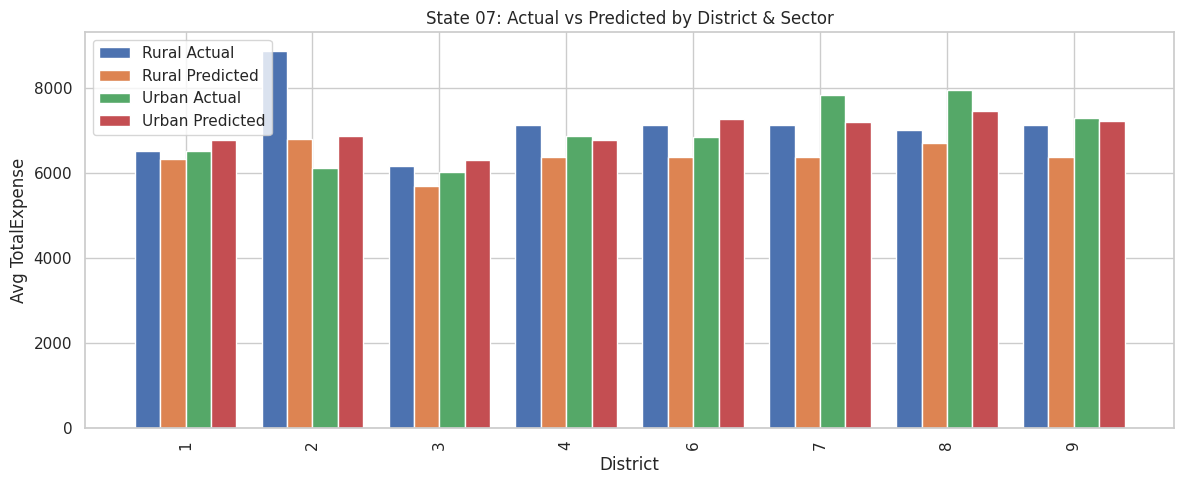

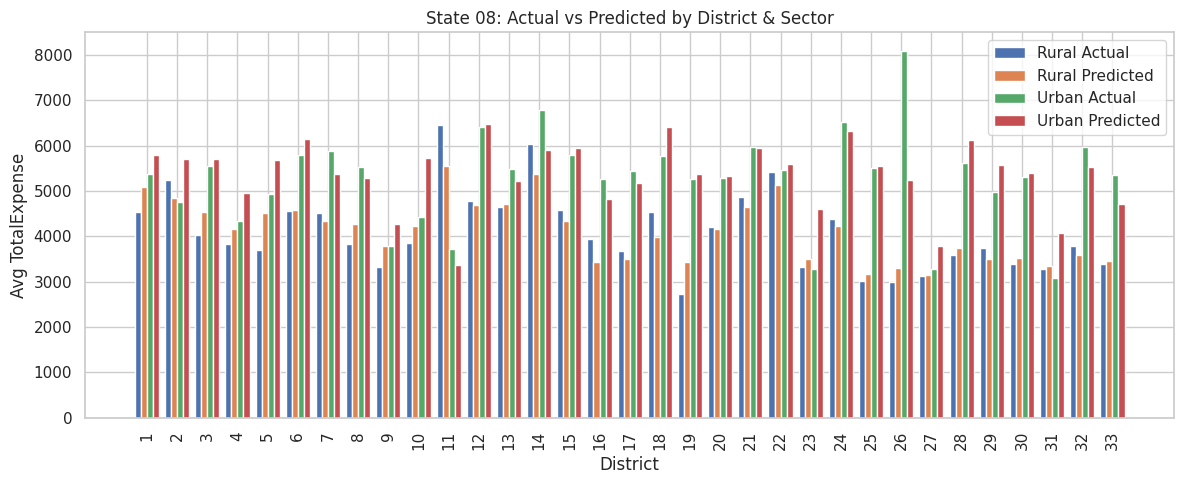

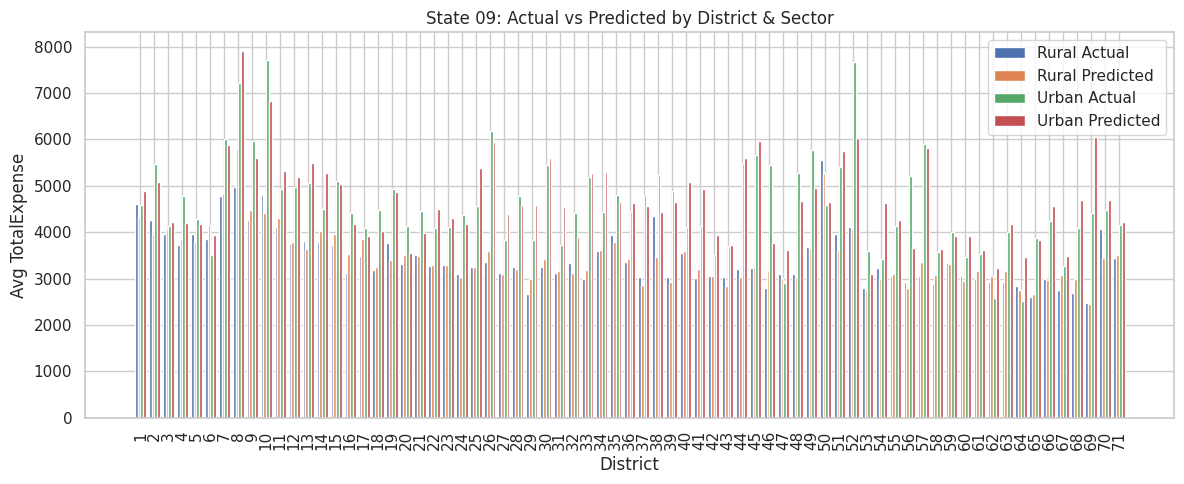

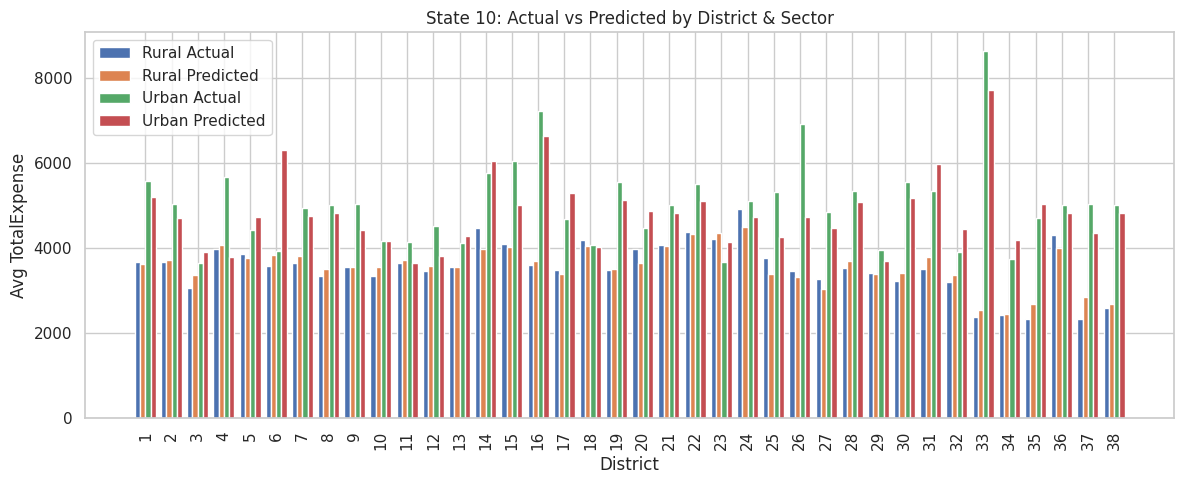

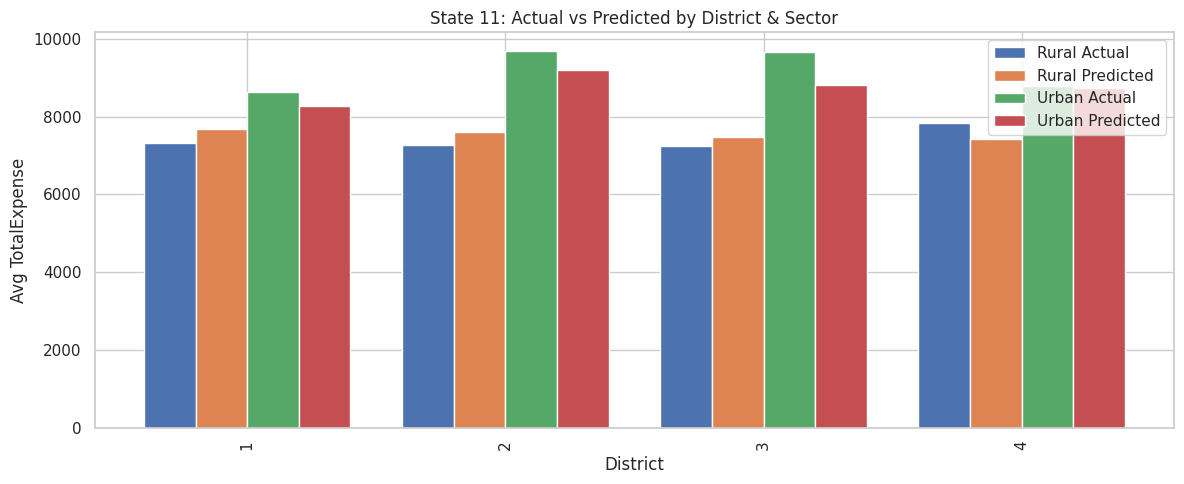

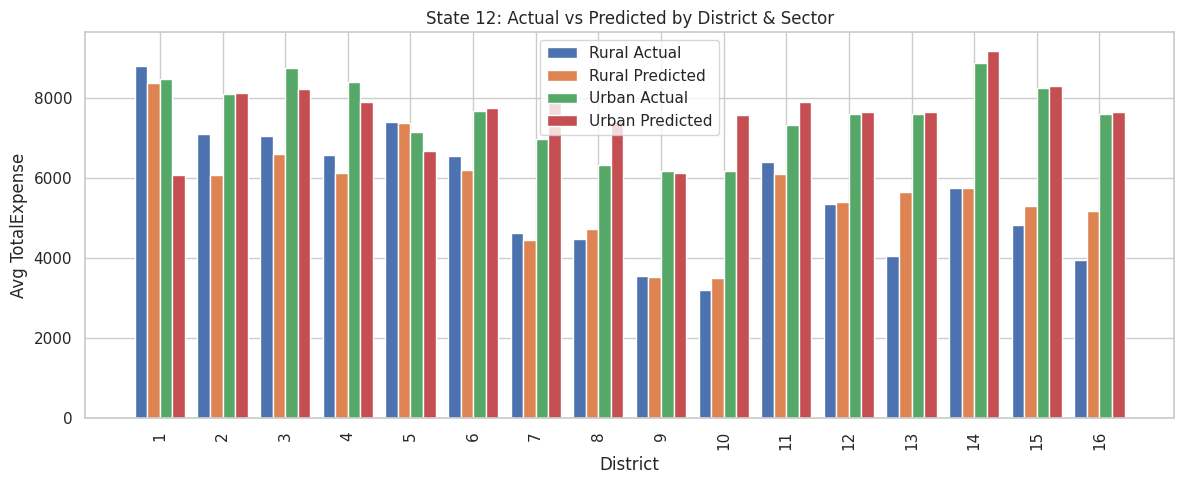

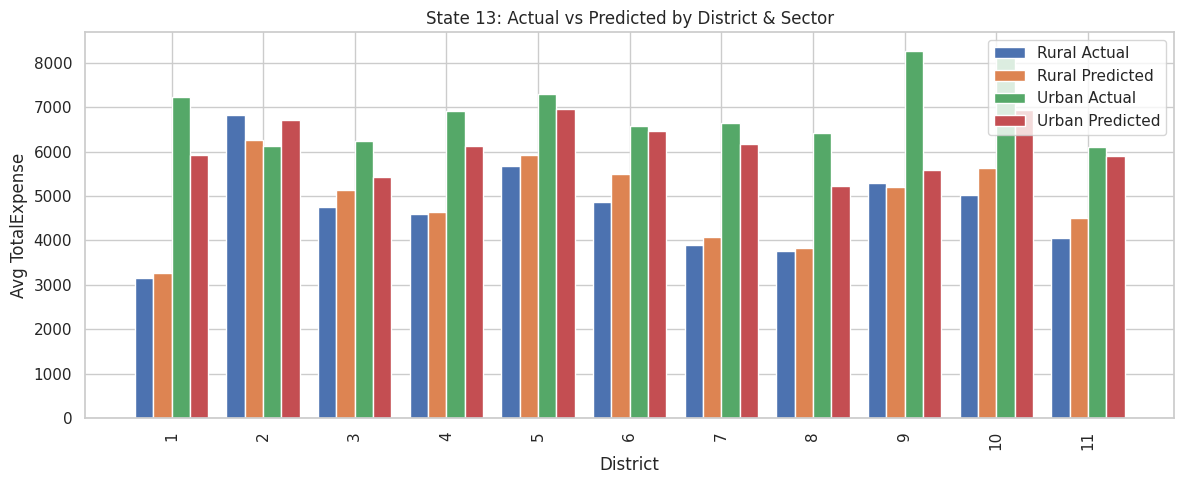

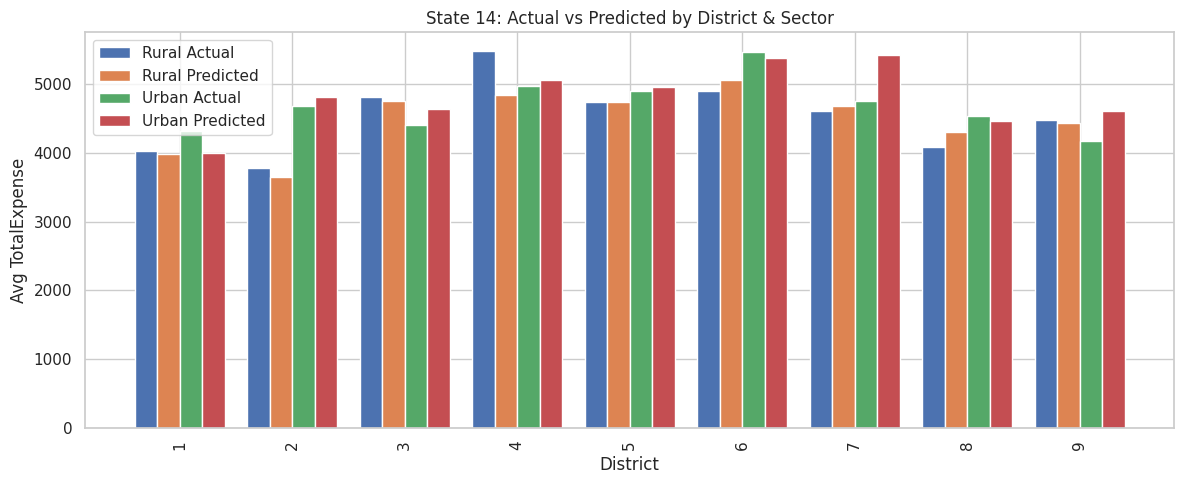

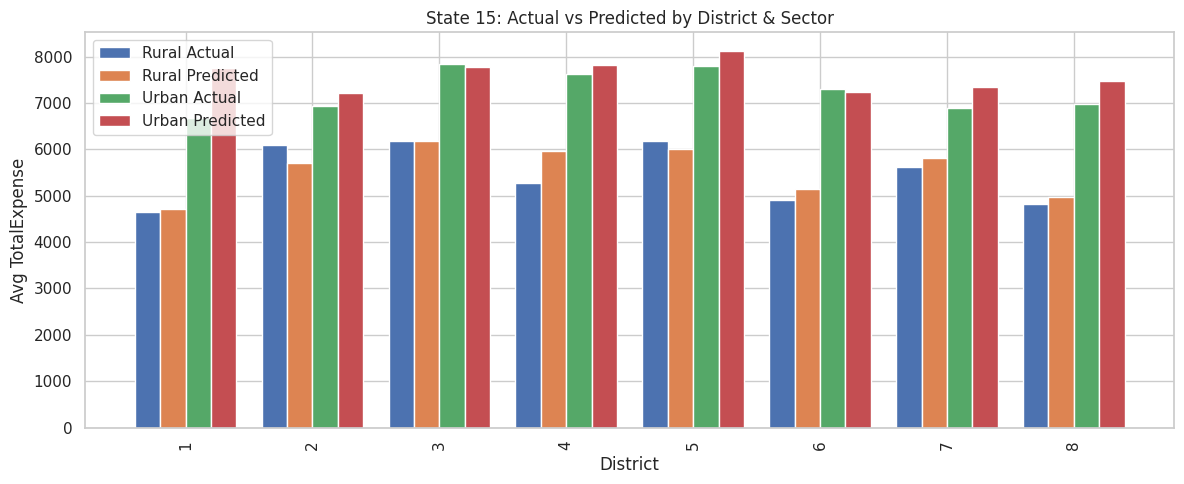

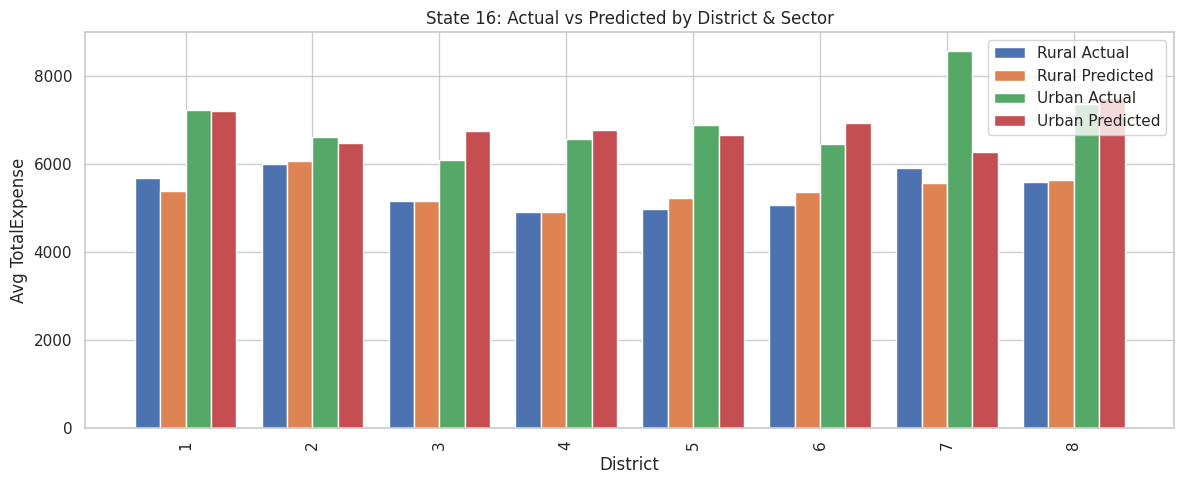

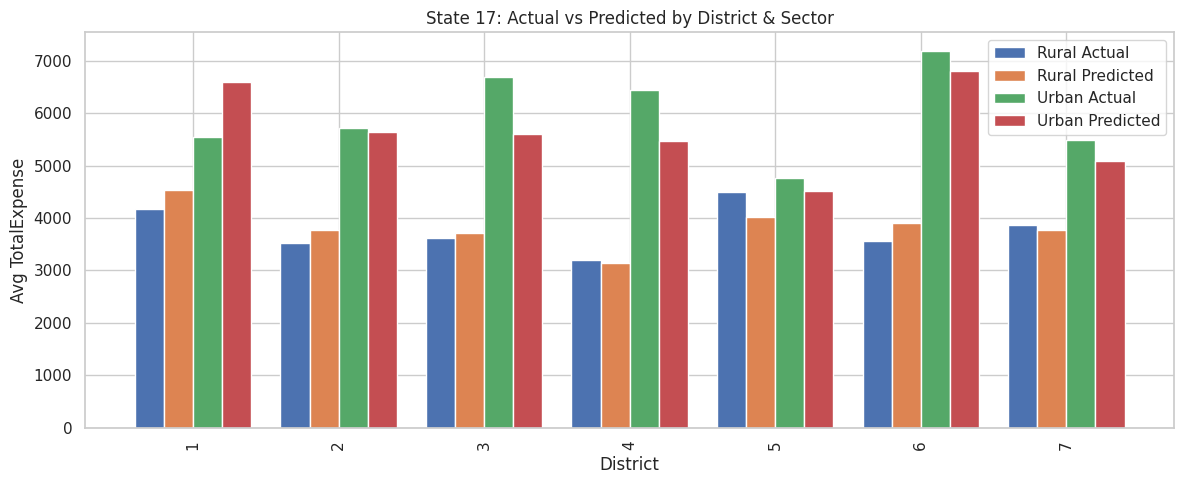

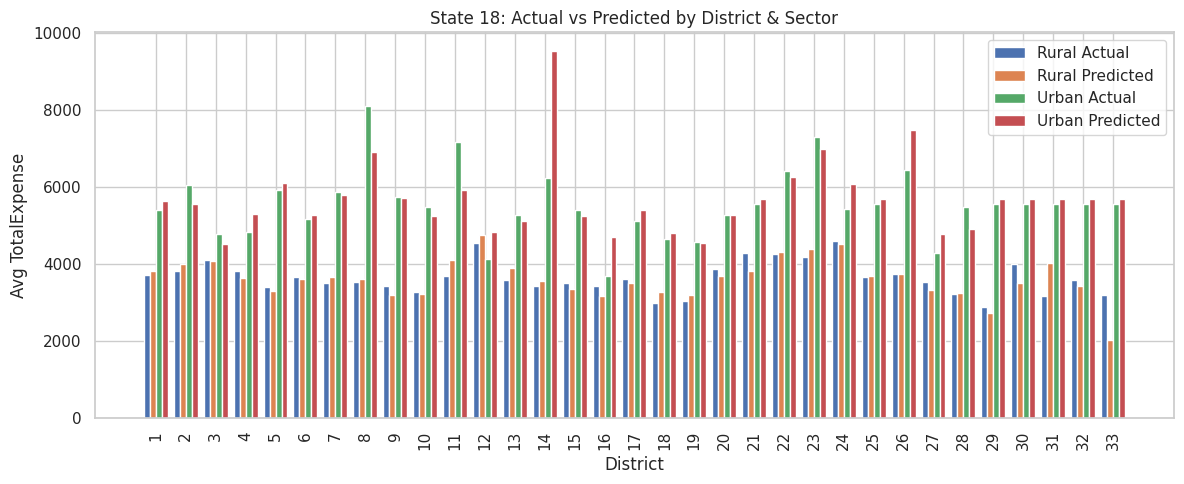

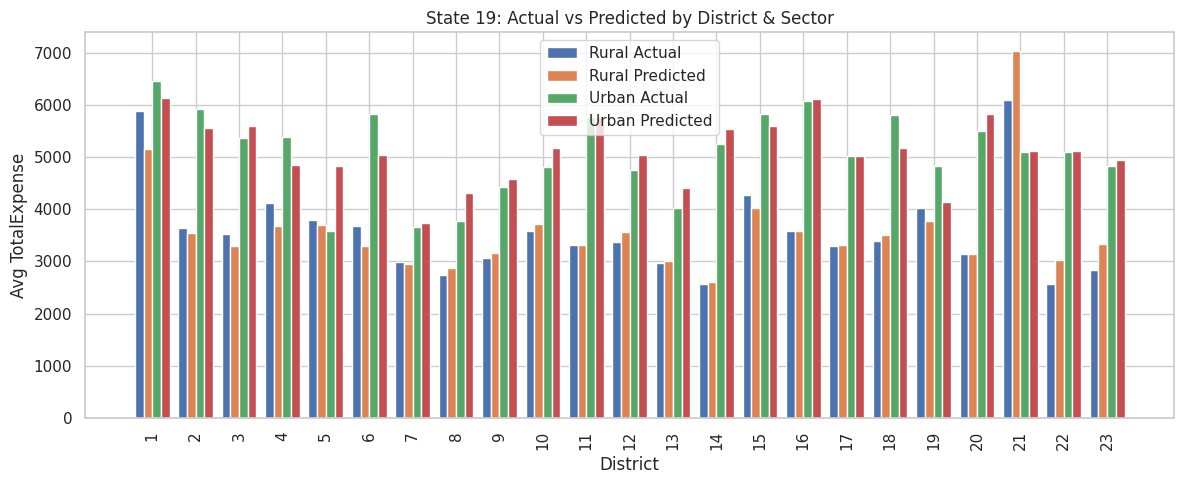

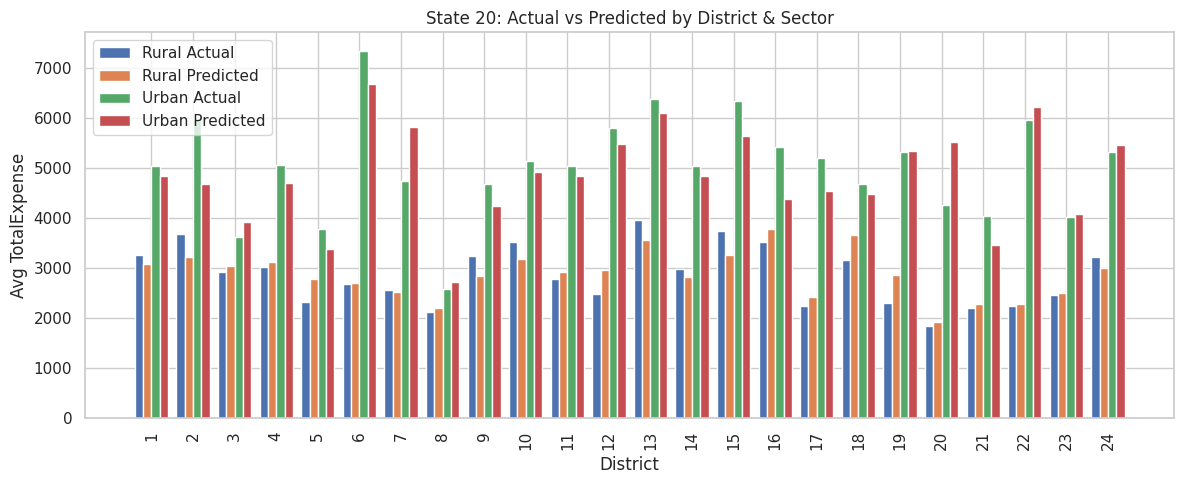

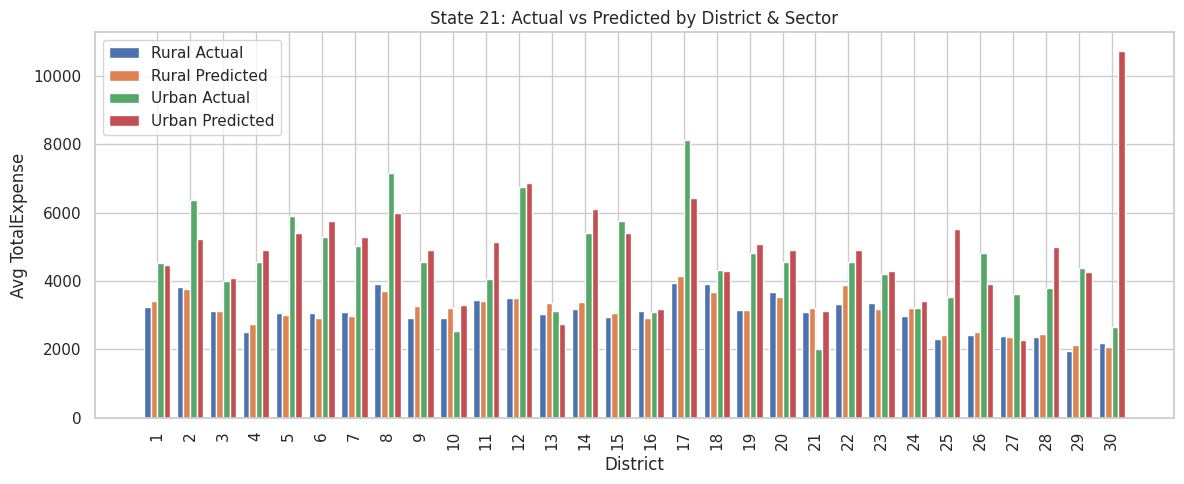

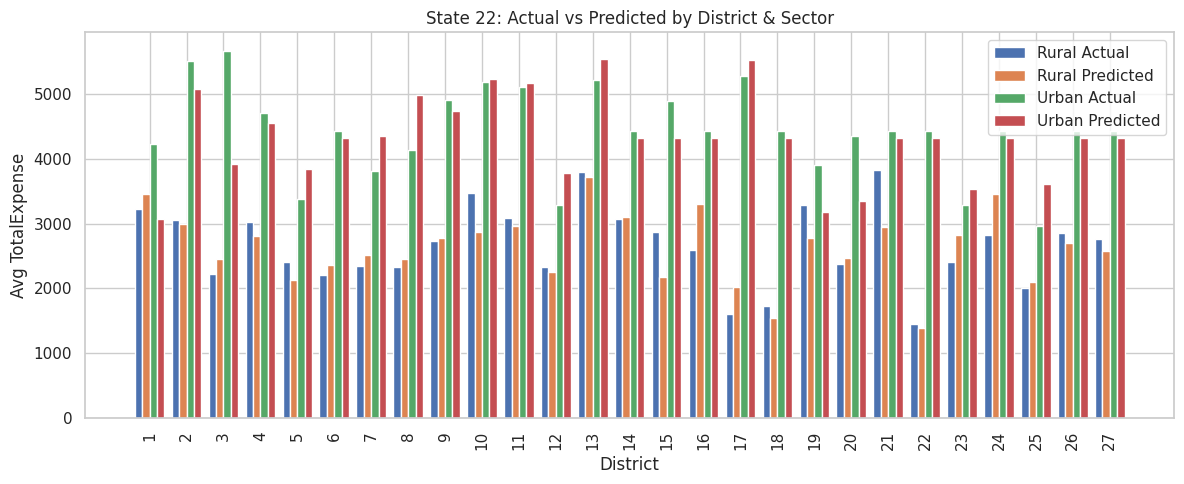

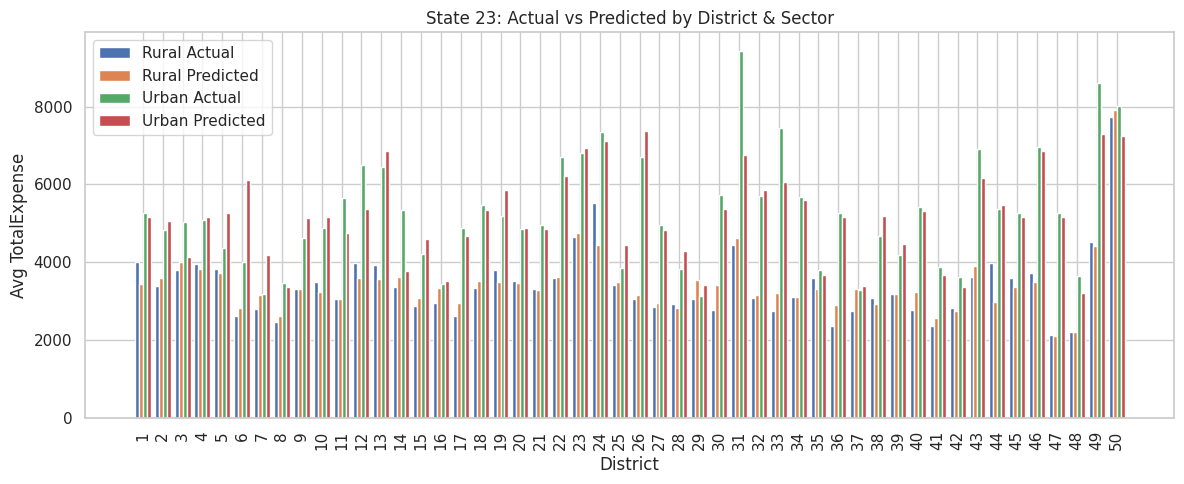

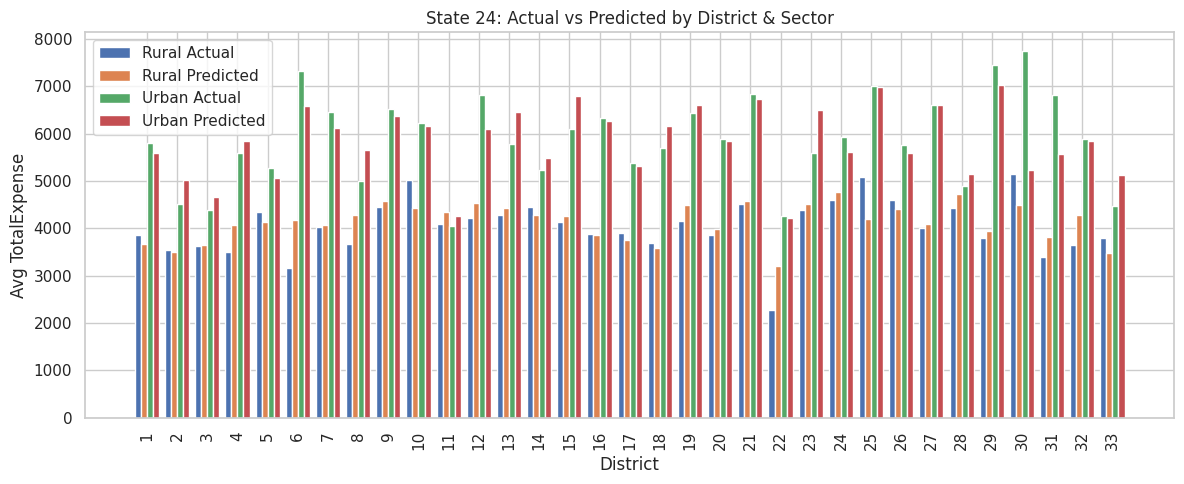

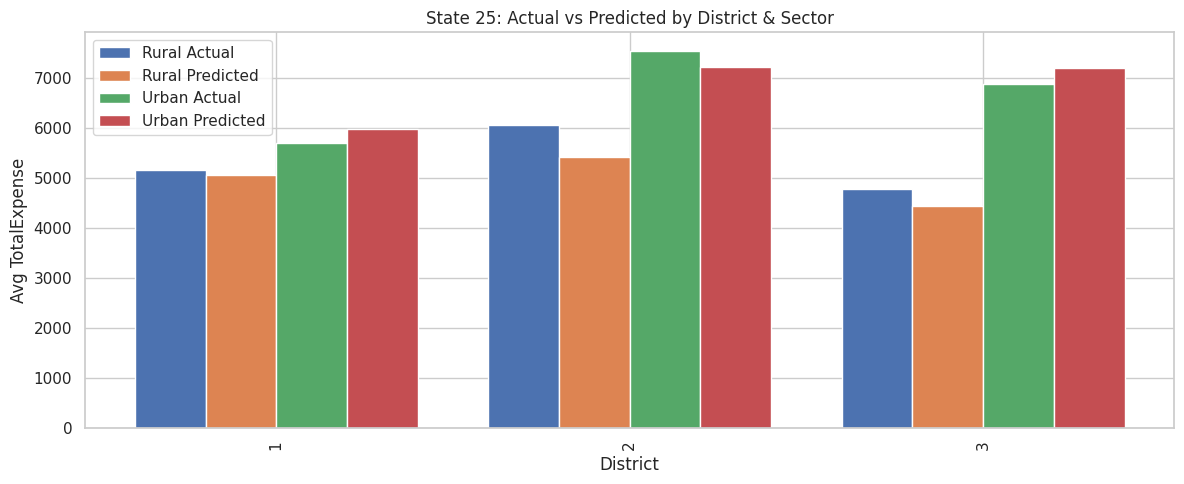

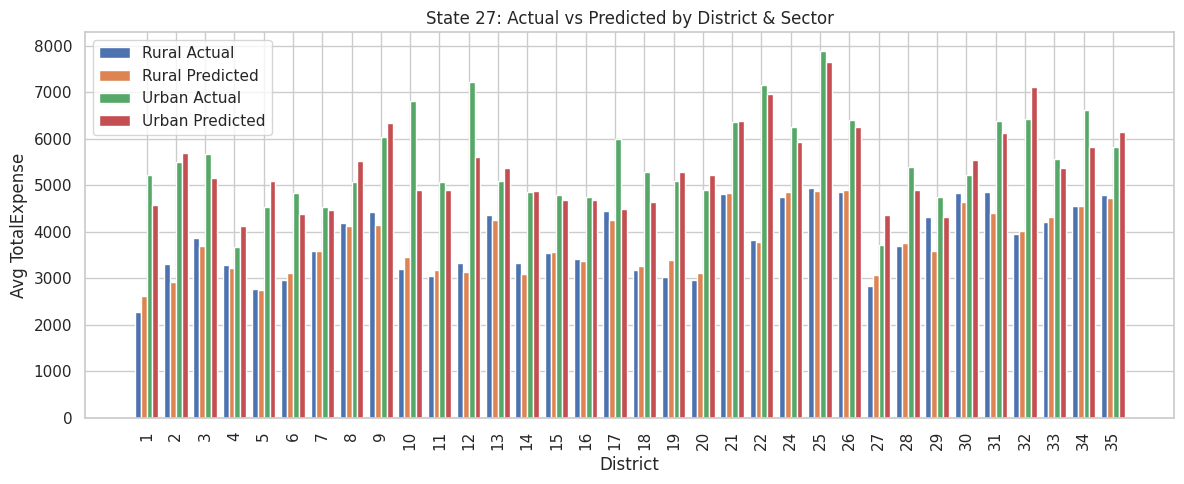

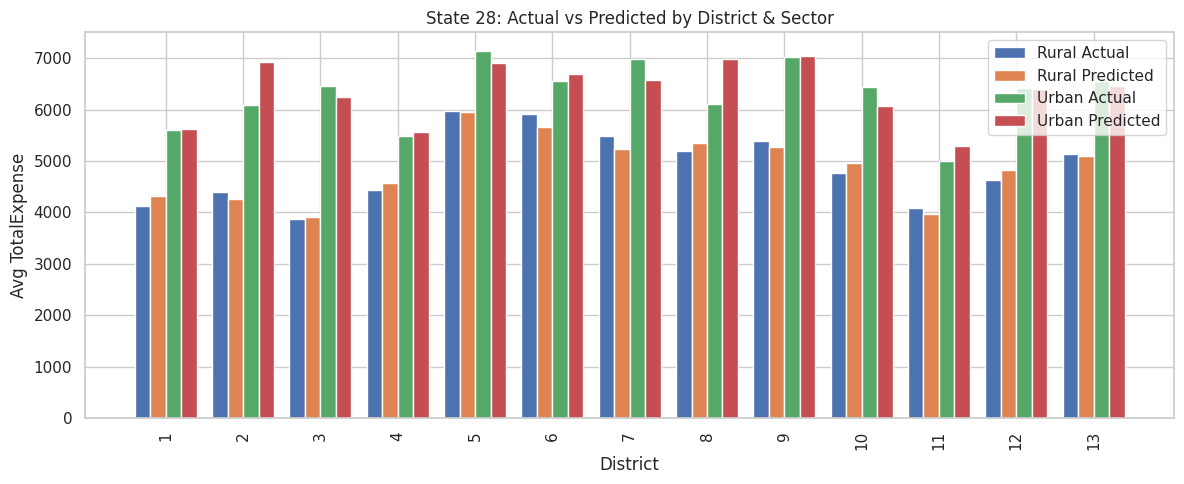

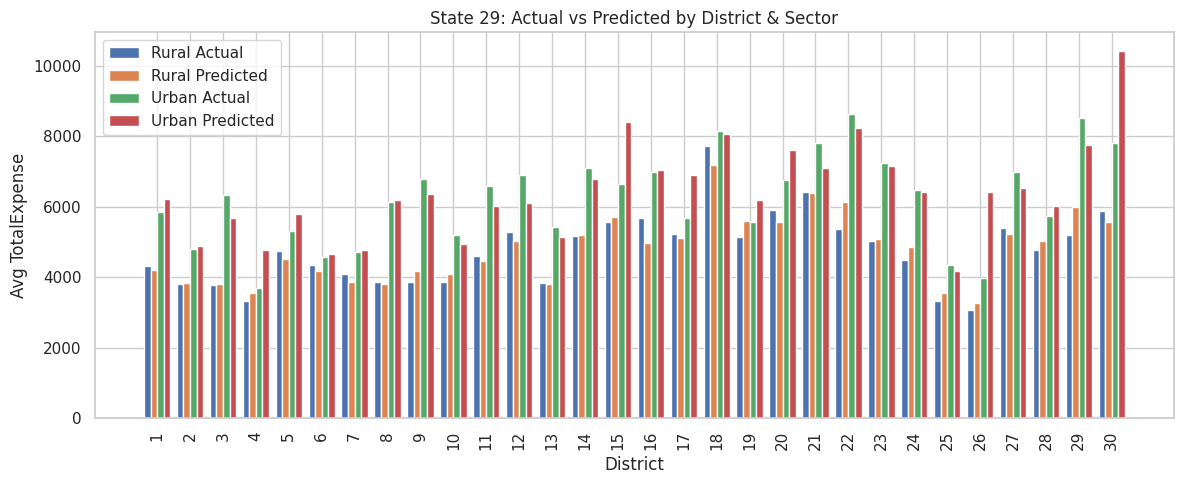

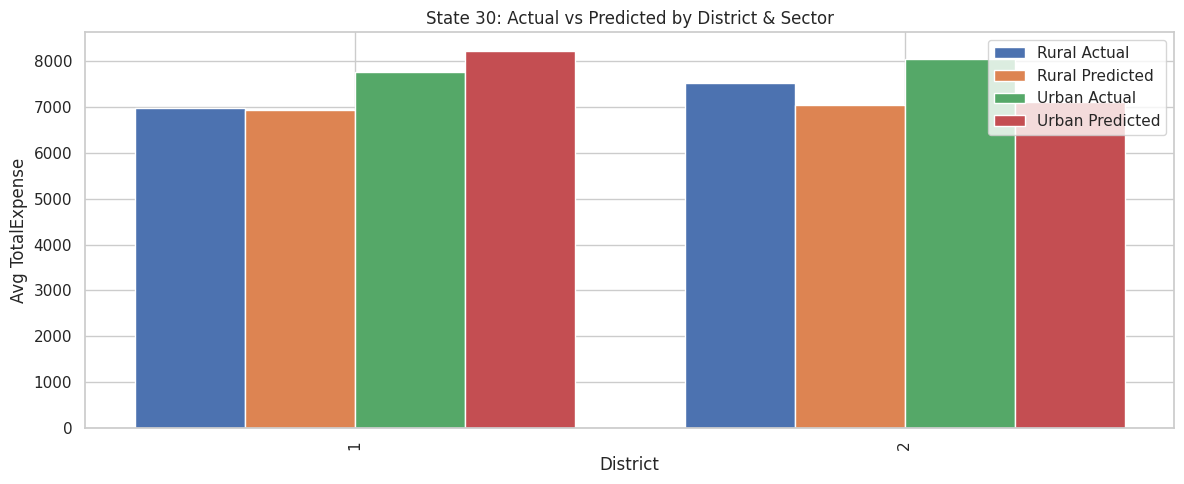

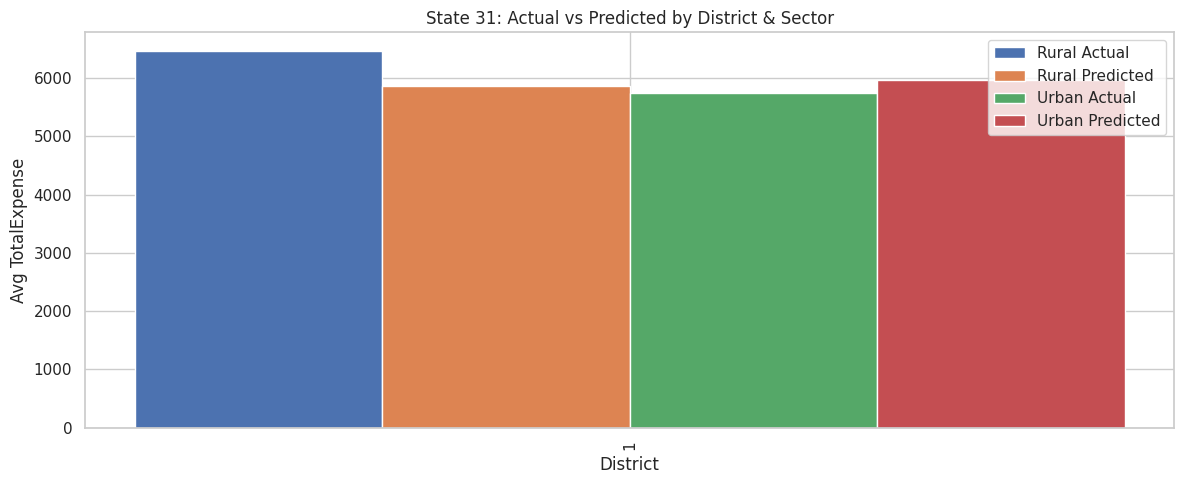

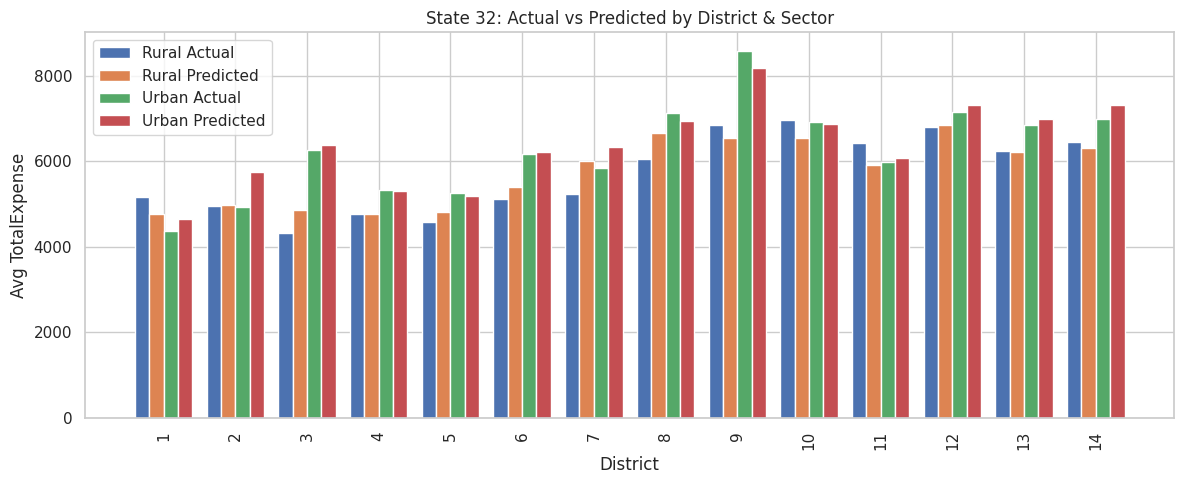

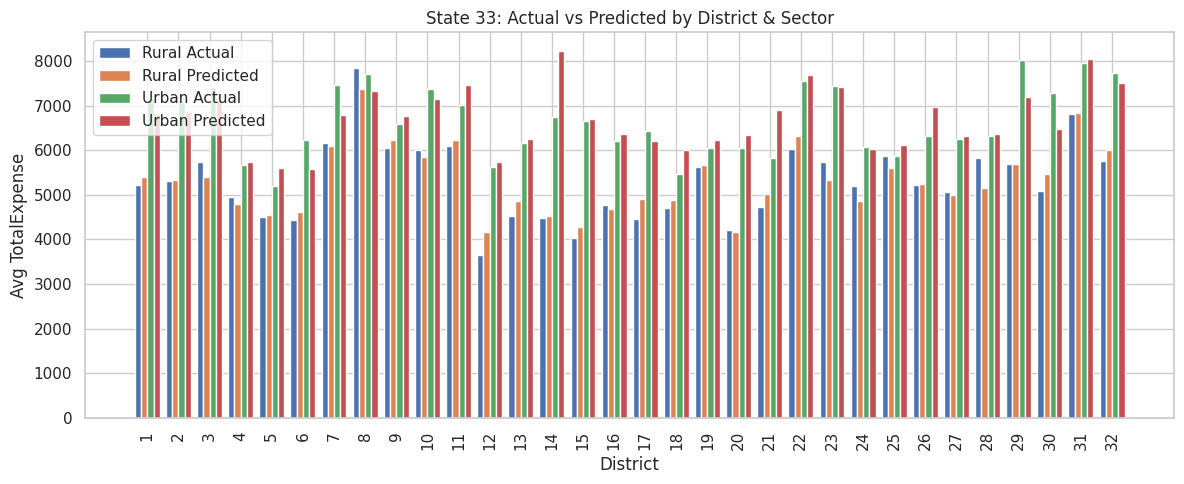

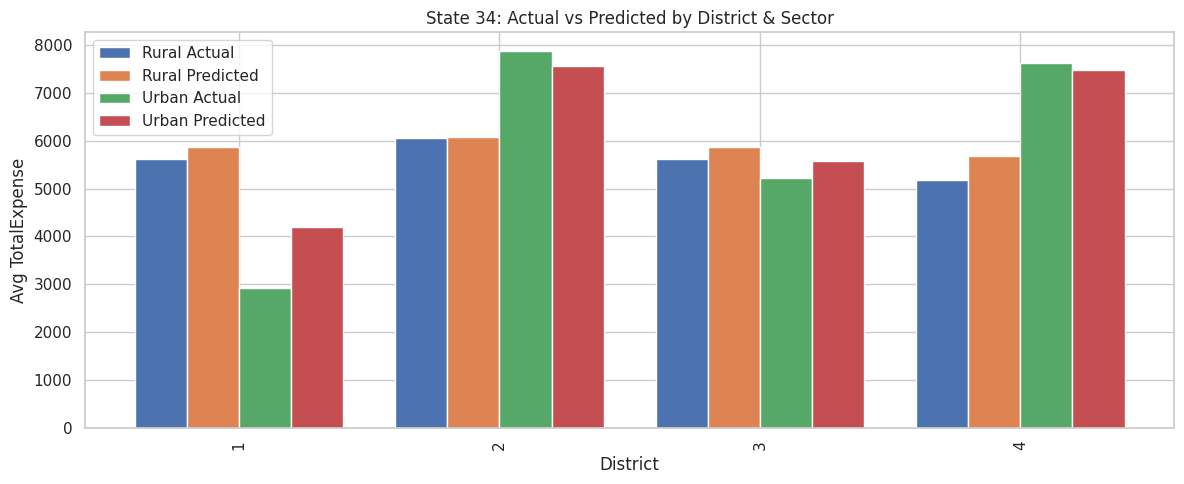

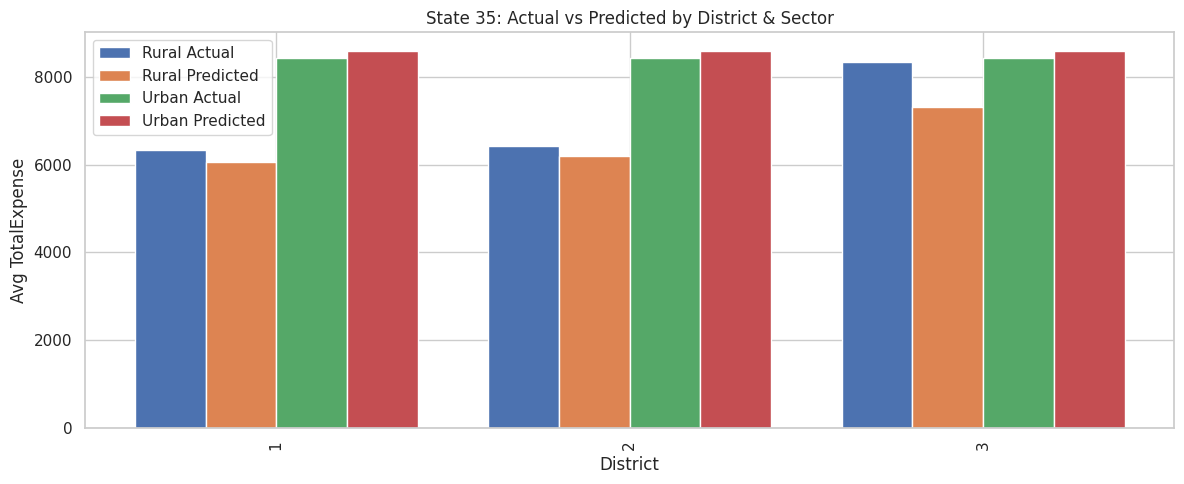

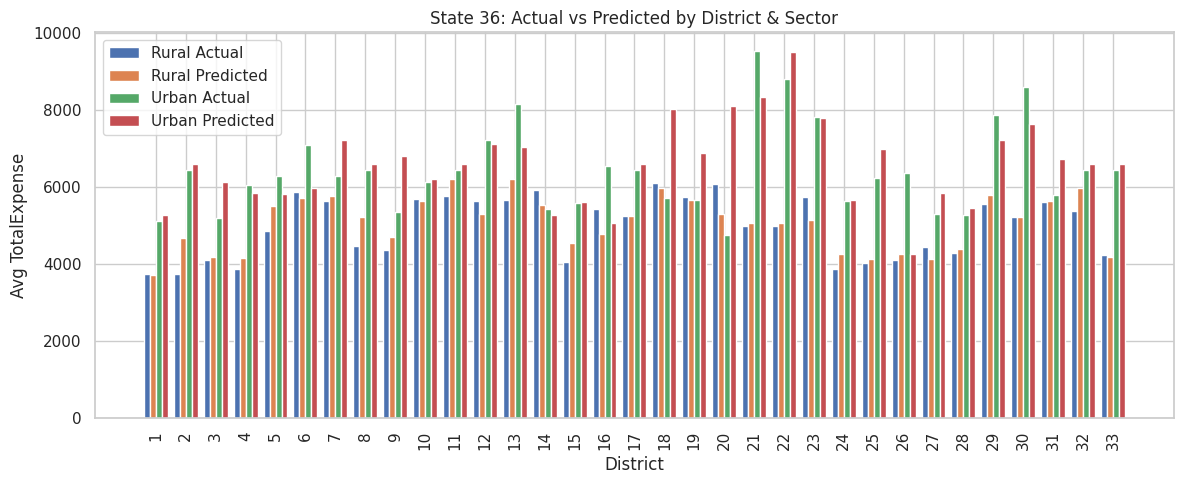

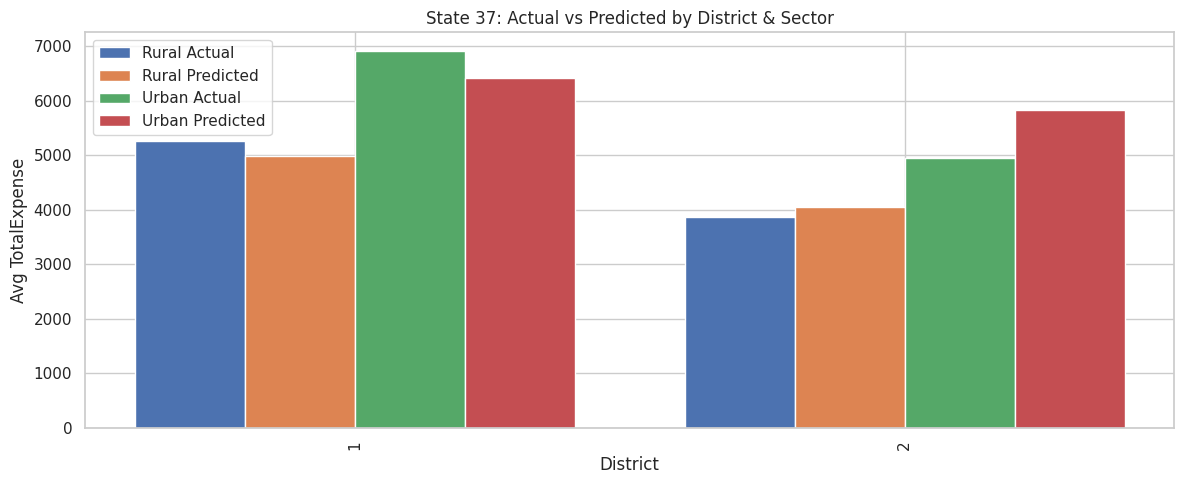

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# === Load & Filter Data ===
train_df = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_train_v3.csv')
threshold_95 = train_df['Total_Expense'].quantile(0.95)
actual_df = train_df[train_df['Total_Expense'] <= threshold_95].copy()
actual_df.rename(columns={'Total_Expense':'Actual_TotalExpense'}, inplace=True)

# error_analysis_df should already be in memory with columns:
# ['State','District','Sector','Predicted_TotalExpense']
# Filter predictions if needed:
pred_df = error_analysis_df.copy()

# Ensure correct types
for df in (actual_df, pred_df):
    df['District'] = df['District'].astype(int)
    df['State']    = df['State'].astype(str).str.zfill(2)
    df['Sector']   = df['Sector'].astype(int)

os.makedirs('state_district_cmp_plots', exist_ok=True)

# Loop states
for state in sorted(actual_df['State'].unique()):
    a = actual_df[actual_df['State']==state]
    p = pred_df[pred_df['State']==state]

    # Pivot actual
    pa = a.pivot_table(index='District', columns='Sector',
                       values='Actual_TotalExpense', aggfunc='mean') \
          .rename(columns={1:'Rural Actual',2:'Urban Actual'})

    # Pivot pred
    pp = p.pivot_table(index='District', columns='Sector',
                       values='Predicted_TotalExpense', aggfunc='mean') \
          .rename(columns={1:'Rural Predicted',2:'Urban Predicted'})

    # Merge and sort
    dfm = pa.join(pp, how='outer').sort_index()

    # Impute any missing
    for col in dfm.columns:
        dfm[col].fillna(dfm[col].mean(), inplace=True)

    districts = dfm.index.astype(str).tolist()
    x = np.arange(len(districts))
    width = 0.2

    # Plot bars
    fig, ax = plt.subplots(figsize=(12,5))
    ax.bar(x - 1.5*width, dfm['Rural Actual'], width, label='Rural Actual')
    ax.bar(x - 0.5*width, dfm['Rural Predicted'], width, label='Rural Predicted')
    ax.bar(x + 0.5*width, dfm['Urban Actual'], width, label='Urban Actual')
    ax.bar(x + 1.5*width, dfm['Urban Predicted'], width, label='Urban Predicted')

    # Labels & titles
    ax.set_xticks(x)
    ax.set_xticklabels(districts, rotation=90)
    ax.set_xlabel('District')
    ax.set_ylabel('Avg TotalExpense')
    ax.set_title(f'State {state}: Actual vs Predicted by District & Sector')
    ax.legend()

    plt.tight_layout()
    plt.savefig(f'state_district_cmp_plots/state_{state}.png')
    plt.show()


# Remark: Missing values of total expenses for state 35, district 1. Likewise other states which has missing values for districts

# Overlapping comparison Actual Vs Predicted (State-Wise):-

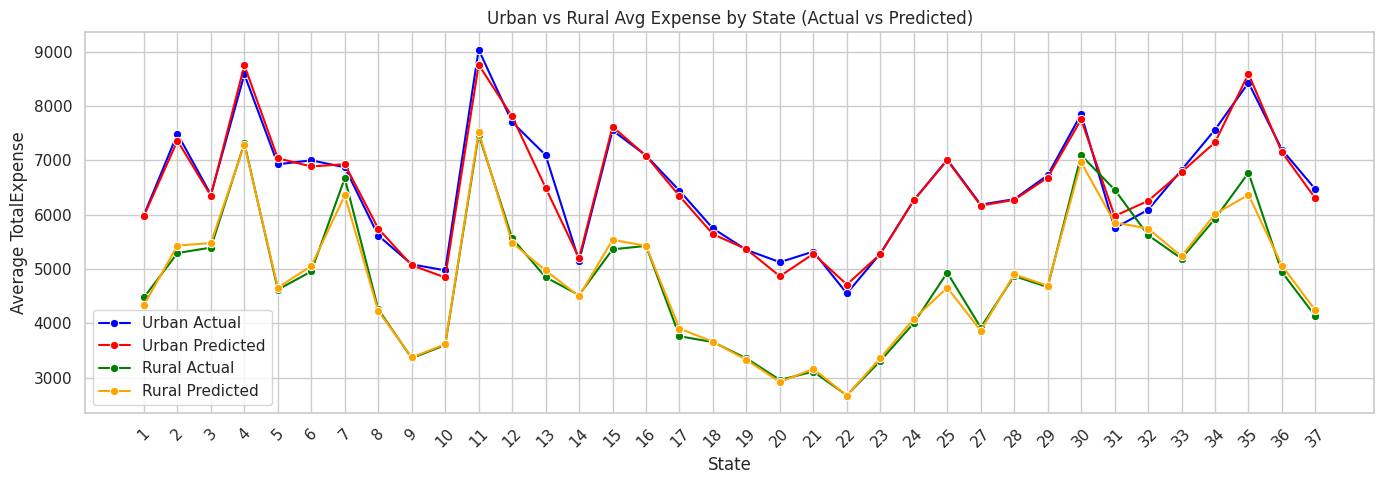

In [ ]:
# Merge actual and predicted for state-level
pivot_state['State'] = pivot_state['State'].astype(str)
pivot_state_pred['State'] = pivot_state_pred['State'].astype(str)

merged_state = pivot_state.merge(pivot_state_pred, on="State", suffixes=("_Actual", "_Pred"))

plt.figure(figsize=(14, 5))

# Urban Comparison - Using Blue for Actual, Red for Predicted
sns.lineplot(data=merged_state, x="State", y="Urban_Actual", marker="o", label="Urban Actual", color="blue")
sns.lineplot(data=merged_state, x="State", y="Urban_Pred", marker="o", label="Urban Predicted", color="red")

# Rural Comparison - Using Green for Actual, Orange for Predicted
sns.lineplot(data=merged_state, x="State", y="Rural_Actual", marker="o", label="Rural Actual", color="green")
sns.lineplot(data=merged_state, x="State", y="Rural_Pred", marker="o", label="Rural Predicted", color="orange")

plt.title("Urban vs Rural Avg Expense by State (Actual vs Predicted)")
plt.xlabel("State")
plt.ylabel("Average TotalExpense")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

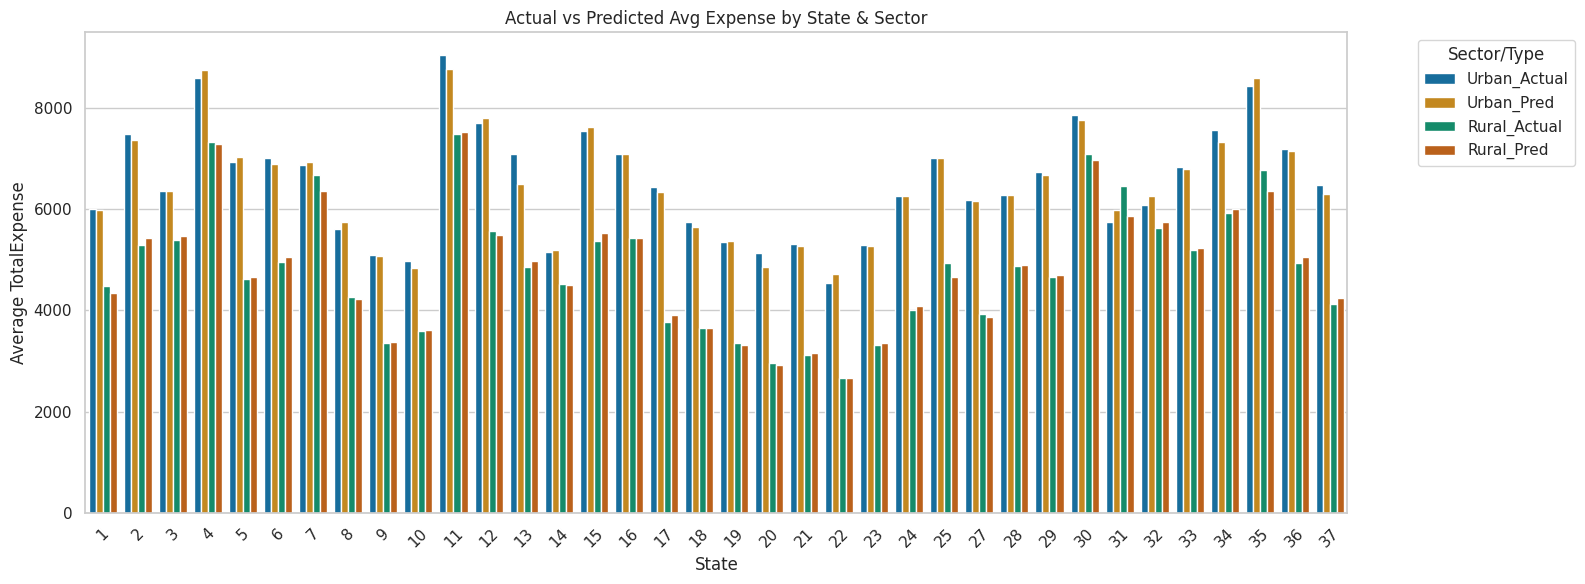

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reshape the data for plotting
# Melt Urban Actual/Pred and Rural Actual/Pred separately, then concatenate
urban_melt = merged_state[['State', 'Urban_Actual', 'Urban_Pred']].melt(
    id_vars='State', var_name='Type', value_name='AvgExpense'
)
urban_melt['Sector'] = 'Urban'
urban_melt['Type'] = urban_melt['Type'].str.replace('_Urban', '', regex=False) # Clean up Type names

rural_melt = merged_state[['State', 'Rural_Actual', 'Rural_Pred']].melt(
    id_vars='State', var_name='Type', value_name='AvgExpense'
)
rural_melt['Sector'] = 'Rural'
rural_melt['Type'] = rural_melt['Type'].str.replace('_Rural', '', regex=False) # Clean up Type names

# Combine Urban and Rural melted data
combined_melted_state = pd.concat([urban_melt, rural_melt])

# Combine Sector and Type for hue for side-by-side bars
combined_melted_state['Sector_Type'] = combined_melted_state['Type']


# === Plotting ===
plt.figure(figsize=(16, 6)) # Adjust figure size as needed

# Use the combined 'Sector_Type' column for hue
ax = sns.barplot(
    data=combined_melted_state,
    x="State",
    y="AvgExpense",
    hue="Sector_Type", # This creates bars for each combination of Sector and Type
    palette="colorblind" # Or any other suitable palette
)

ax.set_title("Actual vs Predicted Avg Expense by State & Sector")
ax.set_xlabel("State")
ax.set_ylabel("Average TotalExpense")
plt.xticks(rotation=45)
plt.legend(title="Sector/Type", bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.tight_layout()
plt.show()


## Comparison between Train/Test Average Total Expenses:

* Recomputes the train‐set averages (train_sector / train_district)

* Has your test‐set predictions (state_sector_pred / district_sector_pred)

* Merges them into side‐by‐side comparison tables

* Plots a grouped bar chart to visualize train vs. test for Urban and Rural

['State', 'Actual_TotalExpense_Rural', 'Predicted_TotalExpense_Rural', 'Actual_TotalExpense_Urban', 'Predicted_TotalExpense_Urban']
['District', 'Actual_TotalExpense_Rural', 'Predicted_TotalExpense_Rural', 'Actual_TotalExpense_Urban', 'Predicted_TotalExpense_Urban']


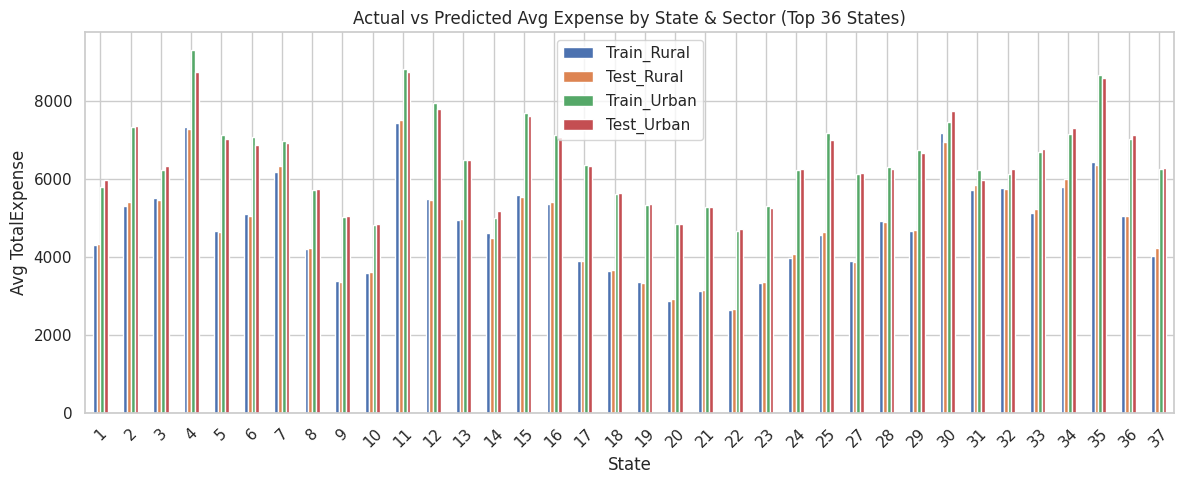

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 4) Display to confirm columns
print(state_sector_comparison.columns.tolist())
print(district_sector_comparison.columns.tolist())

# 5) Plot top states
sns.set(style="whitegrid")
# Select top states based on Actual Urban expense
sample_states = state_sector_comparison.nlargest(36, "Actual_TotalExpense_Urban")["State"]

# Filter and set index for plotting
state_plot_data = state_sector_comparison[state_sector_comparison["State"].isin(sample_states)].set_index("State").copy() # Use .copy() to avoid SettingWithCopyWarning

# Define new legend labels
new_labels = {
    'Actual_TotalExpense_Rural': 'Train_Rural',
    'Predicted_TotalExpense_Rural': 'Test_Rural',
    'Actual_TotalExpense_Urban': 'Train_Urban',
    'Predicted_TotalExpense_Urban': 'Test_Urban'
}

# Rename columns for plotting
state_plot_data.rename(columns=new_labels, inplace=True)

# Plot using the renamed columns
state_plot_data[['Train_Rural', 'Test_Rural', 'Train_Urban', 'Test_Urban']].plot(
    kind="bar", figsize=(12,5)
)
plt.title("Actual vs Predicted Avg Expense by State & Sector (Top 36 States)")
plt.ylabel("Avg TotalExpense")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Final XGB - Regression Model Training Pipeline
- Outlier removal based on the >95th percentile of the 'Total_Expense' column.
- Training Top 5% Outlier removal

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from category_encoders import TargetEncoder
from xgboost import XGBRegressor
import warnings

warnings.filterwarnings("ignore")

# === Load Data ===
train_df = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_train_v3.csv')
test_df  = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_test_v3.csv')

upper = train_df['Total_Expense'].quantile(0.95)
for df in [train_df, test_df]:
    df.drop(df[(df['Total_Expense'] < upper)].index, inplace=True)

train_df = train_df[train_df.head_gender != 3].drop(columns=['HH_ID'])
test_df  = test_df[test_df.head_gender != 3].drop(columns=['HH_ID'])

train_weights = train_df.household_size
test_weights  = test_df.household_size

# === Column Lists ===
binary_cols = ['Sector','mobile','head_gender','internet_use']
high_card_cols = ['State','NSS_region','District','household_type','head_religion','head_social','profession','industry','head_education']
int_cols = ['household_size','head_age','head_education_years','Is_couple']
float_cols = [c for c in train_df.columns if c not in binary_cols + high_card_cols + int_cols + ['Total_Expense']]

# === Binary Encoding ===
for col in binary_cols:
    uniques = pd.concat([train_df[col], test_df[col]]).dropna().unique()
    mapping = {uniques[0]:0, uniques[1]:1}
    train_df[col] = train_df[col].map(mapping).astype(int)
    test_df[col]  = test_df[col].map(mapping).astype(int)

# === Target Encoding ===
te = TargetEncoder(cols=high_card_cols)
y_train = train_df.pop('Total_Expense')
train_df = te.fit_transform(train_df, y_train)
y_test = test_df.pop('Total_Expense')
test_df = te.transform(test_df)

# === Scaling ===
scaler = StandardScaler()
train_df[int_cols + float_cols] = scaler.fit_transform(train_df[int_cols + float_cols])
test_df[int_cols + float_cols]  = scaler.transform(test_df[int_cols + float_cols])

X_train, X_test = train_df, test_df

# === Grid Search ===
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
param_grid = {
    'n_estimators': [50, 100, 250, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.85, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.85]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5, # 5-fold Cross Validation
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, y_train)

print("✅ Best XGB Params:", grid.best_params_)
model = grid.best_estimator_

# Retrain on full training set
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

# === Evaluation Function ===
def eval_metrics(y_true, y_pred, weights=None):
    if weights is not None:
        y_true, y_pred = y_true * weights, y_pred * weights
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, np.nan, y_true))) * 100
    r2 = r2_score(y_true, y_pred)
    return mae, mape, rmse, mse, r2

metrics_names = ['MAE','MAPE','RMSE','MSE','R2']

print("\n=== Unweighted Metrics ===")
for label, y_t, y_p in [('Train', y_train, y_pred_train), ('Test', y_test, y_pred_test)]:
    vals = eval_metrics(y_t, y_p)
    print(f"{label}: " + ", ".join(f"{n}={v:.4f}" for n, v in zip(metrics_names, vals)))

print("\n=== Weighted Metrics ===")
for label, y_t, y_p, w in [
    ('Train Weighted', y_train, y_pred_train, train_weights),
    ('Test Weighted',  y_test,  y_pred_test,  test_weights)
]:
    vals = eval_metrics(y_t, y_p, w)
    print(f"{label}: " + ", ".join(f"{n}={v:.4f}" for n, v in zip(metrics_names, vals)))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
✅ Best XGB Params: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}

=== Unweighted Metrics ===
Train: MAE=4577.4831, MAPE=21.7988, RMSE=7772.6244, MSE=60413689.7613, R2=0.3683
Test: MAE=4779.1203, MAPE=22.4898, RMSE=8180.0686, MSE=66913521.7936, R2=0.1488

=== Weighted Metrics ===
Train Weighted: MAE=9799.6516, MAPE=21.7988, RMSE=18926.8572, MSE=358225922.0112, R2=0.6617
Test Weighted: MAE=10403.6411, MAPE=22.4898, RMSE=20659.9468, MSE=426833401.0541, R2=0.5385


In [ ]:
import joblib

# Save the trained model to disk
joblib.dump(model, '/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/model/xgb_regressor_model_above95.pkl')

['/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/model/xgb_regressor_model_above95.pkl']

In [ ]:
import joblib
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

# === Load original test data to retain HH_ID ===
full_test_df = pd.read_csv('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_test_v3.csv')

# === Apply filters (same as during model training) ===
upper = full_test_df['Total_Expense'].quantile(0.95)
filtered_test_df = full_test_df[
    (full_test_df['Total_Expense'] >= upper) &
    (full_test_df['head_gender'] != 3)
].copy()

# Save HH_IDs before dropping
hh_ids = filtered_test_df['HH_ID'].reset_index(drop=True)

# Drop HH_ID from features
filtered_test_df = filtered_test_df.drop(columns=['HH_ID'])

# === Prepare Features ===
binary_cols = ['Sector','mobile','head_gender','internet_use']
high_card_cols = ['State','NSS_region','District','household_type','head_religion',
                  'head_social','profession','industry','head_education']
int_cols = ['household_size','head_age','head_education_years','Is_couple']
float_cols = [c for c in filtered_test_df.columns if c not in binary_cols + high_card_cols + int_cols + ['Total_Expense']]

# Binary Encoding
for col in binary_cols:
    uniques = filtered_test_df[col].dropna().unique()
    mapping = {uniques[0]: 0, uniques[1]: 1}
    filtered_test_df[col] = filtered_test_df[col].map(mapping).astype(int)

# Target Encoding
te = TargetEncoder(cols=high_card_cols)
y_test = filtered_test_df.pop('Total_Expense')
filtered_test_df = te.fit_transform(filtered_test_df, y_test)

# Scaling
scaler = StandardScaler()
filtered_test_df[int_cols + float_cols] = scaler.fit_transform(filtered_test_df[int_cols + float_cols])

X_test = filtered_test_df

# === Load model ===
model = joblib.load('/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/model/xgb_regressor_model_above95.pkl')

# === Predict
y_pred_test = model.predict(X_test)

# === Align lengths (in case of mismatch)
min_len = min(len(hh_ids), len(y_pred_test))
hh_ids = hh_ids[:min_len]
y_pred_test = y_pred_test[:min_len]

# === Save with HH_ID
output_df = pd.DataFrame({
    'HH_ID': hh_ids,
    'Predicted_TotalExpense_Test': y_pred_test
})
output_df.to_csv('above95_test_predictions.csv', index=False)

print("✅ Saved: 'above95_test_predictions.csv' with HH_ID")


✅ Saved: 'above95_test_predictions.csv' with HH_ID


## Combining below and above 95%ile predictions

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Load predictions (with HH_ID)
below95_preds = pd.read_csv('below95_test_predictions.csv')
above95_preds = pd.read_csv('above95_test_predictions.csv')

# === Combine predictions
combined_preds = pd.concat([below95_preds, above95_preds], axis=0).reset_index(drop=True)

# === Load test set with HH_ID
test_df_full = pd.read_csv(
    '/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_test_v3.csv'
)
test_df_full = test_df_full[test_df_full.head_gender != 3].copy()

# === Merge on HH_ID
merged = test_df_full.merge(combined_preds, on="HH_ID", how="inner")

# === Actual and Predicted
y_true = merged["Total_Expense"].values
y_pred = merged["Predicted_TotalExpense_Test"].values

# === Log transform (use log1p to handle 0 values safely)
log_y_true = np.log1p(y_true)
log_y_pred = np.log1p(y_pred)

# === Metrics on log scale
rmse_log = np.sqrt(mean_squared_error(log_y_true, log_y_pred))
mape_log = np.mean(np.abs((log_y_true - log_y_pred) / np.where(log_y_true == 0, np.nan, log_y_true))) * 100
r2_log = r2_score(log_y_true, log_y_pred)

# === Output
print("\n📊 Log-Scale Evaluation on Combined Predictions:")
print(f"Log RMSE : {rmse_log:.4f}")
print(f"Log MAPE : {mape_log:.2f}%")
print(f"Log R²   : {r2_log:.4f}")



📊 Log-Scale Evaluation on Combined Predictions:
Log RMSE : 0.4303
Log MAPE : 3.90%
Log R²   : 0.4598


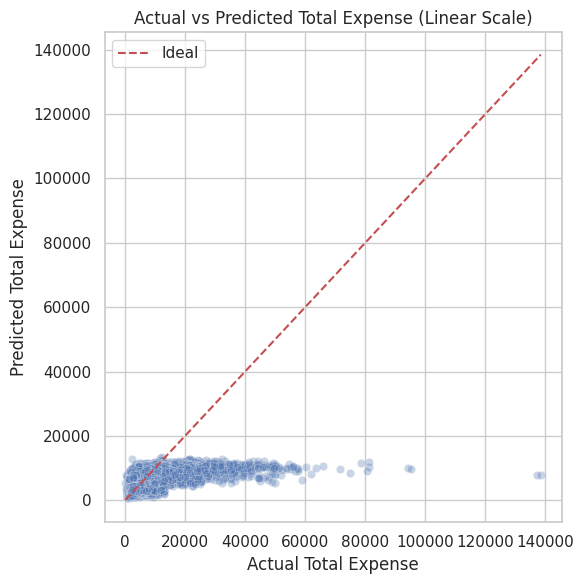

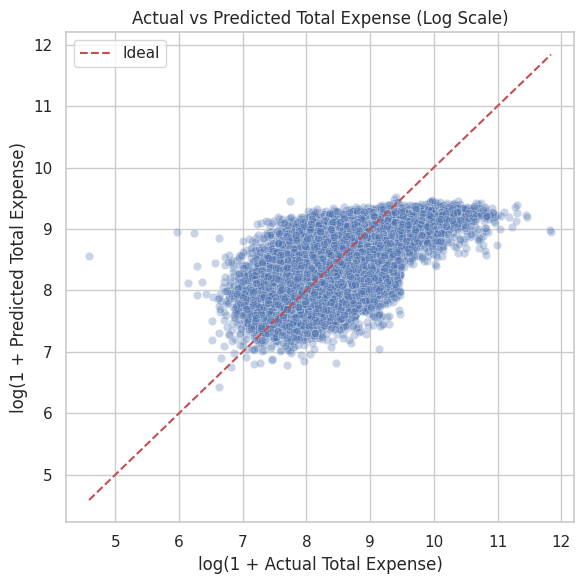

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# === Linear Scale Plot ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Ideal')
plt.xlabel("Actual Total Expense")
plt.ylabel("Predicted Total Expense")
plt.title("Actual vs Predicted Total Expense (Linear Scale)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# === Log Scale Plot ===
log_y_true = np.log1p(y_true)
log_y_pred = np.log1p(y_pred)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=log_y_true, y=log_y_pred, alpha=0.3)
plt.plot([log_y_true.min(), log_y_true.max()], [log_y_true.min(), log_y_true.max()], 'r--', label='Ideal')
plt.xlabel("log(1 + Actual Total Expense)")
plt.ylabel("log(1 + Predicted Total Expense)")
plt.title("Actual vs Predicted Total Expense (Log Scale)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


## Conditional Ensembling Based on Expense Level
Since your training split is based on the Total_Expense 95th percentile, the simplest and most interpretable meta-learner is a soft-ensemble, which works as follows:

1. Predict on all samples (test/train) using both model_low and model_high.

2. If the predicted value from model_low exceeds the 95th percentile threshold, defer to model_high for final prediction.

3. Else, keep model_low prediction.

This mirrors your training logic and gives model_high control where it matters — on high spenders.

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# === Load Models ===
model_low = joblib.load("/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/model/xgb_regressor_model_below95.pkl")
model_high = joblib.load("/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/model/xgb_regressor_model_above95.pkl")

# === Load Data ===
train_df = pd.read_csv("/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_train_v3.csv")
test_df = pd.read_csv("/content/drive/MyDrive/BFBF_Project/Team_Nexus-HackTheFuture2025/data/final_test_v3.csv")

train_df = train_df[train_df.head_gender != 3]
test_df = test_df[test_df.head_gender != 3]

train_weights = train_df["household_size"]
test_weights = test_df["household_size"]

y_train = train_df.pop("Total_Expense")
y_test = test_df.pop("Total_Expense")

train_df = train_df.drop(columns=["HH_ID"], errors="ignore")
test_df = test_df.drop(columns=["HH_ID"], errors="ignore")

X_train, X_test = train_df, test_df

# === Get Base Predictions ===
y_pred_low_train = model_low.predict(X_train)
y_pred_high_train = model_high.predict(X_train)

y_pred_low_test = model_low.predict(X_test)
y_pred_high_test = model_high.predict(X_test)

# === Blending Function ===
def sigmoid_blend(low_pred, high_pred, threshold, scale=500):
    alpha = 1 / (1 + np.exp(-(low_pred - threshold) / scale))
    return (1 - alpha) * low_pred + alpha * high_pred

# === 95th Percentile Threshold ===
threshold = np.percentile(y_train, 95)

# === Blend Predictions ===
final_preds_train = sigmoid_blend(y_pred_low_train, y_pred_high_train, threshold)
final_preds_test = sigmoid_blend(y_pred_low_test, y_pred_high_test, threshold)

# === Evaluation Function ===
def eval_metrics(y_true, y_pred, weights=None):
    if weights is not None:
        y_true, y_pred = y_true * weights, y_pred * weights
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, np.nan, y_true))) * 100
    r2 = r2_score(y_true, y_pred)
    return mae, mape, rmse, mse, r2

# === Print Metrics ===
metrics_names = ['MAE', 'MAPE', 'RMSE', 'MSE', 'R2']

print("\n=== Soft Meta-Ensemble Evaluation ===")
for label, y_t, y_p, w in [
    ('Train (Weighted)', y_train, final_preds_train, train_weights),
    ('Test  (Weighted)', y_test,  final_preds_test,  test_weights)
]:
    scores = eval_metrics(y_t, y_p, w)
    print(f"{label}: " + ", ".join(f"{name}={val:.4f}" for name, val in zip(metrics_names, scores)))



=== Soft Meta-Ensemble Evaluation ===
Train (Weighted): MAE=18230.3534, MAPE=120.7178, RMSE=23005.0332, MSE=529231551.7074, R2=-1.7648
Test  (Weighted): MAE=18253.3211, MAPE=121.0476, RMSE=22892.3619, MSE=524060231.7500, R2=-1.8160
